In [82]:
import pandas as pd
import numpy as np
from glob import glob
from path import Path
import json
import seaborn as sns
import prody
from multiprocessing import Pool
from tqdm import tqdm
import itertools
import json
from rdkit import Chem
from rdkit.Chem import AllChem
from io import StringIO
from collections import OrderedDict, Counter
import traceback
import urllib
import pybel
from copy import deepcopy
from multiprocessing import Pool
from pymol import cmd
from collections import defaultdict

pd.set_option('display.max_columns', None)

from pocketdock.ligand.ligand_expo import LigandExpo
from pocketdock import utils
from pocketdock import pdb_tools

In [2]:
LigandExpo.get_all_sdf_mol_flex

<bound method LigandExpo.get_all_sdf_mol_flex of <class 'pocketdock.ligand.ligand_expo.LigandExpo'>>

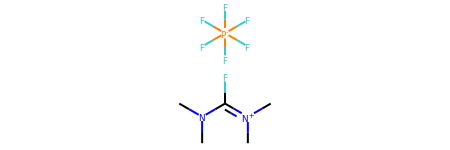

In [12]:
Chem.MolFromSmiles('F[P-](F)(F)(F)(F)F.CN(C)C(F)=[N+](C)C')

In [14]:
Chem.rdchem.BondType.names

{'UNSPECIFIED': rdkit.Chem.rdchem.BondType.UNSPECIFIED,
 'SINGLE': rdkit.Chem.rdchem.BondType.SINGLE,
 'DOUBLE': rdkit.Chem.rdchem.BondType.DOUBLE,
 'TRIPLE': rdkit.Chem.rdchem.BondType.TRIPLE,
 'QUADRUPLE': rdkit.Chem.rdchem.BondType.QUADRUPLE,
 'QUINTUPLE': rdkit.Chem.rdchem.BondType.QUINTUPLE,
 'HEXTUPLE': rdkit.Chem.rdchem.BondType.HEXTUPLE,
 'ONEANDAHALF': rdkit.Chem.rdchem.BondType.ONEANDAHALF,
 'TWOANDAHALF': rdkit.Chem.rdchem.BondType.TWOANDAHALF,
 'THREEANDAHALF': rdkit.Chem.rdchem.BondType.THREEANDAHALF,
 'FOURANDAHALF': rdkit.Chem.rdchem.BondType.FOURANDAHALF,
 'FIVEANDAHALF': rdkit.Chem.rdchem.BondType.FIVEANDAHALF,
 'AROMATIC': rdkit.Chem.rdchem.BondType.AROMATIC,
 'IONIC': rdkit.Chem.rdchem.BondType.IONIC,
 'HYDROGEN': rdkit.Chem.rdchem.BondType.HYDROGEN,
 'THREECENTER': rdkit.Chem.rdchem.BondType.THREECENTER,
 'DATIVEONE': rdkit.Chem.rdchem.BondType.DATIVEONE,
 'DATIVE': rdkit.Chem.rdchem.BondType.DATIVE,
 'DATIVEL': rdkit.Chem.rdchem.BondType.DATIVEL,
 'DATIVER': rdkit.

In [20]:
bond_types = defaultdict(set)

for chemid in tqdm(list(LigandExpo._CC_TO_PDB.keys())[:]):
    smiles = LigandExpo.get_smiles(chemid)
    if smiles:
        mol = Chem.MolFromSmiles(smiles, sanitize=True)
        if mol is not None:
            for bond in mol.GetBonds():
                bond_types[str(bond.GetBondType())].add((x, smiles))
        #prob = Chem.DetectChemistryProblems(mol)
        #if len(prob) > 0:
        #    print(smiles, prob)
        #mol.calcExplicitValence()

 32%|███▏      | 9033/28403 [00:03<00:09, 2084.72it/s]RDKit WARNING: [14:24:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:24:05] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:24:05] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 28403/28403 [00:10<00:00, 2823.14it/s]


In [21]:
bond_types.keys()

dict_keys(['SINGLE', 'AROMATIC', 'DOUBLE', 'TRIPLE'])

In [24]:
bond_types = defaultdict(set)

for pdbid, chemids in tqdm(list(LigandExpo._PDB_TO_CC.items())):
    for chemid in chemids:
        for sdf_id in LigandExpo.get_all_sdf_ids(pdbid, chemid):
            #print(sdf_id)
            mol = LigandExpo.get_all_sdf_mol_flex(sdf_id, sanitize=True)
            if mol is not None:
                for bond in mol.GetBonds():
                    bond_types[str(bond.GetBondType())].add(sdf_id)

  0%|          | 15/120755 [00:00<2:34:28, 13.03it/s][WARNING] 2021-09-03 14:26:45,315 get_all_sdf_mol_flex [pid 3516] - Molecule 3kdb_006_1_B_100__D__D_ does not have atoms
[WARNING] 2021-09-03 14:26:45,315 get_all_sdf_mol_flex [pid 3516] - Molecule 3kdb_006_1_B_100__D__D_ does not have coordinates
  0%|          | 49/120755 [00:01<1:49:54, 18.30it/s][WARNING] 2021-09-03 14:26:45,454 get_all_sdf_mol_flex [pid 3516] - Molecule 2hs2_017_1_A_201__E__D_ does not have atoms
[WARNING] 2021-09-03 14:26:45,455 get_all_sdf_mol_flex [pid 3516] - Molecule 2hs2_017_1_A_201__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:45,456 get_all_sdf_mol_flex [pid 3516] - Molecule 2hs2_017_1_B_203__F__D_ does not have atoms
[WARNING] 2021-09-03 14:26:45,456 get_all_sdf_mol_flex [pid 3516] - Molecule 2hs2_017_1_B_203__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:45,457 get_all_sdf_mol_flex [pid 3516] - Molecule 2hs2_DMS_1_B_801__G__D_ does not have atoms
[WARNING] 2021-09-03 14:26:45

  0%|          | 389/120755 [00:01<17:35, 114.01it/s]RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than permitted
RDKit ERROR: [14:26:46] Explicit valence for atom # 2 Be, 4, is greater than 

[WARNING] 2021-09-03 14:26:46,687 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0C_1_K_79__A_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,687 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0C_1_K_84__A_6_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,688 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0C_1_K_84__A_6_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,688 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0C_1_L_90__B_1_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,689 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0C_1_L_90__B_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,689 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0C_1_L_91__B_2_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,689 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0C_1_L_91__B_2_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,690 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0C_1_L_93__B_4_D_ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:46,718 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0G_1_M_83__C_5_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,718 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0G_1_M_83__C_5_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,719 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0G_1_M_85__C_7_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,719 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0G_1_M_85__C_7_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,720 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0G_1_M_86__C_8_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,720 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0G_1_M_86__C_8_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,721 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0G_1_N_92__D_3_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,721 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_0G_1_N_92__D_3_D_ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:46,751 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_CA_1_N_302__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,752 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_CA_1_N_304__I__D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,752 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_CA_1_N_304__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,753 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_CA_1_N_306__J__D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,753 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_CA_1_N_306__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,754 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_CA_2_L_302__E__D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,754 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_CA_2_L_302__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,755 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq6_CA_2_M_304__F__D_ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:46,790 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0C_2_N_94__D_5_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,790 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0C_2_N_94__D_5_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,791 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0G_1_K_81__A_3_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,791 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0G_1_K_81__A_3_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,792 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0G_1_K_82__A_4_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,792 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0G_1_K_82__A_4_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,793 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0G_1_K_83__A_5_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,793 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0G_1_K_83__A_5_D_ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:46,829 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0U_1_K_80__A_2_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,830 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0U_1_L_95__B_6_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,830 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0U_1_L_95__B_6_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,831 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0U_1_M_80__C_2_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,831 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0U_1_M_80__C_2_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,832 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0U_1_N_95__D_6_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,833 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0U_1_N_95__D_6_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,834 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq4_0U_2_K_80__A_2_D_ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:46,874 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0C_2_K_79__A_1_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,875 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0C_2_K_79__A_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,876 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0C_2_K_84__A_6_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,876 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0C_2_K_84__A_6_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,877 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0C_2_L_90__B_1_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,877 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0C_2_L_90__B_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,878 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0C_2_L_91__B_2_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,878 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0C_2_L_91__B_2_D_ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:46,906 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0G_2_L_92__B_3_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,907 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0G_2_L_96__B_7_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,907 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0G_2_L_96__B_7_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,908 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0G_2_L_97__B_8_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,908 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0G_2_L_97__B_8_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,909 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0G_2_M_81__C_3_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,909 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0G_2_M_81__C_3_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,910 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq5_0G_2_M_82__C_4_D_ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:46,935 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0C_1_K_84__A_6_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,935 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0C_1_K_84__A_6_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,935 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0C_1_L_90__B_1_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,936 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0C_1_L_90__B_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,936 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0C_1_L_91__B_2_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,936 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0C_1_L_91__B_2_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,937 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0C_1_L_93__B_4_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,937 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0C_1_L_93__B_4_D_ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:46,974 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0G_1_M_83__C_5_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,975 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0G_1_M_85__C_7_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,975 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0G_1_M_85__C_7_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,976 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0G_1_M_86__C_8_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,976 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0G_1_M_86__C_8_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,977 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0G_1_N_92__D_3_D_ does not have atoms
[WARNING] 2021-09-03 14:26:46,977 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0G_1_N_92__D_3_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:46,978 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_0G_1_N_96__D_7_D_ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:47,010 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_CA_1_N_304__I__D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,011 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_CA_1_N_304__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,011 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_CA_1_N_306__J__D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,012 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_CA_1_N_306__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,012 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_CA_2_L_310__E__D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,013 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_CA_2_L_310__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,013 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_CA_2_M_308__F__D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,014 get_all_sdf_mol_flex [pid 3516] - Molecule 2gpm_CA_2_M_308__F__D_ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:47,045 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0G_1_K_82__A_4_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,046 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0G_1_K_83__A_5_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,046 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0G_1_K_83__A_5_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,046 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0G_1_K_85__A_7_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,047 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0G_1_K_85__A_7_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,047 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0G_1_K_86__A_8_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,048 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0G_1_K_86__A_8_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,048 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0G_1_L_92__B_3_D_ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:47,078 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0U_1_N_95__D_6_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,079 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0U_1_N_95__D_6_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,079 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0U_2_K_80__A_2_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,080 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0U_2_K_80__A_2_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,080 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0U_2_L_95__B_6_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,080 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0U_2_L_95__B_6_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,081 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0U_2_M_80__C_2_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,081 get_all_sdf_mol_flex [pid 3516] - Molecule 2g32_0U_2_M_80__C_2_D_ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:47,115 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0C_2_L_90__B_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,116 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0C_2_L_91__B_2_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,116 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0C_2_L_91__B_2_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,117 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0C_2_L_93__B_4_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,117 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0C_2_L_93__B_4_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,118 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0C_2_L_94__B_5_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,118 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0C_2_L_94__B_5_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,118 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0C_2_M_79__C_1_D_ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:26:47,147 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0G_2_M_81__C_3_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,148 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0G_2_M_81__C_3_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,149 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0G_2_M_82__C_4_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,149 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0G_2_M_82__C_4_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,150 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0G_2_M_83__C_5_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,150 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0G_2_M_83__C_5_D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,151 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0G_2_M_85__C_7_D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,151 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq7_0G_2_M_85__C_7_D_ does not have coordinates
[WARNING] 2021-0

RDKit ERROR: [14:26:47] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:26:47,225 get_all_sdf_mol_flex [pid 3516] - Molecule 3cyu_0CR_1_A_263__C__D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,226 get_all_sdf_mol_flex [pid 3516] - Molecule 3cyu_0CR_1_A_263__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:47,226 get_all_sdf_mol_flex [pid 3516] - Molecule 3cyu_1CR_1_A_264__D__D_ does not have atoms
[WARNING] 2021-09-03 14:26:47,226 get_all_sdf_mol_flex [pid 3516] - Molecule 3cyu_1CR_1_A_264__D__D_ does not have coordinates
RDKit ERROR: [14:26:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:47] Explicit valence for atom # 39 N, 4, is greater than permitted
  1%|          | 632/120755 [00:03<11:56, 167.73it/s]RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not foun

  1%|          | 821/120755 [00:03<06:19, 316.25it/s]RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit WARNING: [14:26:47] Element 'X' not found
RDKit ERROR: [14:26:47] 
RDKit ERRO

  1%|          | 872/120755 [00:03<07:09, 279.12it/s]RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERR

  1%|          | 1318/120755 [00:04<03:39, 544.18it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit

  1%|▏         | 1675/120755 [00:14<28:34, 69.46it/s][WARNING] 2021-09-03 14:26:59,058 get_all_sdf_mol_flex [pid 3516] - Molecule 1lzq_0ZQ_1_A_201__C__D_ does not have atoms
[WARNING] 2021-09-03 14:26:59,058 get_all_sdf_mol_flex [pid 3516] - Molecule 1lzq_0ZQ_1_A_201__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:59,059 get_all_sdf_mol_flex [pid 3516] - Molecule 1m0b_0ZQ_1_B_201__C__D_ does not have atoms
[WARNING] 2021-09-03 14:26:59,059 get_all_sdf_mol_flex [pid 3516] - Molecule 1m0b_0ZQ_1_B_201__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:59,060 get_all_sdf_mol_flex [pid 3516] - Molecule 1zlf_0ZR_1_B_201__C__D_ does not have atoms
[WARNING] 2021-09-03 14:26:59,061 get_all_sdf_mol_flex [pid 3516] - Molecule 1zlf_0ZR_1_B_201__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:26:59,064 get_all_sdf_mol_flex [pid 3516] - Molecule 1zsf_0ZS_1_B_201__C__D_ does not have atoms
[WARNING] 2021-09-03 14:26:59,064 get_all_sdf_mol_flex [pid 3516] - Molecule 1zsf_

RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:26:59] Explicit valence fo

  2%|▏         | 2389/120755 [00:19<54:50, 35.98it/s] RDKit ERROR: [14:27:03] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [14:27:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:03] Explicit valence for atom # 39 N, 4, is greater than permitted
  2%|▏         | 2450/120755 [00:19<39:21, 50.10it/s]RDKit ERROR: [14:27:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:27:04] Exp

RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:04] Explicit valence fo

RDKit ERROR: e 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred 

  2%|▏         | 3009/120755 [00:20<05:04, 386.20it/s]RDKit ERROR: e 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: 

  3%|▎         | 3354/120755 [00:28<43:04, 45.42it/s][WARNING] 2021-09-03 14:27:12,830 get_all_sdf_mol_flex [pid 3516] - Molecule 4h41_UNL_1_A_401__D___ does not have atoms
[WARNING] 2021-09-03 14:27:12,830 get_all_sdf_mol_flex [pid 3516] - Molecule 4h41_UNL_1_A_401__D___ does not have coordinates
[WARNING] 2021-09-03 14:27:12,831 get_all_sdf_mol_flex [pid 3516] - Molecule 4h41_UNL_1_B_401__M___ does not have atoms
[WARNING] 2021-09-03 14:27:12,831 get_all_sdf_mol_flex [pid 3516] - Molecule 4h41_UNL_1_B_401__M___ does not have coordinates
[WARNING] 2021-09-03 14:27:12,831 get_all_sdf_mol_flex [pid 3516] - Molecule 4h41_UNL_1_C_401__T___ does not have atoms
[WARNING] 2021-09-03 14:27:12,831 get_all_sdf_mol_flex [pid 3516] - Molecule 4h41_UNL_1_C_401__T___ does not have coordinates
RDKit WARNING: [14:27:12] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:27:12] Element 'X' not found
RDKit WARNING: [14:27:12] Element 'X' not found
RDKit WARNING: [14:27:12] 

RDKit ERROR: [14:27:14] Explicit valence for atom # 17 N, 6, is greater than permitted
RDKit ERROR: [14:27:14] Explicit valence for atom # 17 N, 6, is greater than permitted
  3%|▎         | 3708/120755 [00:29<08:32, 228.57it/s]RDKit ERROR: [14:27:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:14] Explicit valence for atom # 39 N, 4, is greater than permitted
  3%|▎         | 3738/120755 [00:29<07:57, 244.93it/s]RDKit ERROR: [14:27:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:14] Explicit valence for atom # 39 N, 4, is greater than permitted
  3%|▎         | 3799/120755 [00:30<07:32, 258.37it/s][WARNING] 2021-09-03 14:27:14,526 get_all_sdf_mol_flex [pid 3516] - Molecule 2haw_2PN_1_A_2001__U__D_ does not have atoms
[WARNING] 2021-09-03

RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
  3%|▎         | 4002/120755 [00:31<08:45, 222.28it/s]RDKit WARNING: [14:27:15] Element 'X' not found
RDKit WARNING: [14:27:15] Elem

[WARNING] 2021-09-03 14:27:15,475 get_all_sdf_mol_flex [pid 3516] - Molecule 2wn2_NGA_1_C_300__O__D_ does not have coordinates
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
  3%|▎         | 4119/120755 [00:31<06:17, 308.74it/s]RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:15] Explicit val

  4%|▎         | 4518/120755 [00:32<03:59, 484.44it/s]RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:16] Explicit valence for atom # 39 N, 4, is greater than permitted
  4%|▍         | 4629/120755 [00:32<04:33, 424.08it/s][WARNING] 2021-09-03 14:27:16,782 get_all_sdf_mol_flex [pid 3516] - Molecule 2hmp_SR_1_A_2001__E__D_ does not

RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-c

RDKit ERROR: [14:27:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:17] Explicit valence for atom # 39 N, 4, is greater than permitted
  4%|▍         | 5019/120755 [00:33<04:44, 406.55it/s]RDKit ERROR: [14:27:17] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:17] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:17] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:17] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:17] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:17] Explicit valence for atom # 1 N, 4, is greater than permitted
  4%|▍         | 5076/120755 [00:33<04:20, 444.64it/s][WARNING] 2021-09-03 14:27:1

[WARNING] 2021-09-03 14:27:18,010 get_all_sdf_mol_flex [pid 3516] - Molecule 2ime_TOH_1_A_304__F__D_ does not have coordinates
RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
  4%|▍         | 5229/120755 [00:33<04:04, 472.01it/s]RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:18] Explicit val

  5%|▍         | 5518/120755 [00:34<04:45, 403.37it/s][WARNING] 2021-09-03 14:27:18,750 get_all_sdf_mol_flex [pid 3516] - Molecule 1i0v_2GP_1_A_106__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:18,750 get_all_sdf_mol_flex [pid 3516] - Molecule 1i0v_2GP_1_A_106__C__D_ does not have coordinates
RDKit WARNING: [14:27:18] Element 'X' not found
[WARNING] 2021-09-03 14:27:18,766 get_all_sdf_mol_flex [pid 3516] - Molecule 2hoh_2GP_1_B_304__J__D_ does not have atoms
[WARNING] 2021-09-03 14:27:18,766 get_all_sdf_mol_flex [pid 3516] - Molecule 2hoh_2GP_1_B_304__J__D_ does not have coordinates
  5%|▍         | 5597/120755 [00:34<04:03, 472.43it/s]RDKit ERROR: [14:27:18] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:

RDKit WARNING: [14:27:20] Element 'X' not found
RDKit WARNING: [14:27:20] Element 'X' not found
[WARNING] 2021-09-03 14:27:20,247 get_all_sdf_mol_flex [pid 3516] - Molecule 3i2l_2NC_1_B_100__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:20,248 get_all_sdf_mol_flex [pid 3516] - Molecule 3i2l_2NC_1_B_100__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:20,249 get_all_sdf_mol_flex [pid 3516] - Molecule 3i2l_IIL_1_A_50__A_50_D_ does not have atoms
[WARNING] 2021-09-03 14:27:20,249 get_all_sdf_mol_flex [pid 3516] - Molecule 3i2l_IIL_1_A_50__A_50_D_ does not have coordinates
[WARNING] 2021-09-03 14:27:20,249 get_all_sdf_mol_flex [pid 3516] - Molecule 3i2l_IIL_1_B_50__B_50_D_ does not have atoms
[WARNING] 2021-09-03 14:27:20,250 get_all_sdf_mol_flex [pid 3516] - Molecule 3i2l_IIL_1_B_50__B_50_D_ does not have coordinates
[WARNING] 2021-09-03 14:27:20,257 get_all_sdf_mol_flex [pid 3516] - Molecule 2avq_DMS_1_A_401__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:20,257 g

[WARNING] 2021-09-03 14:27:20,797 get_all_sdf_mol_flex [pid 3516] - Molecule 2al2_2PG_1_B_441__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:20,799 get_all_sdf_mol_flex [pid 3516] - Molecule 2al2_PEP_1_A_440__I__D_ does not have atoms
[WARNING] 2021-09-03 14:27:20,799 get_all_sdf_mol_flex [pid 3516] - Molecule 2al2_PEP_1_A_440__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:20,799 get_all_sdf_mol_flex [pid 3516] - Molecule 2al2_PEP_1_B_440__K__D_ does not have atoms
[WARNING] 2021-09-03 14:27:20,799 get_all_sdf_mol_flex [pid 3516] - Molecule 2al2_PEP_1_B_440__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:20,802 get_all_sdf_mol_flex [pid 3516] - Molecule 1o5x_2PG_1_B_4400__E__D_ does not have atoms
[WARNING] 2021-09-03 14:27:20,802 get_all_sdf_mol_flex [pid 3516] - Molecule 1o5x_2PG_1_B_4400__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:20,806 get_all_sdf_mol_flex [pid 3516] - Molecule 2al1_2PG_1_A_441__K__D_ does not have atoms
[WARNI

  5%|▌         | 6314/120755 [00:36<04:32, 420.24it/s]RDKit ERROR: [14:27:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:21] Explicit valence for atom # 39 N, 4, is greater than permitted
  5%|▌         | 6421/120755 [00:37<06:10, 308.82it/s]RDKit WARNING: [14:27:21] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:27:21] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:27:21] Explicit valence for atom # 39 N, 4, is greater than permitted
  5%|▌         | 6607/

[WARNING] 2021-09-03 14:27:23,424 get_all_sdf_mol_flex [pid 3516] - Molecule 2efj_37T_1_A_502__C__D_ does not have coordinates
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Exp

  6%|▌         | 7194/120755 [00:39<05:43, 330.31it/s]RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit WARNING: [14:27:24] Element 'X' not found
RDKit ERROR: [14:27:24] 
RDKit ERR

  6%|▌         | 7230/120755 [00:39<07:03, 267.77it/s]RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ER

[WARNING] 2021-09-03 14:27:24,531 get_all_sdf_mol_flex [pid 3516] - Molecule 3fu7_3DM_1_A_3900__R__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:24,533 get_all_sdf_mol_flex [pid 3516] - Molecule 3fu7_D2M_1_B_2100__GA__D_ does not have atoms
[WARNING] 2021-09-03 14:27:24,534 get_all_sdf_mol_flex [pid 3516] - Molecule 3fu7_D2M_1_B_2100__GA__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:24,534 get_all_sdf_mol_flex [pid 3516] - Molecule 3fu7_KIA_1_B_2910__HA__D_ does not have atoms
[WARNING] 2021-09-03 14:27:24,534 get_all_sdf_mol_flex [pid 3516] - Molecule 3fu7_KIA_1_B_2910__HA__D_ does not have coordinates
  6%|▌         | 7377/120755 [00:40<05:04, 372.69it/s]RDKit ERROR: [14:27:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:24] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:27:24,566 get_all_sdf_mol_fle

[WARNING] 2021-09-03 14:27:25,573 get_all_sdf_mol_flex [pid 3516] - Molecule 1c0q_BGC_1_B_8__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:25,578 get_all_sdf_mol_flex [pid 3516] - Molecule 1c0r_BGC_1_B_8__F__D_ does not have atoms
[WARNING] 2021-09-03 14:27:25,578 get_all_sdf_mol_flex [pid 3516] - Molecule 1c0r_BGC_1_B_8__F__D_ does not have coordinates
  6%|▋         | 7625/120755 [00:41<11:42, 160.99it/s][WARNING] 2021-09-03 14:27:25,658 get_all_sdf_mol_flex [pid 3516] - Molecule 1m0w_3GC_1_A_501__P__D_ does not have atoms
[WARNING] 2021-09-03 14:27:25,659 get_all_sdf_mol_flex [pid 3516] - Molecule 1m0w_3GC_1_A_501__P__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:25,659 get_all_sdf_mol_flex [pid 3516] - Molecule 1m0w_3GC_1_B_1501__Q__D_ does not have atoms
[WARNING] 2021-09-03 14:27:25,660 get_all_sdf_mol_flex [pid 3516] - Molecule 1m0w_3GC_1_B_1501__Q__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:25,660 get_all_sdf_mol_flex [pid 3516] - Molecule 1m

[WARNING] 2021-09-03 14:27:26,648 get_all_sdf_mol_flex [pid 3516] - Molecule 3nyd_3NY_1_A_317__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:26,648 get_all_sdf_mol_flex [pid 3516] - Molecule 3nyd_3NY_1_B_317__I__D_ does not have atoms
[WARNING] 2021-09-03 14:27:26,649 get_all_sdf_mol_flex [pid 3516] - Molecule 3nyd_3NY_1_B_317__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:26,675 get_all_sdf_mol_flex [pid 3516] - Molecule 3dzl_3OC_1_A_500__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:26,676 get_all_sdf_mol_flex [pid 3516] - Molecule 3dzl_3OC_1_A_500__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:26,693 get_all_sdf_mol_flex [pid 3516] - Molecule 1g85_3OL_1_A_1001__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:26,694 get_all_sdf_mol_flex [pid 3516] - Molecule 1g85_3OL_1_A_1001__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:26,694 get_all_sdf_mol_flex [pid 3516] - Molecule 1g85_3OL_1_A_1002__D__D_ does not have atoms
[WARN

  7%|▋         | 8054/120755 [00:42<06:20, 295.83it/s]RDKit ERROR: [14:27:26] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:26] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:26] Explicit valence for atom # 39 N, 4, is greater than permitted
  7%|▋         | 8089/120755 [00:42<06:13, 301.81it/s][WARNING] 2021-09-03 14:27:27,019 get_all_sdf_mol_flex [pid 3516] - Molecule 2x15_3PG_1_A_1421__E__D_ does not have atoms
[WARNING] 2021-09-03 14:27:27,020 get_all_sdf_mol_flex [pid 3516] - Molecule 2x15_3PG_1_A_1421__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:27,021 get_all_sdf_mol_flex [pid 3516] - Molecule 2x15_ADP_1_A_1419__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:27,021 get_all_sdf_mol_flex [pid 3516] - Molecule 2x15_ADP_1_A_1419__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:27,022 get_all_sdf_mol_flex [pid 3516] - Molecule 2x15_ATP_1_A_1422__F__D_ does not have atoms
[WARNING]

RDKit WARNING: [14:27:27] Element 'X' not found
RDKit WARNING: [14:27:27] Element 'X' not found
RDKit WARNING: [14:27:27] Element 'X' not found
RDKit WARNING: [14:27:27] Element 'X' not found
RDKit WARNING: [14:27:27] Element 'X' not found
RDKit WARNING: [14:27:27] Element 'X' not found
RDKit WARNING: [14:27:27] Element 'X' not found
RDKit WARNING: [14:27:27] Element 'X' not found
RDKit WARNING: [14:27:27] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit E

RDKit ERROR: [14:27:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:27] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:27:27,640 get_all_sdf_mol_flex [pid 3516] - Molecule 3kfn_3TL_1_A_200__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:27,641 get_all_sdf_mol_flex [pid 3516] - Molecule 3kfn_3TL_1_A_200__C__D_ does not have coordinates
RDKit ERROR: [14:27:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:27] Explicit valence for atom # 39 N, 4, is greater than permitted
  7%|▋         | 8387/120755 [00:43<04:30, 415.91it/s]RD

[WARNING] 2021-09-03 14:27:28,555 get_all_sdf_mol_flex [pid 3516] - Molecule 4xcn_UNL_1_L_301__M___ does not have coordinates
[WARNING] 2021-09-03 14:27:28,556 get_all_sdf_mol_flex [pid 3516] - Molecule 4xcn_UNL_1_B_301__O___ does not have atoms
[WARNING] 2021-09-03 14:27:28,556 get_all_sdf_mol_flex [pid 3516] - Molecule 4xcn_UNL_1_B_301__O___ does not have coordinates
[WARNING] 2021-09-03 14:27:28,557 get_all_sdf_mol_flex [pid 3516] - Molecule 4xcn_UNL_1_D_301__R___ does not have atoms
[WARNING] 2021-09-03 14:27:28,557 get_all_sdf_mol_flex [pid 3516] - Molecule 4xcn_UNL_1_D_301__R___ does not have coordinates
[WARNING] 2021-09-03 14:27:28,558 get_all_sdf_mol_flex [pid 3516] - Molecule 4xcn_UNL_1_F_301__T___ does not have atoms
[WARNING] 2021-09-03 14:27:28,558 get_all_sdf_mol_flex [pid 3516] - Molecule 4xcn_UNL_1_F_301__T___ does not have coordinates
[WARNING] 2021-09-03 14:27:28,559 get_all_sdf_mol_flex [pid 3516] - Molecule 4xcn_UNL_1_I_301__V___ does not have atoms
[WARNING] 2021-0

RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:28] Explicit valence fo

  7%|▋         | 8920/120755 [00:44<06:10, 301.94it/s][WARNING] 2021-09-03 14:27:29,172 get_all_sdf_mol_flex [pid 3516] - Molecule 3nu5_478_1_B_401__G__D_ does not have atoms
[WARNING] 2021-09-03 14:27:29,173 get_all_sdf_mol_flex [pid 3516] - Molecule 3nu5_478_1_B_401__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:29,181 get_all_sdf_mol_flex [pid 3516] - Molecule 3nu3_478_1_B_401__E__D_ does not have atoms
[WARNING] 2021-09-03 14:27:29,181 get_all_sdf_mol_flex [pid 3516] - Molecule 3nu3_478_1_B_401__E__D_ does not have coordinates
  7%|▋         | 9045/120755 [00:45<06:26, 288.79it/s]RDKit ERROR: [14:27:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:27:29] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:27:29] Explicit valence for atom # 1 C, 5, is greater than permitted
  8%|▊         | 9080/120755 [00:45<06:06, 304.73it/s]RDKit ERROR: [14:27:29] Explicit valence for atom # 39 N, 4, is greater than permitt

[WARNING] 2021-09-03 14:27:30,595 get_all_sdf_mol_flex [pid 3516] - Molecule 1w1d_AU_1_A_1551__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:30,595 get_all_sdf_mol_flex [pid 3516] - Molecule 1w1d_AU_1_A_1551__C__D_ does not have coordinates
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:30] Explicit valence for atom # 29 C, 5, is greater than permitted
[WARNING] 2021-09-03 14:27:30,665 get_all_sdf_mol_flex [pid 3516] - Molecule 3pk2_IR3_1_A_601__D__D_ does not have 

[WARNING] 2021-09-03 14:27:30,972 get_all_sdf_mol_flex [pid 3516] - Molecule 4z3w_UNL_1_A_706__N___ does not have coordinates
[WARNING] 2021-09-03 14:27:30,973 get_all_sdf_mol_flex [pid 3516] - Molecule 4z3w_UNL_1_B_706__U___ does not have atoms
[WARNING] 2021-09-03 14:27:30,973 get_all_sdf_mol_flex [pid 3516] - Molecule 4z3w_UNL_1_B_706__U___ does not have coordinates
[WARNING] 2021-09-03 14:27:30,974 get_all_sdf_mol_flex [pid 3516] - Molecule 4z3w_UNL_1_C_705__AA___ does not have atoms
[WARNING] 2021-09-03 14:27:30,974 get_all_sdf_mol_flex [pid 3516] - Molecule 4z3w_UNL_1_C_705__AA___ does not have coordinates
[WARNING] 2021-09-03 14:27:30,975 get_all_sdf_mol_flex [pid 3516] - Molecule 4z3w_UNL_1_D_701__DA___ does not have atoms
[WARNING] 2021-09-03 14:27:30,975 get_all_sdf_mol_flex [pid 3516] - Molecule 4z3w_UNL_1_D_701__DA___ does not have coordinates
[WARNING] 2021-09-03 14:27:31,000 get_all_sdf_mol_flex [pid 3516] - Molecule 4z3x_UNL_1_A_706__N___ does not have atoms
[WARNING] 20

[WARNING] 2021-09-03 14:27:32,234 get_all_sdf_mol_flex [pid 3516] - Molecule 4zyb_UNL_1_C_403__W___ does not have coordinates
  8%|▊         | 9938/120755 [00:49<23:53, 77.28it/s] RDKit WARNING: [14:27:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:27:35] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:27:35] Warning: molecule is tagged as 3D, but all Z coords are zero
  8%|▊         | 10059/120755 [00:54<56:52, 32.44it/s]  RDKit ERROR: [14:27:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:38] Explicit valence for atom # 39 N, 4, is greater than permitted
  8%|▊         | 10117/120755 [00:54<40:46, 45.23it/s]RDKit WARNING:

RDKit ERROR: [14:27:39] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:39] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:39] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:39] Explicit valence for atom # 1 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:27:39,464 get_all_sdf_mol_flex [pid 3516] - Molecule 4req_MCA_1_A_802__G__D_ does not have atoms
[WARNING] 2021-09-03 14:27:39,464 get_all_sdf_mol_flex [pid 3516] - Molecule 4req_MCA_1_A_802__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:39,465 get_all_sdf_mol_flex [pid 3516] - Molecule 4req_MCA_1_C_802__N__D_ does not have atoms
[WARNING] 2021-09-03 14:27:39,465 get_all_sdf_mol_flex [pid 3516] - Molecule 4req_MCA_1_C_802__N__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:39,466 get_all_sdf_mol_flex [pid 3516] - Molecule 4req_SCA_1_A_801__F__D_ does not have atoms
[WARNING] 2021-09-03 14:27:39,466 get_a

[WARNING] 2021-09-03 14:27:39,629 get_all_sdf_mol_flex [pid 3516] - Molecule 1lgx_5AN_1_A_401__F__D_ does not have coordinates
RDKit ERROR: [14:27:39] Explicit valence for atom # 39 N, 4, is greater than permitted
  9%|▉         | 10703/120755 [00:55<05:22, 341.29it/s]RDKit WARNING: [14:27:39] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:27:39] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:27:39] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit WARNING: [14:27:39] Warning: molecule is tagged as 3D, but all Z coords are zero
  9%|▉         | 10768/120755 [00:55<04:36, 397.41it/s][WARNING] 2021-09-03 14:27:39,789 get_all_sdf_mol_flex [pid 3516] - Molecule 406d_5BU_1_A_12__A_12_D_ does not have atoms
[WARNING] 2021-09-03 14:27:39,789 get_all_sdf_mol_flex [pid 3516] - Molecule 406d_5BU_1_A_12__A_12_D_ does not have coordinates
[WARNING] 2021-09-03 14:27:39,790 get_all_sdf_mol_flex [pid 3516] - Molecule 406

RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RD

RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
RDKit WARNING: [14:27:39] Element 'X' not found
  9%|▉         | 10873/120755 [00:55<04:12, 435.14it/s]RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit ERROR: e 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/Grap

[WARNING] 2021-09-03 14:27:40,119 get_all_sdf_mol_flex [pid 3516] - Molecule 3fde_5CM_1_C_407__E_6_D_ does not have coordinates
RDKit ERROR: bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit E

RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
[WARNING] 2021-09-03 14:27:40,238 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_10_B_302__E__D_ does not have atoms
[WARNING] 2021-09-03 14:27:40,239 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_10_B_302__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:40,240 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_10_C_301__D__D_ does not have atoms
[WARNING] 2021-09-03 14:27:40,240 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_10_C_301__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:40,241 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_11_B_302__E__D_ does not have atoms

[WARNING] 2021-09-03 14:27:40,272 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_6_B_302__E__D_ does not have atoms
[WARNING] 2021-09-03 14:27:40,272 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_6_B_302__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:40,273 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_6_C_301__D__D_ does not have atoms
[WARNING] 2021-09-03 14:27:40,273 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_6_C_301__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:40,274 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_7_B_302__E__D_ does not have atoms
[WARNING] 2021-09-03 14:27:40,274 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_7_B_302__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:40,275 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_7_C_301__D__D_ does not have atoms
[WARNING] 2021-09-03 14:27:40,275 get_all_sdf_mol_flex [pid 3516] - Molecule 2ky8_MN_7_C_301__D__D_ does not have coordinates
[WARNING] 2021-0

  9%|▉         | 10968/120755 [00:56<05:51, 312.33it/s]RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit WARNING: [14:27:40] Element 'X' not found
RDKit ERROR: ot found
RDKit ERROR: Violation occurred on line 91 in file /opt/con

  9%|▉         | 11041/120755 [00:57<18:19, 99.81it/s] RDKit ERROR: nda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDK

  9%|▉         | 11373/120755 [00:57<06:00, 303.10it/s]RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
[WARNING] 2021-09-03 14:27:42,254 get_all_sdf_mol_flex [pid 3516] - Molecule 3iq7_IOD_1_A_800__D__D_ does not have atoms
[WARNING] 2021-09-03 14:27:42,255 get_all_sdf_mol_flex [pid 3516] - Molecule 3iq7_IOD_1_A_800__D__D_ does not have coordinates
  9%|▉         | 11416/120755 [00:57<06:02, 301.70it/s]RDKit ERROR: [14:27:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:42]

RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > 

RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
 10%|▉         | 11501/120755 [00:58<05:25, 335.75it/s]RDKit ERROR: bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/w

[WARNING] 2021-09-03 14:27:42,544 get_all_sdf_mol_flex [pid 3516] - Molecule 5e83_UNL_1_C_203__M___ does not have coordinates
RDKit ERROR: [14:27:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:42] Explicit valence for atom # 39 N, 4, is greater than permitted
 10%|▉         | 11548/120755 [00:58<05:01, 362.48it/s]RDKit ERROR: [14:27:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found


 10%|▉         | 11589/120755 [00:58<06:03, 300.65it/s]RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit WARNING: [14:27:42] Element 'X' not found
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR

 10%|▉         | 11659/120755 [00:59<17:43, 102.62it/s][WARNING] 2021-09-03 14:27:44,105 get_all_sdf_mol_flex [pid 3516] - Molecule 3cft_5NS_1_A_1__C__D_ does not have atoms
[WARNING] 2021-09-03 14:27:44,105 get_all_sdf_mol_flex [pid 3516] - Molecule 3cft_5NS_1_A_1__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:44,106 get_all_sdf_mol_flex [pid 3516] - Molecule 3cft_5NS_1_B_128__E__D_ does not have atoms
[WARNING] 2021-09-03 14:27:44,107 get_all_sdf_mol_flex [pid 3516] - Molecule 3cft_5NS_1_B_128__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:44,108 get_all_sdf_mol_flex [pid 3516] - Molecule 3cft_5NS_1_B_1__D__D_ does not have atoms
[WARNING] 2021-09-03 14:27:44,108 get_all_sdf_mol_flex [pid 3516] - Molecule 3cft_5NS_1_B_1__D__D_ does not have coordinates
 10%|▉         | 11731/120755 [01:00<19:31, 93.07it/s] RDKit ERROR: [14:27:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:44] Explicit valence for atom # 39 N, 4, is gre

RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
 10%|▉         | 11824/120755 [01:00<11:37, 156.18it/s]RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit WARNING: [14:27:44] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violati

[WARNING] 2021-09-03 14:27:45,029 get_all_sdf_mol_flex [pid 3516] - Molecule 2vvp_5RP_1_D_300__M__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:45,030 get_all_sdf_mol_flex [pid 3516] - Molecule 2vvp_5RP_1_E_300__O__D_ does not have atoms
[WARNING] 2021-09-03 14:27:45,030 get_all_sdf_mol_flex [pid 3516] - Molecule 2vvp_5RP_1_E_300__O__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:45,031 get_all_sdf_mol_flex [pid 3516] - Molecule 2vvp_R52_1_A_200__F__D_ does not have atoms
[WARNING] 2021-09-03 14:27:45,031 get_all_sdf_mol_flex [pid 3516] - Molecule 2vvp_R52_1_A_200__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:45,032 get_all_sdf_mol_flex [pid 3516] - Molecule 2vvp_R52_1_B_200__H__D_ does not have atoms
[WARNING] 2021-09-03 14:27:45,032 get_all_sdf_mol_flex [pid 3516] - Molecule 2vvp_R52_1_B_200__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:27:45,033 get_all_sdf_mol_flex [pid 3516] - Molecule 2vvp_R52_1_C_200__J__D_ does not have atoms
[WARNING

RDKit WARNING: [14:27:46] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:27:46] Warning: molecule is tagged as 3D, but all Z coords are zero
 11%|█         | 12716/120755 [01:02<05:26, 331.28it/s]RDKit ERROR: [14:27:46] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:46] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:27:47] Element 'X' not found
 11%|█         | 12834/120755 [01:02<05:23, 333.34it/s]RDKit WARNING: [14:27:47] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:47] Explicit valence for atom # 39 N, 4, is greater than

 11%|█         | 13089/120755 [01:03<05:37, 318.73it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:4

 11%|█         | 13205/120755 [01:04<05:50, 306.63it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:4

RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit ERROR: ode/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR

 11%|█         | 13389/120755 [01:04<05:37, 317.75it/s]RDKit WARNING: [14:27:48] Element 'X' not found
RDKit WARNING: [14:27:48] Element 'X' not found
RDKit ERROR: **
RDKit ERROR: 
RDKit ERROR: [14:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occu

RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit WARNING: [14:27:49] Element 'X' not found
RDKit ERROR:  line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anu

 11%|█▏        | 13713/120755 [01:05<04:12, 423.90it/s]RDKit ERROR: [14:27:49] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:49] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:49] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:49] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:49] Explicit valence for atom # 1 N, 4, is greater than permitted
 11%|█▏        | 13830/120755 [01:05<03:49, 466.38it/s]RDKit WARNING: [14:27:50] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:27:50] Element 'X' not found
RDKit WARNING: [14:27:50] Element 'X' not found
RDKit WARNING: [14:27:50] Element 'X' not found
RDKit WARNING: [14:27:50] Element 'X' not found
RDKit WARNING: [14:27:50] Element 'X' not found
RDKit WARNING: [14:27:50] Element 'X' not found
 11%|█▏        | 13880/120755 [01:05<04:41, 379.00it/s]RDKit ERROR: [14:27:50] 
R

 12%|█▏        | 14136/120755 [01:06<06:37, 268.53it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
 12%|█▏        | 14234/120755 [01:07<06:35, 269.57it/s]RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:51] Explicit val

RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
 12%|█▏        | 14468/120755 [01:07<04:13, 419.27it/s]RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:51] Explicit valence for atom # 39 N, 4, is greater th

RDKit ERROR: [14:27:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:52] Explicit valence for atom # 39 N, 4, is greater than permitted
 12%|█▏        | 14827/120755 [01:08<04:34, 385.85it/s]RDKit ERROR: [14:27:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:52] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:27:52,966 get_all_sdf_mol_flex [pid 3516] - Molecule 2ano_817_1_A_400__D__D_ does not have atoms
[WARNING] 2021-09-03 14:27:52,966 get_all_sdf_mol_flex [pid 3516] - Molecule 2ano_817_1_A_400__D__D_ does not have coordinates
 12%|█▏        | 14895/120755 [01:08<03:59, 442.58it/s]RDKit ERROR: [14:27:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:52] Explicit 

 13%|█▎        | 15208/120755 [01:09<07:58, 220.77it/s]RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 0 Mg, 4, is greater tha

[WARNING] 2021-09-03 14:27:54,344 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhe_UNL_1_C_522__AD___ does not have coordinates
[WARNING] 2021-09-03 14:27:54,344 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhe_UNL_1_C_523__BD___ does not have atoms
[WARNING] 2021-09-03 14:27:54,345 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhe_UNL_1_C_523__BD___ does not have coordinates
[WARNING] 2021-09-03 14:27:54,345 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhe_UNL_1_E_102__OD___ does not have atoms
[WARNING] 2021-09-03 14:27:54,346 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhe_UNL_1_E_102__OD___ does not have coordinates
[WARNING] 2021-09-03 14:27:54,346 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhe_UNL_1_H_103__SD___ does not have atoms
[WARNING] 2021-09-03 14:27:54,347 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhe_UNL_1_H_103__SD___ does not have coordinates
[WARNING] 2021-09-03 14:27:54,347 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhe_UNL_1_I_101__TD___ does not have atoms
[WARNING

RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:54] Explicit valence fo

 13%|█▎        | 15842/120755 [01:11<04:39, 375.04it/s]RDKit ERROR: [14:27:55] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:55] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:55] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:55] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:55] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [14:27:55] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [14:27:55] Explicit valence for atom # 39 N, 4, is greater than permitted
 13%|█▎        | 15930/120755 [01:11<04:30, 387.43it/s]RDKit ERROR: [14:27:56] Explicit valence for atom # 23 N, 4, is greater than permitted
RDKit WARNING: [14:27:56] Warning: molecule is tagged as 3D, but all Z coords are zero
 13%|█▎        | 15973/120755 [01:11<04:30, 387.65it/s]RDKit WARNING: [14:27:56] Warning: molecule is tagge

 14%|█▎        | 16513/120755 [01:13<04:29, 386.83it/s]RDKit ERROR: [14:27:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:58] Explicit valence for atom # 46 N, 4, is greater than permitted
RDKit ERROR: [14:27:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:58] Explicit valence for atom # 39 N, 4, is greater than permitted
 14%|█▎        | 16567/120755 [01:13<04:06, 422.37it/s]RDKit ERROR: [14:27:58] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [14:27:58] Explicit valence for atom # 39 N, 4, is greater than permitted
 14%|█▍        | 16673/120755 [01:14<04:20, 399.29it/s]RDKit ERROR: [14:27:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:58] Explicit valence for atom # 3

 14%|█▍        | 17018/120755 [01:14<03:34, 482.54it/s]RDKit ERROR: [14:27:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:27:59] Explicit valence for atom # 39 N, 4, is greater than permitted
 14%|█▍        | 17069/120755 [01:14<03:34, 483.74it/s]RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:59] Element 'X' not found
RDKit WARNING: [14:27:5

 14%|█▍        | 17119/120755 [01:14<04:09, 415.48it/s]RDKit WARNING: [14:27:59] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ER

[WARNING] 2021-09-03 14:28:00,155 get_all_sdf_mol_flex [pid 3516] - Molecule 2qmp_A00_1_A_100__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:00,155 get_all_sdf_mol_flex [pid 3516] - Molecule 2qmp_A00_1_A_100__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:00,156 get_all_sdf_mol_flex [pid 3516] - Molecule 2qmp_A00_1_B_100__D__D_ does not have atoms
[WARNING] 2021-09-03 14:28:00,156 get_all_sdf_mol_flex [pid 3516] - Molecule 2qmp_A00_1_B_100__D__D_ does not have coordinates
 14%|█▍        | 17344/120755 [01:15<05:57, 289.03it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:00] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:00] Explicit valence for atom # 39 N, 4, is greater than permitted
 14%|█▍      

 15%|█▍        | 17636/120755 [01:18<29:43, 57.83it/s][WARNING] 2021-09-03 14:28:02,510 get_all_sdf_mol_flex [pid 3516] - Molecule 1fnc_A2P_1_A_316__D__D_ does not have atoms
[WARNING] 2021-09-03 14:28:02,511 get_all_sdf_mol_flex [pid 3516] - Molecule 1fnc_A2P_1_A_316__D__D_ does not have coordinates
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:02] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:02] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERRO

 15%|█▍        | 17725/120755 [01:18<18:11, 94.36it/s][WARNING] 2021-09-03 14:28:02,976 get_all_sdf_mol_flex [pid 3516] - Molecule 2zpt_GOL_1_X_1001__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:02,977 get_all_sdf_mol_flex [pid 3516] - Molecule 2zpt_GOL_1_X_1001__C__D_ does not have coordinates
 15%|█▍        | 17747/120755 [01:18<16:38, 103.15it/s]RDKit ERROR: [14:28:03] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 5 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:03,048 get_all_sdf_mol_flex [pid 3516] - Molecule 3qmn_A3P_1_O_2575__PC__D_ does not have atoms
[WARNING] 2021-09-03 14:28:03,049 get_all_sdf_mol_flex [pid 3516] - Molecule 3qmn_A3P_1_O_2575__PC__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:03,065 get_all_sdf_mol_flex [pid 3516] - Molecule 3qmn_COA_1_N_1333__JC__D_ does not have atoms
[WARNING] 2021-09-03 14:28:03,066 get_all_sdf_mol_flex [pid 3516] - Molecule 3qmn_COA_1_N_1333

RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:03] Explicit valence fo

 15%|█▍        | 18000/120755 [01:19<10:05, 169.84it/s]RDKit ERROR: [14:28:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:04] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:04] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [14:28:04] Explicit valence for atom # 37 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:04,075 get_all_sdf_mol_flex [pid 3516] - Molecule 6a2w_UNL_1_A_417__BA___ does not have atoms
[WARNING] 2021-09-03 14:28:04,075 get_all

[WARNING] 2021-09-03 14:28:05,305 get_all_sdf_mol_flex [pid 3516] - Molecule 2hxc_ABN_1_D_1369__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:05,305 get_all_sdf_mol_flex [pid 3516] - Molecule 2hxc_ABN_1_D_1370__F__D_ does not have atoms
[WARNING] 2021-09-03 14:28:05,306 get_all_sdf_mol_flex [pid 3516] - Molecule 2hxc_ABN_1_D_1370__F__D_ does not have coordinates
 15%|█▌        | 18364/120755 [01:21<07:04, 241.38it/s][WARNING] 2021-09-03 14:28:05,383 get_all_sdf_mol_flex [pid 3516] - Molecule 2okk_ABU_1_A_585__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:05,384 get_all_sdf_mol_flex [pid 3516] - Molecule 2okk_ABU_1_A_585__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:05,384 get_all_sdf_mol_flex [pid 3516] - Molecule 2okk_ABU_1_A_586__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:05,385 get_all_sdf_mol_flex [pid 3516] - Molecule 2okk_ABU_1_A_586__C__D_ does not have coordinates
 15%|█▌        | 18462/120755 [01:21<06:46, 251.34it/s]RDKit ERROR: [14

[WARNING] 2021-09-03 14:28:06,896 get_all_sdf_mol_flex [pid 3516] - Molecule 2vr7_CU_1_F_1155__K__D_ does not have atoms
[WARNING] 2021-09-03 14:28:06,896 get_all_sdf_mol_flex [pid 3516] - Molecule 2vr7_CU_1_F_1155__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:06,898 get_all_sdf_mol_flex [pid 3516] - Molecule 2vr7_ZN_1_A_1156__D__D_ does not have atoms
[WARNING] 2021-09-03 14:28:06,898 get_all_sdf_mol_flex [pid 3516] - Molecule 2vr7_ZN_1_A_1156__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:06,899 get_all_sdf_mol_flex [pid 3516] - Molecule 2vr7_ZN_1_F_1156__L__D_ does not have atoms
[WARNING] 2021-09-03 14:28:06,900 get_all_sdf_mol_flex [pid 3516] - Molecule 2vr7_ZN_1_F_1156__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:06,901 get_all_sdf_mol_flex [pid 3516] - Molecule 2vr8_CU_1_A_1156__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:06,901 get_all_sdf_mol_flex [pid 3516] - Molecule 2vr8_CU_1_A_1156__C__D_ does not have coordinates
[WARNING

 16%|█▌        | 18814/120755 [01:22<05:28, 310.56it/s][WARNING] 2021-09-03 14:28:07,257 get_all_sdf_mol_flex [pid 3516] - Molecule 1ij2_CD_1_A_202__E__D_ does not have atoms
[WARNING] 2021-09-03 14:28:07,257 get_all_sdf_mol_flex [pid 3516] - Molecule 1ij2_CD_1_A_202__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:07,258 get_all_sdf_mol_flex [pid 3516] - Molecule 1ij2_CD_1_C_203__F__D_ does not have atoms
[WARNING] 2021-09-03 14:28:07,258 get_all_sdf_mol_flex [pid 3516] - Molecule 1ij2_CD_1_C_203__F__D_ does not have coordinates
RDKit ERROR: [14:28:07] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:07] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:07] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:07] Explicit valence for atom # 39 N, 4, is greater than permitted
 16%|█▌        | 18893/120755 [01:23<07:12, 235.67it/s][WARNING] 2021-09-03 14:28:07,510 get_all_sdf_mol_

RDKit ERROR: [14:28:08] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:08] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:08] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:08] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:08] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:08] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:08] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:08] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:08,145 get_all_sdf_mol_flex [pid 3516] - Molecule 1h07_MFP_1_A_301__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:08,145 get_all_sdf_mol_flex [pid 3516] - Molecule 1h07_MFP_1_A_301__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:08,146 get_all_sdf_mol_flex [

[WARNING] 2021-09-03 14:28:08,871 get_all_sdf_mol_flex [pid 3516] - Molecule 5iy5_UNL_1_C_308__UA___ does not have coordinates
[WARNING] 2021-09-03 14:28:08,871 get_all_sdf_mol_flex [pid 3516] - Molecule 5iy5_UNL_1_C_309__VA___ does not have atoms
[WARNING] 2021-09-03 14:28:08,871 get_all_sdf_mol_flex [pid 3516] - Molecule 5iy5_UNL_1_C_309__VA___ does not have coordinates
[WARNING] 2021-09-03 14:28:08,872 get_all_sdf_mol_flex [pid 3516] - Molecule 5iy5_UNL_1_C_310__WA___ does not have atoms
[WARNING] 2021-09-03 14:28:08,872 get_all_sdf_mol_flex [pid 3516] - Molecule 5iy5_UNL_1_C_310__WA___ does not have coordinates
[WARNING] 2021-09-03 14:28:08,873 get_all_sdf_mol_flex [pid 3516] - Molecule 5iy5_UNL_1_J_102__IB___ does not have atoms
[WARNING] 2021-09-03 14:28:08,873 get_all_sdf_mol_flex [pid 3516] - Molecule 5iy5_UNL_1_J_102__IB___ does not have coordinates
[WARNING] 2021-09-03 14:28:08,873 get_all_sdf_mol_flex [pid 3516] - Molecule 5iy5_UNL_1_L_102__KB___ does not have atoms
[WARNING

RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
 16%|█▌        | 19380/120755 [01:24<05:43, 295.37it/s]RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:09] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:09,105 get_all_sdf_mol_flex [pid 3516] - Molecule 2hal_CF0_1_I_6__B_6_D_ does not have atoms
[WARNING] 2021-09-03 14:28:09,105 get_all_

RDKit ERROR: [14:28:10] Explicit valence for atom # 39 N, 4, is greater than permitted
 16%|█▋        | 19780/120755 [01:26<05:00, 335.74it/s]RDKit WARNING: [14:28:10] Element 'X' not found
RDKit WARNING: [14:28:10] Element 'X' not found
RDKit WARNING: [14:28:10] Element 'X' not found
RDKit WARNING: [14:28:10] Element 'X' not found
RDKit WARNING: [14:28:10] Element 'X' not found
RDKit WARNING: [14:28:10] Element 'X' not found
RDKit WARNING: [14:28:10] Element 'X' not found
 16%|█▋        | 19820/120755 [01:26<04:47, 351.62it/s]RDKit ERROR: [14:28:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit 

 17%|█▋        | 20207/120755 [01:27<04:21, 384.24it/s]RDKit WARNING: [14:28:11] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:28:11] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:28:11] Explicit valence for atom # 8 C, 6, is greater than permitted
 17%|█▋        | 20285/120755 [01:27<04:52, 343.50it/s][WARNING] 2021-09-03 14:28:11,729 get_all_sdf_mol_flex [pid 3516] - Molecule 2qmj_NAG_1_A_2001__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:11,730 get_all_sdf_mol_flex [pid 3516] - Molecule 2qmj_NAG_1_A_2001__C__D_ does not have coordinates
RDKit ERROR: [14:28:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:11] Explicit valence for atom 

[WARNING] 2021-09-03 14:28:12,081 get_all_sdf_mol_flex [pid 3516] - Molecule 3ca1_SO4_1_A_903__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:12,093 get_all_sdf_mol_flex [pid 3516] - Molecule 3ca5_SO4_1_A_904__K__D_ does not have atoms
[WARNING] 2021-09-03 14:28:12,093 get_all_sdf_mol_flex [pid 3516] - Molecule 3ca5_SO4_1_A_904__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:12,098 get_all_sdf_mol_flex [pid 3516] - Molecule 3ca4_SO4_1_A_903__J__D_ does not have atoms
[WARNING] 2021-09-03 14:28:12,099 get_all_sdf_mol_flex [pid 3516] - Molecule 3ca4_SO4_1_A_903__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:12,129 get_all_sdf_mol_flex [pid 3516] - Molecule 4ila_UNL_1_A_405__J___ does not have atoms
[WARNING] 2021-09-03 14:28:12,130 get_all_sdf_mol_flex [pid 3516] - Molecule 4ila_UNL_1_A_405__J___ does not have coordinates
[WARNING] 2021-09-03 14:28:12,131 get_all_sdf_mol_flex [pid 3516] - Molecule 4ila_UNL_1_A_406__K___ does not have atoms
[WARNING] 2

[WARNING] 2021-09-03 14:28:13,037 get_all_sdf_mol_flex [pid 3516] - Molecule 1k07_GOL_1_B_1503__Q__D_ does not have coordinates
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
 17%|█▋        | 20819/120755 [01:28<03:55, 424.41it/s]RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:13,104 get_all_sdf_mol_flex [pid 3516] - Molecule 3mk0_MG_1_A_903__F__D_ does not have atoms
[WARNING] 2021-09-03 14:28:13,105 get_all_sdf_mol_flex [pid 3516] - Molecule 3mk0_MG_1_A_903__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:13,123 get_all_sdf_mol_flex [pid 3516] - Molecule 3r13_UNL_1_A_300__C___ does not have atoms
[WARNING] 2021-09-03 14:28:13,124 get_all_sdf_mol_flex [pid 3516] - Molecule 3r13_UNL_1_A_300__C___ doe

[WARNING] 2021-09-03 14:28:13,717 get_all_sdf_mol_flex [pid 3516] - Molecule 2fxe_DR7_1_A_102__G__D_ does not have coordinates
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:13,740 get_all_sdf_mol_flex [pid 3516] - Molecule 2a1e_GOL_1_B_304__M__D_ does not have atoms
[WARNING] 2021-09-03 14:28:13,741 get_all_sdf_mol_flex [pid 3516] - Molecule 2a1e_GOL_1_B_304__M__D_ does not have coordinates
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14

[WARNING] 2021-09-03 14:28:14,561 get_all_sdf_mol_flex [pid 3516] - Molecule 2h4v_ACT_1_A_1129__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:14,597 get_all_sdf_mol_flex [pid 3516] - Molecule 2hbw_UNL_1_A_237__D___ does not have atoms
[WARNING] 2021-09-03 14:28:14,598 get_all_sdf_mol_flex [pid 3516] - Molecule 2hbw_UNL_1_A_237__D___ does not have coordinates
RDKit WARNING: [14:28:14] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:28:14,629 get_all_sdf_mol_flex [pid 3516] - Molecule 3ks6_UNL_1_A_250__E___ does not have atoms
[WARNING] 2021-09-03 14:28:14,630 get_all_sdf_mol_flex [pid 3516] - Molecule 3ks6_UNL_1_A_250__E___ does not have coordinates
[WARNING] 2021-09-03 14:28:14,630 get_all_sdf_mol_flex [pid 3516] - Molecule 3ks6_UNL_1_B_250__K___ does not have atoms
[WARNING] 2021-09-03 14:28:14,630 get_all_sdf_mol_flex [pid 3516] - Molecule 3ks6_UNL_1_B_250__K___ does not have coordinates
[WARNING] 2021-09-03 14:28:14,631 get_all_sdf_m

[WARNING] 2021-09-03 14:28:14,854 get_all_sdf_mol_flex [pid 3516] - Molecule 4hfe_UNL_1_D_409__SA___ does not have coordinates
[WARNING] 2021-09-03 14:28:14,855 get_all_sdf_mol_flex [pid 3516] - Molecule 4hfe_UNL_1_D_410__TA___ does not have atoms
[WARNING] 2021-09-03 14:28:14,855 get_all_sdf_mol_flex [pid 3516] - Molecule 4hfe_UNL_1_D_410__TA___ does not have coordinates
[WARNING] 2021-09-03 14:28:14,856 get_all_sdf_mol_flex [pid 3516] - Molecule 4hfe_UNL_1_E_407__AB___ does not have atoms
[WARNING] 2021-09-03 14:28:14,856 get_all_sdf_mol_flex [pid 3516] - Molecule 4hfe_UNL_1_E_407__AB___ does not have coordinates
[WARNING] 2021-09-03 14:28:14,857 get_all_sdf_mol_flex [pid 3516] - Molecule 4hfe_UNL_1_E_408__BB___ does not have atoms
[WARNING] 2021-09-03 14:28:14,857 get_all_sdf_mol_flex [pid 3516] - Molecule 4hfe_UNL_1_E_408__BB___ does not have coordinates
 18%|█▊        | 21510/120755 [01:30<04:25, 373.80it/s][WARNING] 2021-09-03 14:28:14,915 get_all_sdf_mol_flex [pid 3516] - Molecu

[WARNING] 2021-09-03 14:28:15,663 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilb_UNL_1_E_405__WA___ does not have atoms
[WARNING] 2021-09-03 14:28:15,663 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilb_UNL_1_E_405__WA___ does not have coordinates
RDKit WARNING: [14:28:15] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:28:15] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:28:15] Warning: molecule is tagged as 3D, but all Z coords are zero
 18%|█▊        | 21801/120755 [01:31<04:43, 349.13it/s]RDKit ERROR: [14:28:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:15] Explicit valence for atom # 39 N, 4, is greater than permitted
 18%|█▊        | 21844/120755 [01:31<04:29, 366.86it/s][WARNING] 2021-09-03 14:28:15,841 get_all_sdf_mol_flex [pid 3516] - Molecule 3pw3_CL_1_B_417__S__D_ does not have atoms
[WARNING] 2021-09-03 14:28:15,842 get_all_sdf_mol_flex [pid 3516] - Molecule 3pw3_CL_1_

RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater than permitted
 19%|█▊        | 22362/120755 [01:32<04:35, 356.52it/s]RDKit ERROR: [14:28:17] Explicit valence for atom # 39 N, 4, is greater tha

[WARNING] 2021-09-03 14:28:17,628 get_all_sdf_mol_flex [pid 3516] - Molecule 2own_UNL_1_A_268__I___ does not have coordinates
[WARNING] 2021-09-03 14:28:17,629 get_all_sdf_mol_flex [pid 3516] - Molecule 2own_UNL_1_B_264__Q___ does not have atoms
[WARNING] 2021-09-03 14:28:17,629 get_all_sdf_mol_flex [pid 3516] - Molecule 2own_UNL_1_B_264__Q___ does not have coordinates
[WARNING] 2021-09-03 14:28:17,630 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_ACT_1_A_3000__H__D_ does not have atoms
[WARNING] 2021-09-03 14:28:17,630 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_ACT_1_A_3000__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:17,630 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_ACT_1_A_3002__I__D_ does not have atoms
[WARNING] 2021-09-03 14:28:17,631 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_ACT_1_A_3002__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:17,631 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_ACT_1_A_3003__J__D_ does not have atoms
[WARNI

[WARNING] 2021-09-03 14:28:17,657 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_GOL_2_A_1004__T__D_ does not have atoms
[WARNING] 2021-09-03 14:28:17,658 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_GOL_2_A_1004__T__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:17,658 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_GOL_2_A_3004__P__D_ does not have atoms
[WARNING] 2021-09-03 14:28:17,659 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_GOL_2_A_3004__P__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:17,659 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_GOL_2_A_3005__Q__D_ does not have atoms
[WARNING] 2021-09-03 14:28:17,659 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_GOL_2_A_3005__Q__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:17,660 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_GOL_2_B_1005__U__D_ does not have atoms
[WARNING] 2021-09-03 14:28:17,660 get_all_sdf_mol_flex [pid 3516] - Molecule 3cye_GOL_2_B_1005__U__D_ does not have coordinates


 19%|█▉        | 22664/120755 [01:33<04:20, 376.19it/s]RDKit ERROR: [14:28:17] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [14:28:17] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit WARNING: [14:28:17] Element 'X' not found
RDKit WARNING: [14:28:17] Element 'X' not found
RDKit ERROR: [14:28:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [1

[WARNING] 2021-09-03 14:28:18,585 get_all_sdf_mol_flex [pid 3516] - Molecule 2pnk_UNL_1_H_430__UA___ does not have coordinates
[WARNING] 2021-09-03 14:28:18,585 get_all_sdf_mol_flex [pid 3516] - Molecule 2pnk_UNL_1_J_430__GB___ does not have atoms
[WARNING] 2021-09-03 14:28:18,585 get_all_sdf_mol_flex [pid 3516] - Molecule 2pnk_UNL_1_J_430__GB___ does not have coordinates
RDKit ERROR: [14:28:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:18] Explicit valence for atom # 39 N, 4, is greater than permitted
 19%|█▉        | 22941/120755 [01:34<04:11, 388.80it/s]RDKit ERROR: [14:28:18] Explicit valence for ato

[WARNING] 2021-09-03 14:28:19,257 get_all_sdf_mol_flex [pid 3516] - Molecule 4is3_UNL_1_C_301__L___ does not have coordinates
[WARNING] 2021-09-03 14:28:19,257 get_all_sdf_mol_flex [pid 3516] - Molecule 4is3_UNL_1_D_301__N___ does not have atoms
[WARNING] 2021-09-03 14:28:19,258 get_all_sdf_mol_flex [pid 3516] - Molecule 4is3_UNL_1_D_301__N___ does not have coordinates
 19%|█▉        | 23164/120755 [01:34<04:23, 370.44it/s]RDKit ERROR: [14:28:19] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:19] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:19,282 get_all_sdf_mol_flex [pid 3516] - Molecule 2wdd_SO4_1_A_1578__F__D_ does not have atoms
[WARNING] 2021-09-03 14:28:19,282 get_all_sdf_mol_flex [pid 3516] - Molecule 2wdd_SO4_1_A_1578__F__D_ does not have coordinates
RDKit ERROR: [14:28:19] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:19] Explicit valence for atom # 1 N, 4, is

[WARNING] 2021-09-03 14:28:19,652 get_all_sdf_mol_flex [pid 3516] - Molecule 2v0a_CU_1_F_1156__H__D_ does not have atoms
[WARNING] 2021-09-03 14:28:19,652 get_all_sdf_mol_flex [pid 3516] - Molecule 2v0a_CU_1_F_1156__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:19,654 get_all_sdf_mol_flex [pid 3516] - Molecule 2v0a_SO4_1_F_1158__J__D_ does not have atoms
[WARNING] 2021-09-03 14:28:19,655 get_all_sdf_mol_flex [pid 3516] - Molecule 2v0a_SO4_1_F_1158__J__D_ does not have coordinates
RDKit WARNING: [14:28:19] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:28:19] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:19] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:19] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:19] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:19] Explicit valence for atom # 39 N, 4, is gre

[WARNING] 2021-09-03 14:28:20,310 get_all_sdf_mol_flex [pid 3516] - Molecule 1qsa_GOL_1_A_907__V__D_ does not have atoms
[WARNING] 2021-09-03 14:28:20,310 get_all_sdf_mol_flex [pid 3516] - Molecule 1qsa_GOL_1_A_907__V__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:20,349 get_all_sdf_mol_flex [pid 3516] - Molecule 3l2n_UNL_1_A_378__D___ does not have atoms
[WARNING] 2021-09-03 14:28:20,349 get_all_sdf_mol_flex [pid 3516] - Molecule 3l2n_UNL_1_A_378__D___ does not have coordinates
[WARNING] 2021-09-03 14:28:20,350 get_all_sdf_mol_flex [pid 3516] - Molecule 3l2n_UNL_1_B_378__H___ does not have atoms
[WARNING] 2021-09-03 14:28:20,350 get_all_sdf_mol_flex [pid 3516] - Molecule 3l2n_UNL_1_B_378__H___ does not have coordinates
RDKit WARNING: [14:28:20] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:28:20] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:28:20] Explicit valence for atom # 39 N, 4, is greater than permitted

RDKit ERROR: [14:28:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 6 Br, 2, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 6 Br, 2, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 6 Br, 2, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 6 Br, 2, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 6 Br, 2, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence for atom # 6 Br, 2, is greater than permitted
RDKit ERROR: [14:28:21] Explicit valence fo

RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:21] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:21] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:21] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-c

RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:28:22] Warning: molecule is tagged as 3D, but all Z coords are zero
 20%|██        | 24244/120755 [01:37<04:29, 357.49it/s]RDKit WARNING: [14:28:22] Element 'X' not found
RDKit WARNING: [14:28:22] Element 'X' not found
RDKit WARNING: [14:28:22] Element 'X' not found
RDKit WARNING: [14:28:22] Element 'X' not found
RDKit WARNING: [14:28:22] Element 'X' not found
RDKit WARNING: [14:28:22] Element 'X' not found
RDKit WARNING: [14:28:22] Element 'X' not found


 20%|██        | 24338/120755 [01:37<04:03, 396.72it/s]RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:22,305 get_all_sdf_mol_flex [pid 3516] - Molecule 2rth_ACT_1_B_501__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:22,306 get_all_sdf_mol_flex [pid 3516] - Molecule 2rth_ACT_1_B_501__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:22,306 get_all_sdf_mol_flex [pid 3516] - Molecule 2rth_ACT_1_D_500__E__D_ does not have atoms
[WARNING] 2021-09-03 14:28:22,307 get_all_sdf_mol_flex [pid 3516] - Molecule 2rth_ACT_1_D_500__E__D_ does not have coordinates
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:22] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [

[WARNING] 2021-09-03 14:28:22,673 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilc_UNL_1_C_404__DA___ does not have coordinates
[WARNING] 2021-09-03 14:28:22,674 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilc_UNL_1_C_405__EA___ does not have atoms
[WARNING] 2021-09-03 14:28:22,674 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilc_UNL_1_C_405__EA___ does not have coordinates
[WARNING] 2021-09-03 14:28:22,675 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilc_UNL_1_D_404__OA___ does not have atoms
[WARNING] 2021-09-03 14:28:22,675 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilc_UNL_1_D_404__OA___ does not have coordinates
[WARNING] 2021-09-03 14:28:22,676 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilc_UNL_1_D_405__PA___ does not have atoms
[WARNING] 2021-09-03 14:28:22,676 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilc_UNL_1_D_405__PA___ does not have coordinates
[WARNING] 2021-09-03 14:28:22,677 get_all_sdf_mol_flex [pid 3516] - Molecule 4ilc_UNL_1_E_404__YA___ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:28:23,021 get_all_sdf_mol_flex [pid 3516] - Molecule 3a9q_CA_1_E_216__VA__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:23,022 get_all_sdf_mol_flex [pid 3516] - Molecule 3a9q_CA_1_E_217__WA__D_ does not have atoms
[WARNING] 2021-09-03 14:28:23,022 get_all_sdf_mol_flex [pid 3516] - Molecule 3a9q_CA_1_E_217__WA__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:23,023 get_all_sdf_mol_flex [pid 3516] - Molecule 3a9q_CA_1_F_217__CB__D_ does not have atoms
[WARNING] 2021-09-03 14:28:23,023 get_all_sdf_mol_flex [pid 3516] - Molecule 3a9q_CA_1_F_217__CB__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:23,024 get_all_sdf_mol_flex [pid 3516] - Molecule 3a9q_CA_1_F_218__DB__D_ does not have atoms
[WARNING] 2021-09-03 14:28:23,024 get_all_sdf_mol_flex [pid 3516] - Molecule 3a9q_CA_1_F_218__DB__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:23,025 get_all_sdf_mol_flex [pid 3516] - Molecule 3a9q_CA_1_G_217__JB__D_ does not have atoms
[WARNING

 20%|██        | 24626/120755 [01:38<05:26, 294.43it/s][WARNING] 2021-09-03 14:28:23,186 get_all_sdf_mol_flex [pid 3516] - Molecule 1e9v_XE_1_A_710__N__D_ does not have atoms
[WARNING] 2021-09-03 14:28:23,186 get_all_sdf_mol_flex [pid 3516] - Molecule 1e9v_XE_1_A_710__N__D_ does not have coordinates
RDKit ERROR: [14:28:23] Explicit valence for atom # 8 O, 7, is greater than permitted
RDKit ERROR: [14:28:23] Explicit valence for atom # 8 O, 7, is greater than permitted
RDKit ERROR: [14:28:23] Explicit valence for atom # 8 O, 7, is greater than permitted
RDKit ERROR: [14:28:23] Explicit valence for atom # 8 O, 7, is greater than permitted
RDKit ERROR: [14:28:23] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [14:28:23] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [14:28:23] Explicit valence for atom # 2 O, 4, is greater than permitted
RDKit ERROR: [14:28:23] Explicit valence for atom # 2 O, 4, is greater than permitted
 20%|██    

[WARNING] 2021-09-03 14:28:23,831 get_all_sdf_mol_flex [pid 3516] - Molecule 2avs_ACY_1_B_603__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:23,833 get_all_sdf_mol_flex [pid 3516] - Molecule 2avs_ACY_1_B_605__J__D_ does not have atoms
[WARNING] 2021-09-03 14:28:23,833 get_all_sdf_mol_flex [pid 3516] - Molecule 2avs_ACY_1_B_605__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:23,834 get_all_sdf_mol_flex [pid 3516] - Molecule 2avs_ACY_1_B_606__K__D_ does not have atoms
[WARNING] 2021-09-03 14:28:23,834 get_all_sdf_mol_flex [pid 3516] - Molecule 2avs_ACY_1_B_606__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:23,836 get_all_sdf_mol_flex [pid 3516] - Molecule 2avs_MK1_1_B_902__G__D_ does not have atoms
[WARNING] 2021-09-03 14:28:23,836 get_all_sdf_mol_flex [pid 3516] - Molecule 2avs_MK1_1_B_902__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:23,837 get_all_sdf_mol_flex [pid 3516] - Molecule 2avs_PO4_1_B_703__E__D_ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:28:24,439 get_all_sdf_mol_flex [pid 3516] - Molecule 1vh8_POP_1_A_169__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:24,440 get_all_sdf_mol_flex [pid 3516] - Molecule 1vh8_POP_1_D_169__H__D_ does not have atoms
[WARNING] 2021-09-03 14:28:24,440 get_all_sdf_mol_flex [pid 3516] - Molecule 1vh8_POP_1_D_169__H__D_ does not have coordinates
 21%|██        | 25128/120755 [01:40<04:17, 371.54it/s][WARNING] 2021-09-03 14:28:24,464 get_all_sdf_mol_flex [pid 3516] - Molecule 3nkl_GOL_1_A_142__D__D_ does not have atoms
[WARNING] 2021-09-03 14:28:24,465 get_all_sdf_mol_flex [pid 3516] - Molecule 3nkl_GOL_1_A_142__D__D_ does not have coordinates
 21%|██        | 25181/120755 [01:40<03:56, 403.30it/s][WARNING] 2021-09-03 14:28:24,630 get_all_sdf_mol_flex [pid 3516] - Molecule 2ouw_UNL_1_A_139__D___ does not have atoms
[WARNING] 2021-09-03 14:28:24,630 get_all_sdf_mol_flex [pid 3516] - Molecule 2ouw_UNL_1_A_139__D___ does not have coordinates
[WARNING] 2021-09-03 

 21%|██        | 25615/120755 [01:41<04:27, 355.28it/s][WARNING] 2021-09-03 14:28:25,698 get_all_sdf_mol_flex [pid 3516] - Molecule 2q83_UNL_1_A_5__D___ does not have atoms
[WARNING] 2021-09-03 14:28:25,698 get_all_sdf_mol_flex [pid 3516] - Molecule 2q83_UNL_1_A_5__D___ does not have coordinates
[WARNING] 2021-09-03 14:28:25,698 get_all_sdf_mol_flex [pid 3516] - Molecule 2q83_UNL_1_B_4__K___ does not have atoms
[WARNING] 2021-09-03 14:28:25,699 get_all_sdf_mol_flex [pid 3516] - Molecule 2q83_UNL_1_B_4__K___ does not have coordinates
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:25] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-b

RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
 21%|██▏       | 25948/120755 [01:42<03:25, 460.87it/s]RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-

 22%|██▏       | 25996/120755 [01:42<04:27, 354.43it/s]RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
 22%|██▏       | 26037/120755 [01:42<04:20, 364.01it/s]RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] Element 'X' not found
RDKit WARNING: [14:28:26] 

 22%|██▏       | 26222/120755 [01:42<04:00, 392.74it/s]RDKit WARNING: [14:28:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit WARNING: [14:28:27] Element 'X' not found
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:26] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit 

RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit E

 22%|██▏       | 26305/120755 [01:43<04:07, 381.36it/s]RDKit ERROR: ailed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:27] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:27] Explicit valence for atom # 0 O, 3, is greater than permitted
 22%|██▏       | 26494/120755 [01:43<03:50, 409.24it/s][WARNING] 2021-09-03 14:28:27,883 get_all_sdf_mol_flex [pid 3516] - Molecule 2ako_ADP_1_A_852__E__D_ does not have atoms
[WARNING] 2021-09-03 14:28:27,884 get_all_sdf_mol_flex [pid 3516] - Molecule 2ako_ADP_1_A_852__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:27,943 get_all_sdf_mol_flex [pid 3516] 

 22%|██▏       | 26848/120755 [01:44<03:42, 421.64it/s]RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit E

[WARNING] 2021-09-03 14:28:29,225 get_all_sdf_mol_flex [pid 3516] - Molecule 4rvo_UNL_1_B_503__X___ does not have coordinates
[WARNING] 2021-09-03 14:28:29,226 get_all_sdf_mol_flex [pid 3516] - Molecule 4rvo_UNL_1_C_505__IA___ does not have atoms
[WARNING] 2021-09-03 14:28:29,226 get_all_sdf_mol_flex [pid 3516] - Molecule 4rvo_UNL_1_C_505__IA___ does not have coordinates
[WARNING] 2021-09-03 14:28:29,227 get_all_sdf_mol_flex [pid 3516] - Molecule 4rvo_UNL_1_D_504__RA___ does not have atoms
[WARNING] 2021-09-03 14:28:29,227 get_all_sdf_mol_flex [pid 3516] - Molecule 4rvo_UNL_1_D_504__RA___ does not have coordinates
 22%|██▏       | 27065/120755 [01:44<04:02, 387.12it/s][WARNING] 2021-09-03 14:28:29,261 get_all_sdf_mol_flex [pid 3516] - Molecule 2jj2_QUE_1_G_1273__GA__D_ does not have atoms
[WARNING] 2021-09-03 14:28:29,262 get_all_sdf_mol_flex [pid 3516] - Molecule 2jj2_QUE_1_G_1273__GA__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:29,262 get_all_sdf_mol_flex [pid 3516] - Mol

 22%|██▏       | 27159/120755 [01:45<03:48, 410.17it/s]RDKit ERROR: ode/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:29] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:29] Explicit valence for atom # 39 N, 4, is greater than permitted
 23%|██▎       | 27296/120755 [01:45<03:37, 430.62it/s]RDKit WARNING: [14:28:29] Element 'X' not found
RDKit WARNING: [14:28:29] Element 'X' not found
RDKit WARNING: [14:28:29] Element 'X' not found
RDKit WARNING: [14:28:29] Element 'X' not found
RDKit WARNING: [14:28:29] Element 'X' not found
RDKit WARNING: [14:28:29] Ele

 23%|██▎       | 27635/120755 [01:46<03:51, 402.91it/s]RDKit WARNING: [14:28:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:30] Explicit valence for atom # 39 N, 4, is greater tha

RDKit ERROR: [14:28:32] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:32] Explicit valence for atom # 39 N, 4, is greater than permitted
 23%|██▎       | 28272/120755 [01:48<03:55, 392.30it/s]RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDKit WARNING: [14:28:32] Element 'X' not found
RDK

[WARNING] 2021-09-03 14:28:32,654 get_all_sdf_mol_flex [pid 3516] - Molecule 1hwy_NAD_1_C_507__PA__D_ does not have atoms
[WARNING] 2021-09-03 14:28:32,654 get_all_sdf_mol_flex [pid 3516] - Molecule 1hwy_NAD_1_C_507__PA__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:32,656 get_all_sdf_mol_flex [pid 3516] - Molecule 1hwy_NAD_1_D_507__KA__D_ does not have atoms
[WARNING] 2021-09-03 14:28:32,657 get_all_sdf_mol_flex [pid 3516] - Molecule 1hwy_NAD_1_D_507__KA__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:32,659 get_all_sdf_mol_flex [pid 3516] - Molecule 1hwy_NAD_1_E_507__NA__D_ does not have atoms
[WARNING] 2021-09-03 14:28:32,659 get_all_sdf_mol_flex [pid 3516] - Molecule 1hwy_NAD_1_E_507__NA__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:32,662 get_all_sdf_mol_flex [pid 3516] - Molecule 1hwy_NAD_1_F_508__SA__D_ does not have atoms
[WARNING] 2021-09-03 14:28:32,662 get_all_sdf_mol_flex [pid 3516] - Molecule 1hwy_NAD_1_F_508__SA__D_ does not have coordinates


RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Warning: molecule is tagged as 3D, but all Z coords are zero
 24%|██▍       | 28724/120755 [01:49<04:10, 367.38it/s]RDKit WARNING: [14:28:33] Element 'X' not found
RDKit WARNING: [14:28:33] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKi

 24%|██▍       | 28775/120755 [01:49<03:51, 397.46it/s]RDKit ERROR: dition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:

 24%|██▍       | 28858/120755 [01:49<03:54, 391.79it/s]RDKit ERROR:  line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ER

 24%|██▍       | 29392/120755 [01:50<03:57, 384.83it/s]RDKit WARNING: [14:28:35] Element 'X' not found
[WARNING] 2021-09-03 14:28:35,147 get_all_sdf_mol_flex [pid 3516] - Molecule 2q8m_BG6_1_A_340__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:35,148 get_all_sdf_mol_flex [pid 3516] - Molecule 2q8m_BG6_1_A_340__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:35,153 get_all_sdf_mol_flex [pid 3516] - Molecule 1ua4_BGC_1_A_2457__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:35,154 get_all_sdf_mol_flex [pid 3516] - Molecule 1ua4_BGC_1_A_2457__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:35,154 get_all_sdf_mol_flex [pid 3516] - Molecule 1ua4_GLC_1_A_1457__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:35,154 get_all_sdf_mol_flex [pid 3516] - Molecule 1ua4_GLC_1_A_1457__B__D_ does not have coordinates
 24%|██▍       | 29454/120755 [01:50<03:30, 433.88it/s]RDKit ERROR: [14:28:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation

 25%|██▍       | 29776/120755 [01:51<03:43, 407.11it/s][WARNING] 2021-09-03 14:28:36,040 get_all_sdf_mol_flex [pid 3516] - Molecule 3b7g_ANP_1_A_300__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:36,041 get_all_sdf_mol_flex [pid 3516] - Molecule 3b7g_ANP_1_A_300__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:36,041 get_all_sdf_mol_flex [pid 3516] - Molecule 3b7g_ANP_1_B_300__D__D_ does not have atoms
[WARNING] 2021-09-03 14:28:36,041 get_all_sdf_mol_flex [pid 3516] - Molecule 3b7g_ANP_1_B_300__D__D_ does not have coordinates
 25%|██▍       | 29904/120755 [01:51<03:04, 491.25it/s][WARNING] 2021-09-03 14:28:36,264 get_all_sdf_mol_flex [pid 3516] - Molecule 1qzr_CDX_1_B_901__E__D_ does not have atoms
[WARNING] 2021-09-03 14:28:36,264 get_all_sdf_mol_flex [pid 3516] - Molecule 1qzr_CDX_1_B_901__E__D_ does not have coordinates
 25%|██▍       | 29963/120755 [01:52<02:56, 515.06it/s][WARNING] 2021-09-03 14:28:36,422 get_all_sdf_mol_flex [pid 3516] - Molecule 3qxs_NO3_1_A_2

 25%|██▌       | 30405/120755 [01:52<03:12, 468.69it/s]RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
 25%|██▌       | 30506/120755 [01:53<03:05, 485.82it/s][WARNING] 2021-09-03 14:28:37,570 get_all_sdf_mol_flex [pid 3516] - Molecule 1xj9_APN_1_A_103__A_3_D_ does not have atoms
[WARNING] 2021-09-03 14:28:37,571 get_all_sdf_mol_flex [pid 3516] - Molecule 1xj9_APN_1_A_103__A_3_D_ does not have coordinates
[WARNING] 2021-09-03 14:28:37,573 get_all_sdf_mol_flex [pid 3516] - Molecule 1xj9_APN_1_B_203__B_3_D_ does not h

 25%|██▌       | 30556/120755 [01:53<04:30, 333.32it/s]RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit WARNING: [14:28:37] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_

[WARNING] 2021-09-03 14:28:37,969 get_all_sdf_mol_flex [pid 3516] - Molecule 2xef_AR8_1_A_1770__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:37,969 get_all_sdf_mol_flex [pid 3516] - Molecule 2xef_AR8_1_A_1770__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:37,987 get_all_sdf_mol_flex [pid 3516] - Molecule 1abe_ARA_1_A_307__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:37,987 get_all_sdf_mol_flex [pid 3516] - Molecule 1abe_ARA_1_A_307__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:37,988 get_all_sdf_mol_flex [pid 3516] - Molecule 1abe_ARB_1_A_308__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:37,988 get_all_sdf_mol_flex [pid 3516] - Molecule 1abe_ARB_1_A_308__C__D_ does not have coordinates
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit 

 25%|██▌       | 30787/120755 [01:53<03:18, 453.10it/s]RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:38] Explicit valence for atom # 39 N, 4, is greater tha

[WARNING] 2021-09-03 14:28:39,318 get_all_sdf_mol_flex [pid 3516] - Molecule 1pk8_ATP_1_F_805__V__D_ does not have atoms
[WARNING] 2021-09-03 14:28:39,319 get_all_sdf_mol_flex [pid 3516] - Molecule 1pk8_ATP_1_F_805__V__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:39,319 get_all_sdf_mol_flex [pid 3516] - Molecule 1pk8_ATP_1_G_806__W__D_ does not have atoms
[WARNING] 2021-09-03 14:28:39,320 get_all_sdf_mol_flex [pid 3516] - Molecule 1pk8_ATP_1_G_806__W__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:39,320 get_all_sdf_mol_flex [pid 3516] - Molecule 1pk8_ATP_1_H_807__X__D_ does not have atoms
[WARNING] 2021-09-03 14:28:39,321 get_all_sdf_mol_flex [pid 3516] - Molecule 1pk8_ATP_1_H_807__X__D_ does not have coordinates
 26%|██▌       | 31276/120755 [01:55<03:30, 424.95it/s]RDKit WARNING: [14:28:39] Element 'X' not found
RDKit WARNING: [14:28:39] Element 'X' not found
RDKit WARNING: [14:28:39] Element 'X' not found
RDKit WARNING: [14:28:39] Element 'X' not found
RDKit WAR

RDKit WARNING: [14:28:40] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:28:41,033 get_all_sdf_mol_flex [pid 3516] - Molecule 1ut7_AU_1_A_1165__D__D_ does not have atoms
[WARNING] 2021-09-03 14:28:41,033 get_all_sdf_mol_flex [pid 3516] - Molecule 1ut7_AU_1_A_1165__D__D_ does not have coordinates
RDKit WARNING: [14:28:41] Warning: molecule is tagged as 3D, but all Z coords are zero
 27%|██▋       | 32088/120755 [01:56<03:16, 451.45it/s]RDKit ERROR: [14:28:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:28:41] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:28:41] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:41] Explicit valence for atom # 20 N, 4, is greater than permitted
 27%|██▋       | 32135/120755 [01:56<03:33, 414.85it/s]RDKit WARNING: [14:28:41] Element 'X' not found
RDKit WARNING: [14:28:41] Element 'X' not found
RDKit WARNING: [14:28:41] 

[WARNING] 2021-09-03 14:28:41,679 get_all_sdf_mol_flex [pid 3516] - Molecule 3cwb_UNL_1_E_2012__IA___ does not have coordinates
[WARNING] 2021-09-03 14:28:41,679 get_all_sdf_mol_flex [pid 3516] - Molecule 3cwb_UNL_1_P_3013__UA___ does not have atoms
[WARNING] 2021-09-03 14:28:41,680 get_all_sdf_mol_flex [pid 3516] - Molecule 3cwb_UNL_1_P_3013__UA___ does not have coordinates
[WARNING] 2021-09-03 14:28:41,680 get_all_sdf_mol_flex [pid 3516] - Molecule 3cwb_UNL_1_P_3014__VA___ does not have atoms
[WARNING] 2021-09-03 14:28:41,680 get_all_sdf_mol_flex [pid 3516] - Molecule 3cwb_UNL_1_P_3014__VA___ does not have coordinates
[WARNING] 2021-09-03 14:28:41,681 get_all_sdf_mol_flex [pid 3516] - Molecule 3cwb_UNL_1_Q_3012__ZA___ does not have atoms
[WARNING] 2021-09-03 14:28:41,681 get_all_sdf_mol_flex [pid 3516] - Molecule 3cwb_UNL_1_Q_3012__ZA___ does not have coordinates
RDKit ERROR: [14:28:41] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:28:41] Explicit va

[WARNING] 2021-09-03 14:28:42,114 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_A_1003__I___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,114 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_A_1004__J___ does not have atoms
[WARNING] 2021-09-03 14:28:42,114 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_A_1004__J___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,115 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_A_1005__O___ does not have atoms
[WARNING] 2021-09-03 14:28:42,115 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_A_1005__O___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,116 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_A_1006__P___ does not have atoms
[WARNING] 2021-09-03 14:28:42,116 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_A_1006__P___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,116 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_A_1007__Q___ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:28:42,138 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_C_235__BB___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,138 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_C_240__CB___ does not have atoms
[WARNING] 2021-09-03 14:28:42,138 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_C_240__CB___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,139 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_C_241__DB___ does not have atoms
[WARNING] 2021-09-03 14:28:42,139 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_C_241__DB___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,139 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_C_248__EB___ does not have atoms
[WARNING] 2021-09-03 14:28:42,140 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_C_248__EB___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,140 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_C_251__FB___ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:28:42,162 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_N_1014__NC___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,162 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_N_1015__OC___ does not have atoms
[WARNING] 2021-09-03 14:28:42,162 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_N_1015__OC___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,163 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_N_1016__PC___ does not have atoms
[WARNING] 2021-09-03 14:28:42,163 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_N_1016__PC___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,163 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_N_1017__QC___ does not have atoms
[WARNING] 2021-09-03 14:28:42,164 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_N_1017__QC___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,164 get_all_sdf_mol_flex [pid 3516] - Molecule 2wqy_UNL_1_N_1018__RC___ does not have atoms


[WARNING] 2021-09-03 14:28:42,222 get_all_sdf_mol_flex [pid 3516] - Molecule 3l74_UNL_1_C_2047__DA___ does not have atoms
[WARNING] 2021-09-03 14:28:42,222 get_all_sdf_mol_flex [pid 3516] - Molecule 3l74_UNL_1_C_2047__DA___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,223 get_all_sdf_mol_flex [pid 3516] - Molecule 3l74_UNL_1_C_2048__FA___ does not have atoms
[WARNING] 2021-09-03 14:28:42,223 get_all_sdf_mol_flex [pid 3516] - Molecule 3l74_UNL_1_C_2048__FA___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,224 get_all_sdf_mol_flex [pid 3516] - Molecule 3l74_UNL_1_E_2012__MA___ does not have atoms
[WARNING] 2021-09-03 14:28:42,224 get_all_sdf_mol_flex [pid 3516] - Molecule 3l74_UNL_1_E_2012__MA___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,225 get_all_sdf_mol_flex [pid 3516] - Molecule 3l74_UNL_1_P_3013__XA___ does not have atoms
[WARNING] 2021-09-03 14:28:42,225 get_all_sdf_mol_flex [pid 3516] - Molecule 3l74_UNL_1_P_3013__XA___ does not have coordinates


[WARNING] 2021-09-03 14:28:42,399 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_A_1008__R___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,400 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_B_1005__W___ does not have atoms
[WARNING] 2021-09-03 14:28:42,401 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_B_1005__W___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,402 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_B_1006__X___ does not have atoms
[WARNING] 2021-09-03 14:28:42,403 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_B_1006__X___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,404 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_B_1007__Y___ does not have atoms
[WARNING] 2021-09-03 14:28:42,404 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_B_1007__Y___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,406 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_B_1008__Z___ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:28:42,451 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_N_1011__JB___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,452 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_N_1012__KB___ does not have atoms
[WARNING] 2021-09-03 14:28:42,453 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_N_1012__KB___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,454 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_O_1005__PB___ does not have atoms
[WARNING] 2021-09-03 14:28:42,454 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_O_1005__PB___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,455 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_O_1006__QB___ does not have atoms
[WARNING] 2021-09-03 14:28:42,455 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_O_1006__QB___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,456 get_all_sdf_mol_flex [pid 3516] - Molecule 2h88_UNL_1_O_1007__RB___ does not have atoms


[WARNING] 2021-09-03 14:28:42,533 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_A_4076__CA___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,534 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_A_4081__DA___ does not have atoms
[WARNING] 2021-09-03 14:28:42,534 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_A_4081__DA___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,535 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_A_4085__EA___ does not have atoms
[WARNING] 2021-09-03 14:28:42,535 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_A_4085__EA___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,536 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_A_4087__FA___ does not have atoms
[WARNING] 2021-09-03 14:28:42,537 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_A_4087__FA___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,537 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_A_4091__GA___ does not have atoms


[WARNING] 2021-09-03 14:28:42,569 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_G_4064__GC___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,569 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_G_4070__HC___ does not have atoms
[WARNING] 2021-09-03 14:28:42,569 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_G_4070__HC___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,570 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_I_4033__JC___ does not have atoms
[WARNING] 2021-09-03 14:28:42,570 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_I_4033__JC___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,572 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_I_4072__KC___ does not have atoms
[WARNING] 2021-09-03 14:28:42,573 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_I_4072__KC___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,574 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_N_4019__LC___ does not have atoms


[WARNING] 2021-09-03 14:28:42,614 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_V_4088__KE___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,615 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_V_4090__LE___ does not have atoms
[WARNING] 2021-09-03 14:28:42,616 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_V_4090__LE___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,617 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_W_4077__ME___ does not have atoms
[WARNING] 2021-09-03 14:28:42,617 get_all_sdf_mol_flex [pid 3516] - Molecule 2a06_UNL_1_W_4077__ME___ does not have coordinates
[WARNING] 2021-09-03 14:28:42,626 get_all_sdf_mol_flex [pid 3516] - Molecule 3g3v_MTN_1_A_801__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:42,626 get_all_sdf_mol_flex [pid 3516] - Molecule 3g3v_MTN_1_A_801__B__D_ does not have coordinates
 27%|██▋       | 32511/120755 [01:58<08:52, 165.60it/s]RDKit ERROR: [14:28:42] Explicit valence for atom # 39 N, 4, is great

 27%|██▋       | 32663/120755 [01:58<05:03, 290.20it/s]RDKit WARNING: [14:28:43] Element 'X' not found
RDKit WARNING: [14:28:43] Element 'X' not found
RDKit WARNING: [14:28:43] Element 'X' not found
RDKit WARNING: [14:28:43] Element 'X' not found
RDKit WARNING: [14:28:43] Element 'X' not found
RDKit ERROR: [14:28:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:43] 
RDKit ERROR: 
RDKi

 27%|██▋       | 32968/120755 [01:59<04:00, 365.33it/s]RDKit ERROR: [14:28:43] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:43] Explicit valence for atom # 39 N, 4, is greater than permitted
 27%|██▋       | 33031/120755 [01:59<03:30, 416.66it/s][WARNING] 2021-09-03 14:28:43,986 get_all_sdf_mol_flex [pid 3516] - Molecule 3nes_GOL_1_B_126__G__D_ does not have atoms
[WARNING] 2021-09-03 14:28:43,986 get_all_sdf_mol_flex [pid 3516] - Molecule 3nes_GOL_1_B_126__G__D_ does not have coordinates
RDKit ERROR: [14:28:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit 

RDKit ERROR: [14:28:44] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 38 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 38 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for a

RDKit ERROR: [14:28:44] Explicit valence for atom # 2 N, 4, is greater than permitted
 27%|██▋       | 33177/120755 [01:59<03:25, 427.07it/s]RDKit ERROR: [14:28:44] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [14:28:44] Explicit valence for atom # 19 N, 4, is greater than perm

 28%|██▊       | 33427/120755 [02:00<03:31, 412.84it/s][WARNING] 2021-09-03 14:28:45,234 get_all_sdf_mol_flex [pid 3516] - Molecule 3dn2_BBF_1_A_900__D__D_ does not have atoms
[WARNING] 2021-09-03 14:28:45,235 get_all_sdf_mol_flex [pid 3516] - Molecule 3dn2_BBF_1_A_900__D__D_ does not have coordinates
 28%|██▊       | 33471/120755 [02:00<05:49, 249.54it/s]RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit v

[WARNING] 2021-09-03 14:28:45,526 get_all_sdf_mol_flex [pid 3516] - Molecule 3prc_FME_1_H_1__D_1_D_ does not have coordinates
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKi

RDKit ERROR: [14:28:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:28:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit E

 28%|██▊       | 33575/120755 [02:01<07:43, 188.07it/s]RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:45] Explicit valence for atom # 0 Mg, 6, is greater tha

[WARNING] 2021-09-03 14:28:46,021 get_all_sdf_mol_flex [pid 3516] - Molecule 5y5s_UNL_1_L_307__ZA___ does not have coordinates
[WARNING] 2021-09-03 14:28:46,021 get_all_sdf_mol_flex [pid 3516] - Molecule 5y5s_UNL_1_M_416__SB___ does not have atoms
[WARNING] 2021-09-03 14:28:46,021 get_all_sdf_mol_flex [pid 3516] - Molecule 5y5s_UNL_1_M_416__SB___ does not have coordinates
[WARNING] 2021-09-03 14:28:46,022 get_all_sdf_mol_flex [pid 3516] - Molecule 5y5s_UNL_1_B_101__FC___ does not have atoms
[WARNING] 2021-09-03 14:28:46,022 get_all_sdf_mol_flex [pid 3516] - Molecule 5y5s_UNL_1_B_101__FC___ does not have coordinates
[WARNING] 2021-09-03 14:28:46,022 get_all_sdf_mol_flex [pid 3516] - Molecule 5y5s_UNL_1_E_101__LC___ does not have atoms
[WARNING] 2021-09-03 14:28:46,023 get_all_sdf_mol_flex [pid 3516] - Molecule 5y5s_UNL_1_E_101__LC___ does not have coordinates
[WARNING] 2021-09-03 14:28:46,023 get_all_sdf_mol_flex [pid 3516] - Molecule 5y5s_UNL_1_G_102__RC___ does not have atoms
[WARNING

RDKit ERROR: [14:28:46] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence fo

[WARNING] 2021-09-03 14:28:46,290 get_all_sdf_mol_flex [pid 3516] - Molecule 4lwy_UNL_1_H_302__E___ does not have atoms
[WARNING] 2021-09-03 14:28:46,290 get_all_sdf_mol_flex [pid 3516] - Molecule 4lwy_UNL_1_H_302__E___ does not have coordinates
[WARNING] 2021-09-03 14:28:46,291 get_all_sdf_mol_flex [pid 3516] - Molecule 4lwy_UNL_1_H_303__F___ does not have atoms
[WARNING] 2021-09-03 14:28:46,292 get_all_sdf_mol_flex [pid 3516] - Molecule 4lwy_UNL_1_H_303__F___ does not have coordinates
[WARNING] 2021-09-03 14:28:46,293 get_all_sdf_mol_flex [pid 3516] - Molecule 4lwy_UNL_1_H_304__G___ does not have atoms
[WARNING] 2021-09-03 14:28:46,293 get_all_sdf_mol_flex [pid 3516] - Molecule 4lwy_UNL_1_H_304__G___ does not have coordinates
[WARNING] 2021-09-03 14:28:46,294 get_all_sdf_mol_flex [pid 3516] - Molecule 4lwy_UNL_1_H_305__H___ does not have atoms
[WARNING] 2021-09-03 14:28:46,294 get_all_sdf_mol_flex [pid 3516] - Molecule 4lwy_UNL_1_H_305__H___ does not have coordinates
[WARNING] 2021-0

RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence fo

RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence fo

RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence fo

RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence fo

RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
[WARNING] 2021-09-03 14:28:46,851 get_all_sdf_mol_flex [pid 3516] - Molecule 1rqk_U10_1_L_502__L__D_ does not have atoms
[WARNING] 2021-09-03 14:28:46,851 get_all_sdf_mol_flex [pid 3516] - Molecule 1rqk_U10_1_L_502__L__D_ does not have coordinates
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg, 6, is greater than permitted
RDKit ERROR: [14:28:46] Explicit valence for atom # 0 Mg

RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence fo

[WARNING] 2021-09-03 14:28:47,173 get_all_sdf_mol_flex [pid 3516] - Molecule 2wse_UNL_1_H_111__II___ does not have coordinates
 28%|██▊       | 33755/120755 [02:02<09:10, 157.99it/s]RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit va

RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence fo

RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence fo

RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
[WARNING] 2021-09-03 14:28:47,325 get_all_sdf_mol_flex [pid 3516] - Molecule 2wsc_UNL_1_B_8057__EI___ does not have atoms
[WARNING] 2021-09-03 14:28:47,325 get_all_sdf_mol_flex [pid 3516] - Molecule 2wsc_UNL_1_B_8057__EI___ does not have coordinates
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 

[WARNING] 2021-09-03 14:28:47,431 get_all_sdf_mol_flex [pid 3516] - Molecule 5h2f_UNL_1_D_413__VE___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,431 get_all_sdf_mol_flex [pid 3516] - Molecule 5h2f_UNL_1_I_103__JF___ does not have atoms
[WARNING] 2021-09-03 14:28:47,432 get_all_sdf_mol_flex [pid 3516] - Molecule 5h2f_UNL_1_I_103__JF___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,432 get_all_sdf_mol_flex [pid 3516] - Molecule 5h2f_UNL_1_I_104__KF___ does not have atoms
[WARNING] 2021-09-03 14:28:47,432 get_all_sdf_mol_flex [pid 3516] - Molecule 5h2f_UNL_1_I_104__KF___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,433 get_all_sdf_mol_flex [pid 3516] - Molecule 5h2f_UNL_1_I_105__LF___ does not have atoms
[WARNING] 2021-09-03 14:28:47,433 get_all_sdf_mol_flex [pid 3516] - Molecule 5h2f_UNL_1_I_105__LF___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,434 get_all_sdf_mol_flex [pid 3516] - Molecule 5h2f_UNL_1_J_103__PF___ does not have atoms
[WARNING

RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence fo

RDKit ERROR: [14:28:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 O, 3, is greater than permitted
[WARNING] 2021-09-03 14:28:47,650 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_A_413__YA___ does not have atoms
[WARNING] 2021-09-03 14:28:47,650 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_A_413__YA___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,651 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_A_414__ZA___ does not have atoms
[WARNING] 2021-09-03 14:28:47,651 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_A_414__ZA___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,652 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_A_417__CB___ does not have atoms
[WARNING] 2021-09-03 14:28:47,652 get

[WARNING] 2021-09-03 14:28:47,675 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_b_626__KJ___ does not have atoms
[WARNING] 2021-09-03 14:28:47,675 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_b_626__KJ___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,676 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_b_629__NJ___ does not have atoms
[WARNING] 2021-09-03 14:28:47,676 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_b_629__NJ___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,677 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_b_630__OJ___ does not have atoms
[WARNING] 2021-09-03 14:28:47,677 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_b_630__OJ___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,678 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_b_631__PJ___ does not have atoms
[WARNING] 2021-09-03 14:28:47,678 get_all_sdf_mol_flex [pid 3516] - Molecule 5b5e_UNL_1_b_631__PJ___ does not have coordinates
[WARNING

RDKit ERROR: [14:28:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence fo

RDKit ERROR: [14:28:47] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 O, 3, is greater than permitted
[WARNING] 2021-09-03 14:28:47,871 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_A1_409__OC___ does not have atoms
[WARNING] 2021-09-03 14:28:47,872 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_A1_409__OC___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,872 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_B1_623__PD___ does not have atoms
[WARNING] 2021-09-03 14:28:47,873 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_B1_623__PD___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,873 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_B1_624__QD___ does not have atoms
[WARNING] 2021-09-03 14:28:47,873 

[WARNING] 2021-09-03 14:28:47,897 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_I2_103__VL___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,898 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_J2_101__WL___ does not have atoms
[WARNING] 2021-09-03 14:28:47,898 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_J2_101__WL___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,898 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_K2_103__ZL___ does not have atoms
[WARNING] 2021-09-03 14:28:47,899 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_K2_103__ZL___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,899 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_M2_101__CM___ does not have atoms
[WARNING] 2021-09-03 14:28:47,900 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_M2_101__CM___ does not have coordinates
[WARNING] 2021-09-03 14:28:47,900 get_all_sdf_mol_flex [pid 3516] - Molecule 4yuu_UNL_1_X2_101__EM___ does not have atoms


RDKit WARNING: [14:28:47] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:47] Explicit valence for atom 

[WARNING] 2021-09-03 14:28:48,046 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws6_UNL_1_K_101__EE___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,047 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws6_UNL_1_M_102__IE___ does not have atoms
[WARNING] 2021-09-03 14:28:48,047 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws6_UNL_1_M_102__IE___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,047 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws6_UNL_1_X_101__QE___ does not have atoms
[WARNING] 2021-09-03 14:28:48,047 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws6_UNL_1_X_101__QE___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,048 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws6_UNL_1_a_415__HF___ does not have atoms
[WARNING] 2021-09-03 14:28:48,048 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws6_UNL_1_a_415__HF___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,049 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws6_UNL_1_b_629__SG___ does not have atoms
[WARNING

RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence fo

RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence fo

RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence fo

RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence fo

RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence fo

[WARNING] 2021-09-03 14:28:48,499 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_J_106__XF___ does not have atoms
[WARNING] 2021-09-03 14:28:48,499 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_J_106__XF___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,500 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_J_107__YF___ does not have atoms
[WARNING] 2021-09-03 14:28:48,501 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_J_107__YF___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,501 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_L_102__CG___ does not have atoms
[WARNING] 2021-09-03 14:28:48,502 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_L_102__CG___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,503 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_M_102__EG___ does not have atoms
[WARNING] 2021-09-03 14:28:48,503 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_M_102__EG___ does not have coordinates
[WARNING

[WARNING] 2021-09-03 14:28:48,536 get_all_sdf_mol_flex [pid 3516] - Molecule 5b66_UNL_1_z_101__TN___ does not have coordinates
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDK

RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence fo

[WARNING] 2021-09-03 14:28:48,797 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhh_UNL_1_b_621__OF___ does not have atoms
[WARNING] 2021-09-03 14:28:48,797 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhh_UNL_1_b_621__OF___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,798 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhh_UNL_1_b_624__RF___ does not have atoms
[WARNING] 2021-09-03 14:28:48,798 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhh_UNL_1_b_624__RF___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,799 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhh_UNL_1_b_625__SF___ does not have atoms
[WARNING] 2021-09-03 14:28:48,799 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhh_UNL_1_b_625__SF___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,799 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhh_UNL_1_b_626__TF___ does not have atoms
[WARNING] 2021-09-03 14:28:48,800 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhh_UNL_1_b_626__TF___ does not have coordinates
[WARNING

RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:48] Explicit valence fo

[WARNING] 2021-09-03 14:28:48,977 get_all_sdf_mol_flex [pid 3516] - Molecule 6dho_UNL_1_j_101__IH___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,978 get_all_sdf_mol_flex [pid 3516] - Molecule 6dho_UNL_1_l_102__MH___ does not have atoms
[WARNING] 2021-09-03 14:28:48,978 get_all_sdf_mol_flex [pid 3516] - Molecule 6dho_UNL_1_l_102__MH___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,979 get_all_sdf_mol_flex [pid 3516] - Molecule 6dho_UNL_1_m_102__OH___ does not have atoms
[WARNING] 2021-09-03 14:28:48,979 get_all_sdf_mol_flex [pid 3516] - Molecule 6dho_UNL_1_m_102__OH___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,980 get_all_sdf_mol_flex [pid 3516] - Molecule 6dho_UNL_1_t_102__QH___ does not have atoms
[WARNING] 2021-09-03 14:28:48,980 get_all_sdf_mol_flex [pid 3516] - Molecule 6dho_UNL_1_t_102__QH___ does not have coordinates
[WARNING] 2021-09-03 14:28:48,980 get_all_sdf_mol_flex [pid 3516] - Molecule 6dho_UNL_1_t_103__RH___ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:28:49,130 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhf_UNL_1_B_624__ZB___ does not have atoms
[WARNING] 2021-09-03 14:28:49,131 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhf_UNL_1_B_624__ZB___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,131 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhf_UNL_1_B_625__AC___ does not have atoms
[WARNING] 2021-09-03 14:28:49,132 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhf_UNL_1_B_625__AC___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,133 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhf_UNL_1_B_626__BC___ does not have atoms
[WARNING] 2021-09-03 14:28:49,133 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhf_UNL_1_B_626__BC___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,134 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhf_UNL_1_C_520__VC___ does not have atoms
[WARNING] 2021-09-03 14:28:49,134 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhf_UNL_1_C_520__VC___ does not have coordinates
[WARNING

RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence fo

[WARNING] 2021-09-03 14:28:49,331 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhg_UNL_1_J_101__UD___ does not have atoms
[WARNING] 2021-09-03 14:28:49,331 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhg_UNL_1_J_101__UD___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,332 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhg_UNL_1_M_102__YD___ does not have atoms
[WARNING] 2021-09-03 14:28:49,332 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhg_UNL_1_M_102__YD___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,333 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhg_UNL_1_M_103__ZD___ does not have atoms
[WARNING] 2021-09-03 14:28:49,333 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhg_UNL_1_M_103__ZD___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,334 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhg_UNL_1_T_102__BE___ does not have atoms
[WARNING] 2021-09-03 14:28:49,334 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhg_UNL_1_T_102__BE___ does not have coordinates
[WARNING

RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence fo

[WARNING] 2021-09-03 14:28:49,505 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhp_UNL_1_b_624__UF___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,506 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhp_UNL_1_c_520__OG___ does not have atoms
[WARNING] 2021-09-03 14:28:49,506 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhp_UNL_1_c_520__OG___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,507 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhp_UNL_1_c_523__RG___ does not have atoms
[WARNING] 2021-09-03 14:28:49,507 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhp_UNL_1_c_523__RG___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,507 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhp_UNL_1_d_411__CH___ does not have atoms
[WARNING] 2021-09-03 14:28:49,508 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhp_UNL_1_d_411__CH___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,508 get_all_sdf_mol_flex [pid 3516] - Molecule 6dhp_UNL_1_j_101__IH___ does not have atoms
[WARNING

RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence fo

RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence fo

RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence fo

RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence fo

RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence fo

[WARNING] 2021-09-03 14:28:49,883 get_all_sdf_mol_flex [pid 3516] - Molecule 5gth_UNL_1_M_102__JE___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,884 get_all_sdf_mol_flex [pid 3516] - Molecule 5gth_UNL_1_X_101__QE___ does not have atoms
[WARNING] 2021-09-03 14:28:49,884 get_all_sdf_mol_flex [pid 3516] - Molecule 5gth_UNL_1_X_101__QE___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,884 get_all_sdf_mol_flex [pid 3516] - Molecule 5gth_UNL_1_a_415__IF___ does not have atoms
[WARNING] 2021-09-03 14:28:49,885 get_all_sdf_mol_flex [pid 3516] - Molecule 5gth_UNL_1_a_415__IF___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,885 get_all_sdf_mol_flex [pid 3516] - Molecule 5gth_UNL_1_b_626__LG___ does not have atoms
[WARNING] 2021-09-03 14:28:49,885 get_all_sdf_mol_flex [pid 3516] - Molecule 5gth_UNL_1_b_626__LG___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,886 get_all_sdf_mol_flex [pid 3516] - Molecule 5gth_UNL_1_b_629__OG___ does not have atoms
[WARNING

RDKit ERROR: [14:28:49] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:49] Explicit valence for atom # 0 O, 3, is greater than permitted
[WARNING] 2021-09-03 14:28:49,964 get_all_sdf_mol_flex [pid 3516] - Molecule 5kai_UNL_1_A_613__AB___ does not have atoms
[WARNING] 2021-09-03 14:28:49,965 get_all_sdf_mol_flex [pid 3516] - Molecule 5kai_UNL_1_A_613__AB___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,965 get_all_sdf_mol_flex [pid 3516] - Molecule 5kai_UNL_1_B_601__DB___ does not have atoms
[WARNING] 2021-09-03 14:28:49,966 get_all_sdf_mol_flex [pid 3516] - Molecule 5kai_UNL_1_B_601__DB___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,966 get_all_sdf_mol_flex [pid 3516] - Molecule 5kai_UNL_1_B_622__YB___ does not have atoms
[WARNING] 2021-09-03 14:28:49,966 get_all_sdf_mol_flex [pid 3516] - Molecule 5kai_UNL_1_B_622__YB___ does not have coordinates
[WARNING] 2021-09-03 14:28:49,967 get_all_sdf_mol_flex [pid 3516] - Molecule 5kai_UN

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

[WARNING] 2021-09-03 14:28:50,083 get_all_sdf_mol_flex [pid 3516] - Molecule 5tis_UNL_1_J_102__XD___ does not have atoms
[WARNING] 2021-09-03 14:28:50,083 get_all_sdf_mol_flex [pid 3516] - Molecule 5tis_UNL_1_J_102__XD___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,084 get_all_sdf_mol_flex [pid 3516] - Molecule 5tis_UNL_1_M_101__BE___ does not have atoms
[WARNING] 2021-09-03 14:28:50,085 get_all_sdf_mol_flex [pid 3516] - Molecule 5tis_UNL_1_M_101__BE___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,086 get_all_sdf_mol_flex [pid 3516] - Molecule 5tis_UNL_1_M_102__CE___ does not have atoms
[WARNING] 2021-09-03 14:28:50,086 get_all_sdf_mol_flex [pid 3516] - Molecule 5tis_UNL_1_M_102__CE___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,087 get_all_sdf_mol_flex [pid 3516] - Molecule 5tis_UNL_1_T_102__EE___ does not have atoms
[WARNING] 2021-09-03 14:28:50,088 get_all_sdf_mol_flex [pid 3516] - Molecule 5tis_UNL_1_T_102__EE___ does not have coordinates
[WARNING

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

RDKit ERROR: [14:28:50] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 39 N, 4, is greater than permitted
 28%|██▊       | 33793/120755 [02:06<1:05:58, 21.97it/s]RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater th

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence fo

[WARNING] 2021-09-03 14:28:50,911 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_A_412__XA___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,911 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_A_413__YA___ does not have atoms
[WARNING] 2021-09-03 14:28:50,912 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_A_413__YA___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,912 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_A_414__ZA___ does not have atoms
[WARNING] 2021-09-03 14:28:50,912 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_A_414__ZA___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,913 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_A_420__FB___ does not have atoms
[WARNING] 2021-09-03 14:28:50,913 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_A_420__FB___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,914 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_A_421__GB___ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:28:50,935 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_b_641__PJ___ does not have atoms
[WARNING] 2021-09-03 14:28:50,935 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_b_641__PJ___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,936 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_c_525__OK___ does not have atoms
[WARNING] 2021-09-03 14:28:50,936 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_c_525__OK___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,937 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_c_526__PK___ does not have atoms
[WARNING] 2021-09-03 14:28:50,937 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_c_526__PK___ does not have coordinates
[WARNING] 2021-09-03 14:28:50,937 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_c_527__QK___ does not have atoms
[WARNING] 2021-09-03 14:28:50,937 get_all_sdf_mol_flex [pid 3516] - Molecule 5zzn_UNL_1_c_527__QK___ does not have coordinates
[WARNING

RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:50] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence fo

RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence fo

RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence fo

RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence fo

RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence fo

 28%|██▊       | 33804/120755 [02:07<1:29:15, 16.24it/s]RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater th

[WARNING] 2021-09-03 14:28:51,583 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_B_629__LC___ does not have coordinates
[WARNING] 2021-09-03 14:28:51,584 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_B_632__OC___ does not have atoms
[WARNING] 2021-09-03 14:28:51,584 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_B_632__OC___ does not have coordinates
[WARNING] 2021-09-03 14:28:51,584 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_C_523__RD___ does not have atoms
[WARNING] 2021-09-03 14:28:51,585 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_C_523__RD___ does not have coordinates
[WARNING] 2021-09-03 14:28:51,585 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_D_412__GE___ does not have atoms
[WARNING] 2021-09-03 14:28:51,585 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_D_412__GE___ does not have coordinates
[WARNING] 2021-09-03 14:28:51,586 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_D_413__HE___ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:28:51,605 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_t_103__TK___ does not have atoms
[WARNING] 2021-09-03 14:28:51,605 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_t_103__TK___ does not have coordinates
[WARNING] 2021-09-03 14:28:51,605 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_x_101__ZK___ does not have atoms
[WARNING] 2021-09-03 14:28:51,606 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_x_101__ZK___ does not have coordinates
[WARNING] 2021-09-03 14:28:51,606 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_z_102__BL___ does not have atoms
[WARNING] 2021-09-03 14:28:51,606 get_all_sdf_mol_flex [pid 3516] - Molecule 3wu2_UNL_1_z_102__BL___ does not have coordinates
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permi

RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence fo

RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence fo

RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:51] Explicit valence fo

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence fo

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence fo

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence fo

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence fo

 28%|██▊       | 33812/120755 [02:08<1:47:17, 13.51it/s]RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater th

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence fo

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence fo

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence fo

 28%|██▊       | 33818/120755 [02:08<1:44:24, 13.88it/s]RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater th

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for 

RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:52] Explicit valence fo

RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for 

RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence fo

[WARNING] 2021-09-03 14:28:53,234 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws5_UNL_1_M_102__FE___ does not have coordinates
[WARNING] 2021-09-03 14:28:53,235 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws5_UNL_1_X_101__ME___ does not have atoms
[WARNING] 2021-09-03 14:28:53,235 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws5_UNL_1_X_101__ME___ does not have coordinates
[WARNING] 2021-09-03 14:28:53,235 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws5_UNL_1_a_417__FF___ does not have atoms
[WARNING] 2021-09-03 14:28:53,236 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws5_UNL_1_a_417__FF___ does not have coordinates
[WARNING] 2021-09-03 14:28:53,236 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws5_UNL_1_b_626__JG___ does not have atoms
[WARNING] 2021-09-03 14:28:53,237 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws5_UNL_1_b_626__JG___ does not have coordinates
[WARNING] 2021-09-03 14:28:53,237 get_all_sdf_mol_flex [pid 3516] - Molecule 5ws5_UNL_1_c_525__JH___ does not have atoms
[WARNING

RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
[WARNING] 2021-09-03 14:28:53,314 get_all_sdf_mol_flex [pid 3516] - Molecule 4pj0_UNL_1_B_621__YB___ does not have atoms
[WARNING] 2021-09-03 14:28:53,315 get_all_sdf_mol_flex [pid 3516] - Molecule 4pj0_UNL_1_B_621__YB___ does not have coordinates
[WARNING] 2021-09-03 14:28:53,316 get_all_sdf_mol_flex [pid 3516] - Molecule 4pj0_UNL_1_B_622__ZB___ does not have atoms
[WARNING] 2021-09-03 14:28:53,316 get_all_sdf_mol_flex [pid 3516] - Molecule 4pj0_UNL_1_B_622__ZB___ does not h

RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence fo

RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
[WARNING] 2021-09-03 14:28:53,458 get_all_sdf_mol_flex [pid 3516] - Molecule 5kaf_UNL_1_A_614__BB___ does not have atoms
[WARNING] 2021-09-03 14:28:53,458 get_all_sdf_mol_flex [pid 3516] - Molecule 5kaf_UNL_1_A_614__BB___ does not have coordinates
[WARNING] 2021-09-03 14:28:53,459 get_all_sdf_mol_flex [pid 3516] - Molecule 5kaf_UNL_1_B_622__DC___ does not have atoms
[WARNING] 2021-09-03 14:28:53,459 get_all_sdf_mol_flex [pid 3516] - Molecule 5kaf_UNL_1_B_622__DC___ does not h

 28%|██▊       | 33827/120755 [02:09<1:49:32, 13.23it/s]RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater th

RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
[WARNING] 2021-09-03 14:28:53,607 get_all_sdf_mol_flex [pid 3516] - Molecule 4il6_UNL_1_A_1015__BB___ does not have atoms
[WARNING] 2021-09-03 14:28:53,607 get_all_sdf_mol_flex [pid 3516] - Molecule 4il6_UNL_1_A_1015__BB___ does not have coordinates
[WARNING] 2021-09-03 14:28:53,608 get_all_sdf_mol_flex [pid 3516] - Molecule 4il6_UNL_1_B_625__EC___ does not have atoms
[WARNING] 2021-09-03 14:28:53,608 get_all_sdf_mol_flex [pid 3516] - Molecule 4il6_UNL_1_B_625__EC___ does not

RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence fo

RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence fo

RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for 

RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 0 O, 3, is greater than permitted
 28%|██▊       | 33833/120755 [02:09<1:45:05, 13.78it/s]RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:28:53] Explicit valence for atom # 39 N, 4, is greater than permitted
 28%|██▊       | 33860/120755 [02:09<1:15:10, 19.26it/s][WARNING] 2021-09-03

 29%|██▊       | 34707/120755 [02:11<03:21, 427.14it/s][WARNING] 2021-09-03 14:28:55,917 get_all_sdf_mol_flex [pid 3516] - Molecule 2e9l_PLM_1_A_1001__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:55,918 get_all_sdf_mol_flex [pid 3516] - Molecule 2e9l_PLM_1_A_1001__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:55,928 get_all_sdf_mol_flex [pid 3516] - Molecule 2yjq_EDO_1_A_1530__M__D_ does not have atoms
[WARNING] 2021-09-03 14:28:55,929 get_all_sdf_mol_flex [pid 3516] - Molecule 2yjq_EDO_1_A_1530__M__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:55,930 get_all_sdf_mol_flex [pid 3516] - Molecule 2yjq_EDO_1_B_1529__W__D_ does not have atoms
[WARNING] 2021-09-03 14:28:55,931 get_all_sdf_mol_flex [pid 3516] - Molecule 2yjq_EDO_1_B_1529__W__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:55,933 get_all_sdf_mol_flex [pid 3516] - Molecule 2yjq_PGE_1_A_1529__L__D_ does not have atoms
[WARNING] 2021-09-03 14:28:55,933 get_all_sdf_mol_flex [pid 3516] - Molec

[WARNING] 2021-09-03 14:28:56,831 get_all_sdf_mol_flex [pid 3516] - Molecule 3aqx_BGC_1_A_703__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:56,831 get_all_sdf_mol_flex [pid 3516] - Molecule 3aqx_BGC_1_A_703__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:56,832 get_all_sdf_mol_flex [pid 3516] - Molecule 3aqx_BGC_1_A_704__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:56,833 get_all_sdf_mol_flex [pid 3516] - Molecule 3aqx_BGC_1_A_704__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:56,833 get_all_sdf_mol_flex [pid 3516] - Molecule 3aqx_BGC_1_A_705__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:56,834 get_all_sdf_mol_flex [pid 3516] - Molecule 3aqx_BGC_1_A_705__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:56,835 get_all_sdf_mol_flex [pid 3516] - Molecule 3aqx_BGC_1_A_706__C__D_ does not have atoms
[WARNING] 2021-09-03 14:28:56,835 get_all_sdf_mol_flex [pid 3516] - Molecule 3aqx_BGC_1_A_706__C__D_ does not have coordinates
[WARNING

[WARNING] 2021-09-03 14:28:58,099 get_all_sdf_mol_flex [pid 3516] - Molecule 1kwf_BGC_1_A_402__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:58,099 get_all_sdf_mol_flex [pid 3516] - Molecule 1kwf_BGC_1_A_402__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:58,100 get_all_sdf_mol_flex [pid 3516] - Molecule 1kwf_BGC_1_A_403__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:58,101 get_all_sdf_mol_flex [pid 3516] - Molecule 1kwf_BGC_1_A_403__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:58,102 get_all_sdf_mol_flex [pid 3516] - Molecule 1kwf_BGC_1_A_404__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:58,102 get_all_sdf_mol_flex [pid 3516] - Molecule 1kwf_BGC_1_A_404__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:28:58,103 get_all_sdf_mol_flex [pid 3516] - Molecule 1kwf_BGC_1_A_405__B__D_ does not have atoms
[WARNING] 2021-09-03 14:28:58,103 get_all_sdf_mol_flex [pid 3516] - Molecule 1kwf_BGC_1_A_405__B__D_ does not have coordinates
[WARNING

[WARNING] 2021-09-03 14:28:58,626 get_all_sdf_mol_flex [pid 3516] - Molecule 2h89_UNL_1_B_1007__CA___ does not have atoms
[WARNING] 2021-09-03 14:28:58,626 get_all_sdf_mol_flex [pid 3516] - Molecule 2h89_UNL_1_B_1007__CA___ does not have coordinates
[WARNING] 2021-09-03 14:28:58,626 get_all_sdf_mol_flex [pid 3516] - Molecule 2h89_UNL_1_B_1008__DA___ does not have atoms
[WARNING] 2021-09-03 14:28:58,627 get_all_sdf_mol_flex [pid 3516] - Molecule 2h89_UNL_1_B_1008__DA___ does not have coordinates
[WARNING] 2021-09-03 14:28:58,627 get_all_sdf_mol_flex [pid 3516] - Molecule 2h89_UNL_1_B_1009__EA___ does not have atoms
[WARNING] 2021-09-03 14:28:58,627 get_all_sdf_mol_flex [pid 3516] - Molecule 2h89_UNL_1_B_1009__EA___ does not have coordinates
[WARNING] 2021-09-03 14:28:58,628 get_all_sdf_mol_flex [pid 3516] - Molecule 2h89_UNL_1_B_1010__FA___ does not have atoms
[WARNING] 2021-09-03 14:28:58,628 get_all_sdf_mol_flex [pid 3516] - Molecule 2h89_UNL_1_B_1010__FA___ does not have coordinates


[WARNING] 2021-09-03 14:28:59,136 get_all_sdf_mol_flex [pid 3516] - Molecule 3g6o_BLA_1_B_900__D__D_ does not have coordinates
 30%|██▉       | 35801/120755 [02:15<08:27, 167.55it/s]RDKit ERROR: [14:29:00] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:00] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:00] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:29:00] Element 'X' not found
 30%|██▉       | 35845/120755 [02:16<09:07, 155.12it/s][WARNING] 2021-09-03 14:29:00,442 get_all_sdf_mol_flex [pid 3516] - Molecule 1x38_GOL_1_A_2002__H__D_ does not have atoms
[WARNING] 2021-09-03 14:29:00,443 get_all_sdf_mol_flex [pid 3516] - Molecule 1x38_GOL_1_A_2002__H__D_ does not have coordinates
 30%|██▉       | 35899/120755 [02:16<09:22, 150.88it/s]RDKit ERROR: [14:29:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violat

 30%|███       | 36556/120755 [02:20<09:28, 148.09it/s][WARNING] 2021-09-03 14:29:05,260 get_all_sdf_mol_flex [pid 3516] - Molecule 3pxl_CU_1_A_1500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:29:05,261 get_all_sdf_mol_flex [pid 3516] - Molecule 3pxl_CU_1_A_1500__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:05,262 get_all_sdf_mol_flex [pid 3516] - Molecule 3pxl_CU_1_A_1502__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:05,263 get_all_sdf_mol_flex [pid 3516] - Molecule 3pxl_CU_1_A_1502__E__D_ does not have coordinates
 30%|███       | 36712/120755 [02:21<10:42, 130.80it/s]RDKit ERROR: [14:29:06] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:06] Explicit valence for atom # 39 N, 4, is greater than permitted
 30%|███       | 36730/120755 [02:22<09:54, 141.31it/s]RDKit ERROR: [14:29:06] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:06] Explicit valence for atom # 39 N, 4, is greater than p

 31%|███       | 37532/120755 [02:27<10:53, 127.31it/s]RDKit ERROR: [14:29:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:12] Explicit valence for atom # 39 N, 4, is greater than permitted
 31%|███       | 37549/120755 [02:27<10:41, 129.68it/s]RDKit ERROR: [14:29:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:12] Explicit valence for atom # 39 N, 4, is greater than permitted
 31%|███       | 37576/120755 [02:28<12:29, 111.02it/s][WARNING] 2021-09-03 14:29:12,593 get_all_sdf_mol_flex [pid 3516] - Molecule 3gsy_DEH_1_A_2__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:12,594 get_all_sdf_mol_flex [pid 3516] - Molecule 3gsy_DEH_1_A_2__C__D_ does not have coordinates
 31%|███       | 37613/120755 [02:28<10:58, 126.28it/s][WARNING] 2021-09-03 14:29:12,849 get_all_sdf_mol_flex [pid 3516] - Molecule 3ao3_BMC_1_A_1__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:12,850 get_all_sdf_mol_flex [pid 3516] - M

[WARNING] 2021-09-03 14:29:12,983 get_all_sdf_mol_flex [pid 3516] - Molecule 3pcn_DHY_1_Q_550__BA__D_ does not have atoms
[WARNING] 2021-09-03 14:29:12,984 get_all_sdf_mol_flex [pid 3516] - Molecule 3pcn_DHY_1_Q_550__BA__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:12,984 get_all_sdf_mol_flex [pid 3516] - Molecule 3pcn_DHY_1_R_550__DA__D_ does not have atoms
[WARNING] 2021-09-03 14:29:12,984 get_all_sdf_mol_flex [pid 3516] - Molecule 3pcn_DHY_1_R_550__DA__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:13,022 get_all_sdf_mol_flex [pid 3516] - Molecule 1gse_BME_1_A_226__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:13,022 get_all_sdf_mol_flex [pid 3516] - Molecule 1gse_BME_1_A_226__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:13,022 get_all_sdf_mol_flex [pid 3516] - Molecule 1gse_BME_1_B_226__J__D_ does not have atoms
[WARNING] 2021-09-03 14:29:13,023 get_all_sdf_mol_flex [pid 3516] - Molecule 1gse_BME_1_B_226__J__D_ does not have coordinates
[WAR

[WARNING] 2021-09-03 14:29:13,368 get_all_sdf_mol_flex [pid 3516] - Molecule 1xep_CAQ_1_A_606__C__D_ does not have coordinates
 31%|███▏      | 38012/120755 [02:29<03:05, 447.06it/s][WARNING] 2021-09-03 14:29:13,523 get_all_sdf_mol_flex [pid 3516] - Molecule 3h7h_BME_1_A_118__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:13,524 get_all_sdf_mol_flex [pid 3516] - Molecule 3h7h_BME_1_A_118__C__D_ does not have coordinates
 32%|███▏      | 38140/120755 [02:29<03:02, 452.03it/s]RDKit WARNING: [14:29:13] Element 'X' not found
[WARNING] 2021-09-03 14:29:13,713 get_all_sdf_mol_flex [pid 3516] - Molecule 2by3_GLC_1_A_1605__D__D_ does not have atoms
[WARNING] 2021-09-03 14:29:13,714 get_all_sdf_mol_flex [pid 3516] - Molecule 2by3_GLC_1_A_1605__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:13,717 get_all_sdf_mol_flex [pid 3516] - Molecule 2by2_GLC_1_A_1605__D__D_ does not have atoms
[WARNING] 2021-09-03 14:29:13,717 get_all_sdf_mol_flex [pid 3516] - Molecule 2by2_GLC_1_A_1605_

RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:14] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:14] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:14] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-c

RDKit ERROR: [14:29:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:14] Explicit valence for atom # 39 N, 4, is greater than permitted
 32%|███▏      | 38555/120755 [02:30<03:23, 403.95it/s][WARNING] 2021-09-03 14:29:14,671 get_all_sdf_mol_flex [pid 3516] - Molecule 3r2v_IOD_1_A_5__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:14,672 get_all_sdf_mol_flex [pid 3516] - Molecule 3r2v_IOD_1_A_5__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:14,712 get_all_sdf_mol_flex [pid 3516] - Molecule 1p11_BOC_1_I_5__C_1_D_ does not have atoms
[WARNING] 2021-09-03 14:29:14,713 get_all_sdf_mol_flex [pid 3516] - Molecule 1p11_BOC_1_I_5__C_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:29:14,714 get_all_sdf_mol_flex [pid 3516] - Molecule 1p11_BOC_1_P_5__B_1_D_ does not have atoms
[WARNING] 2021-09-03 14:29:14,714 get_all_sdf_mol_flex [pid 3516] - Molecule 1p11_BOC_1_P_5__B_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:29:14,714 g

 32%|███▏      | 38777/120755 [02:30<03:35, 379.92it/s]RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater tha

[WARNING] 2021-09-03 14:29:15,703 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1h_UNL_1_N_3291__NA___ does not have coordinates
[WARNING] 2021-09-03 14:29:15,703 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1h_UNL_1_N_4231__PA___ does not have atoms
[WARNING] 2021-09-03 14:29:15,704 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1h_UNL_1_N_4231__PA___ does not have coordinates
[WARNING] 2021-09-03 14:29:15,704 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1h_UNL_1_P_3286__TA___ does not have atoms
[WARNING] 2021-09-03 14:29:15,705 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1h_UNL_1_P_3286__TA___ does not have coordinates
RDKit ERROR: [14:29:15] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:15] Ex

RDKit WARNING: [14:29:15] Element 'X' not found
 32%|███▏      | 39043/120755 [02:31<03:22, 403.01it/s]RDKit WARNING: [14:29:16] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:29:16,044 get_all_sdf_mol_flex [pid 3516] - Molecule 2hi8_BR_1_X_1001__D__D_ does not have atoms
[WARNING] 2021-09-03 14:29:16,045 get_all_sdf_mol_flex [pid 3516] - Molecule 2hi8_BR_1_X_1001__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:16,049 get_all_sdf_mol_flex [pid 3516] - Molecule 2hi8_CL_1_X_1018__U__D_ does not have atoms
[WARNING] 2021-09-03 14:29:16,049 get_all_sdf_mol_flex [pid 3516] - Molecule 2hi8_CL_1_X_1018__U__D_ does not have coordinates
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:15] 
RDKit ERROR: 
RDKit ERROR: 

[WARNING] 2021-09-03 14:29:16,367 get_all_sdf_mol_flex [pid 3516] - Molecule 2g2p_ZN_1_B_1006__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:16,368 get_all_sdf_mol_flex [pid 3516] - Molecule 2g2p_ZN_1_B_1010__N__D_ does not have atoms
[WARNING] 2021-09-03 14:29:16,368 get_all_sdf_mol_flex [pid 3516] - Molecule 2g2p_ZN_1_B_1010__N__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:16,369 get_all_sdf_mol_flex [pid 3516] - Molecule 2g2p_ZN_1_D_1008__L__D_ does not have atoms
[WARNING] 2021-09-03 14:29:16,369 get_all_sdf_mol_flex [pid 3516] - Molecule 2g2p_ZN_1_D_1008__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:16,370 get_all_sdf_mol_flex [pid 3516] - Molecule 2g2p_ZN_1_D_1012__O__D_ does not have atoms
[WARNING] 2021-09-03 14:29:16,370 get_all_sdf_mol_flex [pid 3516] - Molecule 2g2p_ZN_1_D_1012__O__D_ does not have coordinates
RDKit ERROR: [14:29:16] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:29:16,435 get_all_

 33%|███▎      | 39370/120755 [02:32<03:02, 444.84it/s][WARNING] 2021-09-03 14:29:16,801 get_all_sdf_mol_flex [pid 3516] - Molecule 3h4d_BRU_1_T_840__C_2_D_ does not have atoms
[WARNING] 2021-09-03 14:29:16,802 get_all_sdf_mol_flex [pid 3516] - Molecule 3h4d_BRU_1_T_840__C_2_D_ does not have coordinates
[WARNING] 2021-09-03 14:29:16,821 get_all_sdf_mol_flex [pid 3516] - Molecule 3h4b_BRU_1_T_840__C_2_D_ does not have atoms
[WARNING] 2021-09-03 14:29:16,821 get_all_sdf_mol_flex [pid 3516] - Molecule 3h4b_BRU_1_T_840__C_2_D_ does not have coordinates
[WARNING] 2021-09-03 14:29:16,822 get_all_sdf_mol_flex [pid 3516] - Molecule 3h40_BRU_1_T_840__C_2_D_ does not have atoms
[WARNING] 2021-09-03 14:29:16,823 get_all_sdf_mol_flex [pid 3516] - Molecule 3h40_BRU_1_T_840__C_2_D_ does not have coordinates
 33%|███▎      | 39422/120755 [02:32<02:57, 459.41it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1

[WARNING] 2021-09-03 14:29:17,056 get_all_sdf_mol_flex [pid 3516] - Molecule 19gs_BSP_1_A_210__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:17,056 get_all_sdf_mol_flex [pid 3516] - Molecule 19gs_BSP_1_A_210__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:17,057 get_all_sdf_mol_flex [pid 3516] - Molecule 19gs_BSP_1_B_210__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:17,057 get_all_sdf_mol_flex [pid 3516] - Molecule 19gs_BSP_1_B_210__F__D_ does not have coordinates
 33%|███▎      | 39527/120755 [02:32<02:48, 480.71it/s][WARNING] 2021-09-03 14:29:17,090 get_all_sdf_mol_flex [pid 3516] - Molecule 2dti_POP_1_B_1402__G__D_ does not have atoms
[WARNING] 2021-09-03 14:29:17,090 get_all_sdf_mol_flex [pid 3516] - Molecule 2dti_POP_1_B_1402__G__D_ does not have coordinates
RDKit ERROR: [14:29:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:17] E

[WARNING] 2021-09-03 14:29:17,713 get_all_sdf_mol_flex [pid 3516] - Molecule 2f01_BTN_1_A_5100__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:17,714 get_all_sdf_mol_flex [pid 3516] - Molecule 2f01_BTN_1_A_5100__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:17,714 get_all_sdf_mol_flex [pid 3516] - Molecule 2f01_BTN_1_B_5200__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:17,715 get_all_sdf_mol_flex [pid 3516] - Molecule 2f01_BTN_1_B_5200__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:17,715 get_all_sdf_mol_flex [pid 3516] - Molecule 2f01_BTQ_1_A_5101__D__D_ does not have atoms
[WARNING] 2021-09-03 14:29:17,715 get_all_sdf_mol_flex [pid 3516] - Molecule 2f01_BTQ_1_A_5101__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:17,716 get_all_sdf_mol_flex [pid 3516] - Molecule 2f01_BTQ_1_B_5201__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:17,716 get_all_sdf_mol_flex [pid 3516] - Molecule 2f01_BTQ_1_B_5201__F__D_ does not have coordinates


RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
RDKit WARNING: [14:29:17] Element 'X' not found
 33%|███▎      | 39841/120755 [02:33<02:52, 468.52it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:17] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation oc

RDKit ERROR: [14:29:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:17] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:17] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:29:18,000 get_all_sdf_mol_flex [pid 3516] - Molecule 3l5l_BU3_1_A_1508__I__D_ does not have atoms
[WARNING] 2021-09-03 14:29:18,000 get_all_sdf_mol_flex [pid 3516] - Molecule 3l5l_BU3_1_A_1508__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:18,027 get_all_sdf_mol_flex [pid 3516] - Molecule 1ugp_BUA_1_A_1302__D__D_ does not have atoms
[WARNING] 2021-09-03 14:29:18,028 get_all_sdf_mol_flex [pid 3516] - Molecule 1ugp_BUA_1_A_1302__D__D_ does

 33%|███▎      | 40163/120755 [02:34<02:35, 517.98it/s][WARNING] 2021-09-03 14:29:18,474 get_all_sdf_mol_flex [pid 3516] - Molecule 3byx_C00_1_A_318__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:18,475 get_all_sdf_mol_flex [pid 3516] - Molecule 3byx_C00_1_A_318__C__D_ does not have coordinates
RDKit ERROR: [14:29:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:18] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:18] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:29:18,545 get_all_sdf_mol_flex [pid 3516] - Molecule 2fzu_C12_1_A_66__A_66_D_ does not have atoms
[WARNING] 2021-09-03 14:29:18,546 get_all_sdf_mol_flex [pid 3516] - Molecule 2fzu_C12_1_A_66__A_66_D_ does not have coordinates
 33%|███▎      | 40277/120755 [02:34<03:20, 401.81it/s][WARNING] 2021-09-03 14:29:18,778 get_all_sd

[WARNING] 2021-09-03 14:29:21,163 get_all_sdf_mol_flex [pid 3516] - Molecule 1gk9_EDO_1_B_1578__Z__D_ does not have atoms
[WARNING] 2021-09-03 14:29:21,163 get_all_sdf_mol_flex [pid 3516] - Molecule 1gk9_EDO_1_B_1578__Z__D_ does not have coordinates
 34%|███▍      | 41129/120755 [02:36<03:01, 439.24it/s][WARNING] 2021-09-03 14:29:21,178 get_all_sdf_mol_flex [pid 3516] - Molecule 2it6_MAN_1_A_2__B__D_ does not have atoms
[WARNING] 2021-09-03 14:29:21,179 get_all_sdf_mol_flex [pid 3516] - Molecule 2it6_MAN_1_A_2__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:21,180 get_all_sdf_mol_flex [pid 3516] - Molecule 2it6_MAN_1_A_3__B__D_ does not have atoms
[WARNING] 2021-09-03 14:29:21,180 get_all_sdf_mol_flex [pid 3516] - Molecule 2it6_MAN_1_A_3__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:21,181 get_all_sdf_mol_flex [pid 3516] - Molecule 2it5_MAN_1_A_2__B__D_ does not have atoms
[WARNING] 2021-09-03 14:29:21,182 get_all_sdf_mol_flex [pid 3516] - Molecule 2it5_MAN_1_

RDKit WARNING: [14:29:21] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:29:21,821 get_all_sdf_mol_flex [pid 3516] - Molecule 3i34_HG_1_X_282__D__D_ does not have atoms
[WARNING] 2021-09-03 14:29:21,821 get_all_sdf_mol_flex [pid 3516] - Molecule 3i34_HG_1_X_282__D__D_ does not have coordinates
 34%|███▍      | 41440/120755 [02:37<02:54, 453.64it/s]RDKit WARNING: [14:29:21] Element 'X' not found
RDKit ERROR: [14:29:21] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:21] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/G

[WARNING] 2021-09-03 14:29:22,352 get_all_sdf_mol_flex [pid 3516] - Molecule 1w8h_NAG_1_C_332__P__D_ does not have atoms
[WARNING] 2021-09-03 14:29:22,354 get_all_sdf_mol_flex [pid 3516] - Molecule 1w8h_NAG_1_C_332__P__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:22,355 get_all_sdf_mol_flex [pid 3516] - Molecule 1w8h_NAG_1_D_335__T__D_ does not have atoms
[WARNING] 2021-09-03 14:29:22,356 get_all_sdf_mol_flex [pid 3516] - Molecule 1w8h_NAG_1_D_335__T__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:22,359 get_all_sdf_mol_flex [pid 3516] - Molecule 1w8h_NDG_1_A_335__G__D_ does not have atoms
[WARNING] 2021-09-03 14:29:22,360 get_all_sdf_mol_flex [pid 3516] - Molecule 1w8h_NDG_1_A_335__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:22,362 get_all_sdf_mol_flex [pid 3516] - Molecule 1w8h_NDG_1_B_335__M__D_ does not have atoms
[WARNING] 2021-09-03 14:29:22,362 get_all_sdf_mol_flex [pid 3516] - Molecule 1w8h_NDG_1_B_335__M__D_ does not have coordinates
[WARNING

[WARNING] 2021-09-03 14:29:23,429 get_all_sdf_mol_flex [pid 3516] - Molecule 4xyd_UNL_1_A_502__D___ does not have coordinates
RDKit WARNING: [14:29:23] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:23] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:23] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:23] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:23] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:29:23,458 get_all_sdf_mol_flex [pid 3516] - Molecule 1yoe_RIB_1_A_2001__B__D_ does not have atoms
[WARNING] 2021-09-03 14:29:23,459 get_all_sdf_mol_flex [pid 3516] - Molecule 1yoe_RIB_1_A_2001__B__D_ does not have coordinates
 35%|███▍      | 42205/120755 [02:39<02:52, 454.54it/s][WARNING] 2021-09-03 14:29:23,497 get_all_sdf_mol_flex [pid 3516] - Molecule 3gbh_UNL_1_A_213__F___ does not have atoms
[WARNING] 2021

 36%|███▌      | 42973/120755 [02:40<02:31, 515.02it/s]RDKit WARNING: [14:29:25] Element 'X' not found
RDKit WARNING: [14:29:25] Element 'X' not found
RDKit ERROR: [14:29:25] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:25] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:25] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:29:25,125 get_all_sdf_mol_flex [pid 3516] - Molecule 4jgl_UNL_1_A_200__B___ 

 36%|███▌      | 43362/120755 [02:41<02:39, 484.35it/s]RDKit ERROR: [14:29:25] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:25] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:29:25] Warning: molecule is tagged as 3D, but all Z coords are zero
 36%|███▌      | 43431/120755 [02:41<02:26, 528.40it/s]RDKit ERROR: [14:29:26] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:29:26,067 get_all_sdf_mol_flex [pid 3516] - Molecule 1qak_TPQ_1_A_466__A_461_D_ does not have atoms
[WARNING] 2021-09-03 14:29:26,067 get_all_sdf_mol_flex [pid 3516] - Molecule 1qak_TPQ_1_A_466__A_461_D_ does not have coordinates
[WARNING] 2021-09-03 14:29:26,068 get_all_sdf_mol_flex [pid 3516] - Molecule 1qak_TPQ_1_B_466__B_461_D_ does not have atoms
[WARNING] 2021-09-03 14:29:26,068 get_all_sdf_mol_flex [pid 3516] - Molecule 1qak_TPQ_1_B_466__B_461_D_ does not have coordinates
RDKit ERROR: [14:29:26] Explicit v

 36%|███▋      | 43944/120755 [02:42<02:48, 456.05it/s]RDKit ERROR: [14:29:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:27] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:27] Explicit valence for atom # 39 N, 4, is greater than permitted
 36%|███▋      | 44001/120755 [02:42<02:38, 483.83it/s]RDKit WARNING: [14:29:27] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:27] Element 'X' not found
RDKit WARNING: [14:29:27] Element 'X' not found
RDKit WARNING: [14:29:27] Element 'X' not found
RDKit WARNING: [14:29:27] Element 'X' not found
RDKit ERROR: [14:29:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit 

 37%|███▋      | 44501/120755 [02:45<06:26, 197.53it/s][WARNING] 2021-09-03 14:29:29,401 get_all_sdf_mol_flex [pid 3516] - Molecule 3r3w_CL_1_A_307__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:29,402 get_all_sdf_mol_flex [pid 3516] - Molecule 3r3w_CL_1_A_307__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:29,403 get_all_sdf_mol_flex [pid 3516] - Molecule 3r3w_R3W_1_A_305__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:29,404 get_all_sdf_mol_flex [pid 3516] - Molecule 3r3w_R3W_1_A_305__C__D_ does not have coordinates
RDKit ERROR: [14:29:29] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:29] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:29:29] Element 'X' not found
 37%|███▋      | 44560/120755 [02:45<05:09, 246.49it/s]RDKit WARNING: [14:29:29] Element 'X' not found
RDKit WARNING: [14:29:29] Element 'X' not found
 37%|███▋      | 44626/120755 [02:45<04:11, 302.97it/s]RDKit ERROR: [14:29:29]

 37%|███▋      | 44734/120755 [02:45<03:35, 353.04it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:2

RDKit WARNING: [14:29:30] Warning: molecule is tagged as 3D, but all Z coords are zero
 37%|███▋      | 45056/120755 [02:46<02:40, 470.18it/s]RDKit ERROR: [14:29:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:30] Explicit valence for atom # 39 N, 4, is greater than permitted
 37%|███▋      | 45162/120755 [02:46<02:32, 496.86it/s]RDKit ERROR: [14:29:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:30] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:30] Explicit valence for atom # 39 N, 4, is greater than permitted
 38%|███▊      | 45284/120755 [02:46<02:25, 517.86it/s][WARNING] 2021-09-03 14:29:30,945 get_all_sdf_mol_flex [pid 3516] - Molecule 3fec_MPO_1_A_741__M__D_ does not have atoms
[WARNING] 2021-09-03 14:29:30,946 get_all_sdf_mol_flex [pid 3516] - Molecule 3fec_MPO_1_A_741__M__D_ does

 38%|███▊      | 45676/120755 [02:47<02:40, 468.75it/s][WARNING] 2021-09-03 14:29:31,744 get_all_sdf_mol_flex [pid 3516] - Molecule 2pc6_UNL_1_A_401__F___ does not have atoms
[WARNING] 2021-09-03 14:29:31,744 get_all_sdf_mol_flex [pid 3516] - Molecule 2pc6_UNL_1_A_401__F___ does not have coordinates
[WARNING] 2021-09-03 14:29:31,745 get_all_sdf_mol_flex [pid 3516] - Molecule 2pc6_UNL_1_B_402__H___ does not have atoms
[WARNING] 2021-09-03 14:29:31,745 get_all_sdf_mol_flex [pid 3516] - Molecule 2pc6_UNL_1_B_402__H___ does not have coordinates
[WARNING] 2021-09-03 14:29:31,747 get_all_sdf_mol_flex [pid 3516] - Molecule 2pc6_UNL_1_D_403__J___ does not have atoms
[WARNING] 2021-09-03 14:29:31,747 get_all_sdf_mol_flex [pid 3516] - Molecule 2pc6_UNL_1_D_403__J___ does not have coordinates
RDKit ERROR: [14:29:31] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:31] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:31] Explicit 

[WARNING] 2021-09-03 14:29:32,391 get_all_sdf_mol_flex [pid 3516] - Molecule 1cm4_CA_1_A_411__N__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:32,392 get_all_sdf_mol_flex [pid 3516] - Molecule 1cm4_CA_1_A_412__O__D_ does not have atoms
[WARNING] 2021-09-03 14:29:32,392 get_all_sdf_mol_flex [pid 3516] - Molecule 1cm4_CA_1_A_412__O__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:32,393 get_all_sdf_mol_flex [pid 3516] - Molecule 1cm4_CA_1_A_413__P__D_ does not have atoms
[WARNING] 2021-09-03 14:29:32,393 get_all_sdf_mol_flex [pid 3516] - Molecule 1cm4_CA_1_A_413__P__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:32,394 get_all_sdf_mol_flex [pid 3516] - Molecule 1cm4_CA_1_A_414__Q__D_ does not have atoms
[WARNING] 2021-09-03 14:29:32,395 get_all_sdf_mol_flex [pid 3516] - Molecule 1cm4_CA_1_A_414__Q__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:32,395 get_all_sdf_mol_flex [pid 3516] - Molecule 1cm4_CA_1_A_415__R__D_ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:29:32,517 get_all_sdf_mol_flex [pid 3516] - Molecule 2a2s_GSN_1_A_1221__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:32,518 get_all_sdf_mol_flex [pid 3516] - Molecule 2a2s_GSN_1_B_2221__H__D_ does not have atoms
[WARNING] 2021-09-03 14:29:32,518 get_all_sdf_mol_flex [pid 3516] - Molecule 2a2s_GSN_1_B_2221__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:32,522 get_all_sdf_mol_flex [pid 3516] - Molecule 2a2r_GSN_1_A_1221__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:32,523 get_all_sdf_mol_flex [pid 3516] - Molecule 2a2r_GSN_1_A_1221__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:32,523 get_all_sdf_mol_flex [pid 3516] - Molecule 2a2r_GSN_1_B_2221__H__D_ does not have atoms
[WARNING] 2021-09-03 14:29:32,524 get_all_sdf_mol_flex [pid 3516] - Molecule 2a2r_GSN_1_B_2221__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:32,565 get_all_sdf_mol_flex [pid 3516] - Molecule 1kx0_MAN_1_A_501__D__D_ does not have atoms
[

 38%|███▊      | 46443/120755 [02:48<02:35, 477.01it/s][WARNING] 2021-09-03 14:29:33,311 get_all_sdf_mol_flex [pid 3516] - Molecule 2pny_GOL_1_A_231__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:33,311 get_all_sdf_mol_flex [pid 3516] - Molecule 2pny_GOL_1_A_231__E__D_ does not have coordinates
RDKit WARNING: [14:29:33] Warning: molecule is tagged as 3D, but all Z coords are zero
 39%|███▊      | 46561/120755 [02:49<02:22, 522.29it/s][WARNING] 2021-09-03 14:29:33,498 get_all_sdf_mol_flex [pid 3516] - Molecule 3cu9_GOL_1_A_450__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:33,499 get_all_sdf_mol_flex [pid 3516] - Molecule 3cu9_GOL_1_A_450__C__D_ does not have coordinates
RDKit ERROR: [14:29:33] Explicit valence for atom # 39 N, 4, is greater than permitted
 39%|███▊      | 46622/120755 [02:49<02:17, 537.39it/s]RDKit ERROR: [14:29:33] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:29:33] Warning: molecule is tagged as 3D, but all Z coords 

 39%|███▉      | 47147/120755 [02:51<03:31, 348.55it/s]RDKit ERROR: [14:29:35] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:35] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:35] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:35] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:35] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:35] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:29:35] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit WARNING: [14:29:35] Warning: molecule is tagged as 3D, but all Z coords are zero
 39%|███▉      | 47202/120755 [02:51<03:08, 389.99it/s]RDKit ERROR: [14:29:35] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:35] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:

[WARNING] 2021-09-03 14:29:35,799 get_all_sdf_mol_flex [pid 3516] - Molecule 1gw9_IOD_1_A_1415__DA__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:35,799 get_all_sdf_mol_flex [pid 3516] - Molecule 1gw9_IOD_1_A_1416__EA__D_ does not have atoms
[WARNING] 2021-09-03 14:29:35,799 get_all_sdf_mol_flex [pid 3516] - Molecule 1gw9_IOD_1_A_1416__EA__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:35,800 get_all_sdf_mol_flex [pid 3516] - Molecule 1gw9_IOD_1_A_1417__FA__D_ does not have atoms
[WARNING] 2021-09-03 14:29:35,800 get_all_sdf_mol_flex [pid 3516] - Molecule 1gw9_IOD_1_A_1417__FA__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:35,801 get_all_sdf_mol_flex [pid 3516] - Molecule 1gw9_IOD_1_A_1418__GA__D_ does not have atoms
[WARNING] 2021-09-03 14:29:35,801 get_all_sdf_mol_flex [pid 3516] - Molecule 1gw9_IOD_1_A_1418__GA__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:35,801 get_all_sdf_mol_flex [pid 3516] - Molecule 1gw9_IOD_1_A_1419__HA__D_ does not hav

RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:36] Explicit valence fo

[WARNING] 2021-09-03 14:29:37,753 get_all_sdf_mol_flex [pid 3516] - Molecule 1k2o_RFA_1_A_900__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:37,753 get_all_sdf_mol_flex [pid 3516] - Molecule 1k2o_RFA_1_B_902__L__D_ does not have atoms
[WARNING] 2021-09-03 14:29:37,753 get_all_sdf_mol_flex [pid 3516] - Molecule 1k2o_RFA_1_B_902__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:37,754 get_all_sdf_mol_flex [pid 3516] - Molecule 1k2o_RFB_1_A_901__K__D_ does not have atoms
[WARNING] 2021-09-03 14:29:37,754 get_all_sdf_mol_flex [pid 3516] - Molecule 1k2o_RFB_1_A_901__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:37,755 get_all_sdf_mol_flex [pid 3516] - Molecule 1k2o_RFB_1_B_903__M__D_ does not have atoms
[WARNING] 2021-09-03 14:29:37,755 get_all_sdf_mol_flex [pid 3516] - Molecule 1k2o_RFB_1_B_903__M__D_ does not have coordinates
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence f

RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:37] Explicit valence fo

RDKit WARNING: [14:29:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:40] Warning: molecule is tagged as 3D, but all Z coords are zero
 41%|████      | 49193/120755 [02:56<03:34, 334.13it/s]RDKit WARNING: [14:29:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:40] Warning: molecule is tagged as 3D, but all Z coords are zero
 41%|████      | 49232/120755 [02:56<03:24, 349.12it/s]RDKit WARNING: [14:29:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:29:40] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:40] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:40] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:

[WARNING] 2021-09-03 14:29:40,740 get_all_sdf_mol_flex [pid 3516] - Molecule 2bjd_CL_1_A_1106__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:40,741 get_all_sdf_mol_flex [pid 3516] - Molecule 2bjd_SO4_1_A_1107__H__D_ does not have atoms
[WARNING] 2021-09-03 14:29:40,741 get_all_sdf_mol_flex [pid 3516] - Molecule 2bjd_SO4_1_A_1107__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:40,750 get_all_sdf_mol_flex [pid 3516] - Molecule 3f35_CD_1_A_1001__B__D_ does not have atoms
[WARNING] 2021-09-03 14:29:40,750 get_all_sdf_mol_flex [pid 3516] - Molecule 3f35_CD_1_A_1001__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:40,751 get_all_sdf_mol_flex [pid 3516] - Molecule 3f35_CD_1_A_1002__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:40,751 get_all_sdf_mol_flex [pid 3516] - Molecule 3f35_CD_1_A_1002__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:40,752 get_all_sdf_mol_flex [pid 3516] - Molecule 3f35_CD_1_A_1005__F__D_ does not have atoms
[WARNI

[WARNING] 2021-09-03 14:29:41,274 get_all_sdf_mol_flex [pid 3516] - Molecule 3p5x_CD_1_A_223__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:41,277 get_all_sdf_mol_flex [pid 3516] - Molecule 3p5w_CD_1_A_223__D__D_ does not have atoms
[WARNING] 2021-09-03 14:29:41,277 get_all_sdf_mol_flex [pid 3516] - Molecule 3p5w_CD_1_A_223__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:41,278 get_all_sdf_mol_flex [pid 3516] - Molecule 3p5u_CD_1_A_222__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:41,278 get_all_sdf_mol_flex [pid 3516] - Molecule 3p5u_CD_1_A_222__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:41,279 get_all_sdf_mol_flex [pid 3516] - Molecule 3p5u_CD_1_A_224__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:41,279 get_all_sdf_mol_flex [pid 3516] - Molecule 3p5u_CD_1_A_224__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:41,281 get_all_sdf_mol_flex [pid 3516] - Molecule 3iiu_CD_1_M_151__H__D_ does not have atoms
[WARNING] 2021-0

RDKit ERROR: [14:29:41] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:29:41] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:29:41] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit WARNING: [14:29:41] Element 'X' not found
RDKit WARNING: [14:29:41] Element 'X' not found
RDKit ERROR: [14:29:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: 

RDKit WARNING: [14:29:42] Element 'X' not found
RDKit WARNING: [14:29:42] Element 'X' not found
RDKit ERROR: [14:29:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:42] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:29:42] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:29:42] Explicit valence for atom # 17 N, 4, is grea

RDKit ERROR: [14:29:42] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:29:42] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:29:42] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit WARNING: [14:29:42] Element 'X' not found
RDKit WARNING: [14:29:42] Element 'X' not found
RDKit ERROR: [14:29:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: 

[WARNING] 2021-09-03 14:29:42,605 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1j_UNL_1_C_2010__BA___ does not have atoms
[WARNING] 2021-09-03 14:29:42,605 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1j_UNL_1_C_2010__BA___ does not have coordinates
[WARNING] 2021-09-03 14:29:42,606 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1j_UNL_1_C_2104__DA___ does not have atoms
[WARNING] 2021-09-03 14:29:42,606 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1j_UNL_1_C_2104__DA___ does not have coordinates
[WARNING] 2021-09-03 14:29:42,607 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1j_UNL_1_C_3015__EA___ does not have atoms
[WARNING] 2021-09-03 14:29:42,607 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1j_UNL_1_C_3015__EA___ does not have coordinates
[WARNING] 2021-09-03 14:29:42,607 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1j_UNL_1_E_2105__KA___ does not have atoms
[WARNING] 2021-09-03 14:29:42,608 get_all_sdf_mol_flex [pid 3516] - Molecule 3h1j_UNL_1_E_2105__KA___ does not have coordinates


RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence fo

 41%|████▏     | 49960/120755 [02:59<05:33, 212.47it/s]RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:29:43] Explicit valence for atom # 0 Mg, 4, is greater tha

 41%|████▏     | 50039/120755 [02:59<04:48, 245.34it/s][WARNING] 2021-09-03 14:29:44,026 get_all_sdf_mol_flex [pid 3516] - Molecule 4o61_UNL_1_A_303__E___ does not have atoms
[WARNING] 2021-09-03 14:29:44,026 get_all_sdf_mol_flex [pid 3516] - Molecule 4o61_UNL_1_A_303__E___ does not have coordinates
[WARNING] 2021-09-03 14:29:44,026 get_all_sdf_mol_flex [pid 3516] - Molecule 4o61_UNL_1_B_303__W___ does not have atoms
[WARNING] 2021-09-03 14:29:44,027 get_all_sdf_mol_flex [pid 3516] - Molecule 4o61_UNL_1_B_303__W___ does not have coordinates
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit WARNING: [14:29:44] Element 'X' not found
RDKit ERROR: on Viola

 41%|████▏     | 50110/120755 [02:59<03:52, 303.44it/s][WARNING] 2021-09-03 14:29:44,063 get_all_sdf_mol_flex [pid 3516] - Molecule 3p6c_CIT_1_A_133__B__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,063 get_all_sdf_mol_flex [pid 3516] - Molecule 3p6c_CIT_1_A_133__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:44,083 get_all_sdf_mol_flex [pid 3516] - Molecule 2i54_CIT_1_B_3002__J__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,083 get_all_sdf_mol_flex [pid 3516] - Molecule 2i54_CIT_1_B_3002__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:44,084 get_all_sdf_mol_flex [pid 3516] - Molecule 2i54_CIT_1_C_3003__K__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,084 get_all_sdf_mol_flex [pid 3516] - Molecule 2i54_CIT_1_C_3003__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:44,122 get_all_sdf_mol_flex [pid 3516] - Molecule 2pfh_CIT_1_A_400__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,122 get_all_sdf_mol_flex [pid 3516] - Molecule

RDKit WARNING: [14:29:44] Element 'X' not found
 42%|████▏     | 50378/120755 [03:00<02:29, 470.73it/s][WARNING] 2021-09-03 14:29:44,620 get_all_sdf_mol_flex [pid 3516] - Molecule 3no2_PEG_1_A_4__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,620 get_all_sdf_mol_flex [pid 3516] - Molecule 3no2_PEG_1_A_4__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:44,625 get_all_sdf_mol_flex [pid 3516] - Molecule 1hqs_CME_1_B_118__B_118_D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,626 get_all_sdf_mol_flex [pid 3516] - Molecule 1hqs_CME_1_B_118__B_118_D_ does not have coordinates
[WARNING] 2021-09-03 14:29:44,632 get_all_sdf_mol_flex [pid 3516] - Molecule 2pev_CIT_1_A_450__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,632 get_all_sdf_mol_flex [pid 3516] - Molecule 2pev_CIT_1_A_450__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:44,633 get_all_sdf_mol_flex [pid 3516] - Molecule 2pev_CL_1_A_2000__B__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,

 42%|████▏     | 50447/120755 [03:00<02:15, 519.55it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:4

[WARNING] 2021-09-03 14:29:44,964 get_all_sdf_mol_flex [pid 3516] - Molecule 2qxw_CIT_1_A_450__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,964 get_all_sdf_mol_flex [pid 3516] - Molecule 2qxw_CIT_1_A_450__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:44,974 get_all_sdf_mol_flex [pid 3516] - Molecule 3odv_CIT_1_B_40__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,974 get_all_sdf_mol_flex [pid 3516] - Molecule 3odv_CIT_1_B_40__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:44,975 get_all_sdf_mol_flex [pid 3516] - Molecule 3odv_CIT_1_B_41__F__D_ does not have atoms
[WARNING] 2021-09-03 14:29:44,975 get_all_sdf_mol_flex [pid 3516] - Molecule 3odv_CIT_1_B_41__F__D_ does not have coordinates
 42%|████▏     | 50640/120755 [03:00<02:01, 577.33it/s][WARNING] 2021-09-03 14:29:45,009 get_all_sdf_mol_flex [pid 3516] - Molecule 3bcj_CIT_1_A_319__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:45,010 get_all_sdf_mol_flex [pid 3516] - Molecule 3bcj_CI

[WARNING] 2021-09-03 14:29:45,504 get_all_sdf_mol_flex [pid 3516] - Molecule 2opk_UNL_1_C_113__K___ does not have coordinates
[WARNING] 2021-09-03 14:29:45,505 get_all_sdf_mol_flex [pid 3516] - Molecule 2opk_UNL_1_D_112__M___ does not have atoms
[WARNING] 2021-09-03 14:29:45,505 get_all_sdf_mol_flex [pid 3516] - Molecule 2opk_UNL_1_D_112__M___ does not have coordinates
[WARNING] 2021-09-03 14:29:45,543 get_all_sdf_mol_flex [pid 3516] - Molecule 3dn0_F5B_1_A_900__E__D_ does not have atoms
[WARNING] 2021-09-03 14:29:45,544 get_all_sdf_mol_flex [pid 3516] - Molecule 3dn0_F5B_1_A_900__E__D_ does not have coordinates
 42%|████▏     | 50922/120755 [03:01<02:17, 507.42it/s][WARNING] 2021-09-03 14:29:45,573 get_all_sdf_mol_flex [pid 3516] - Molecule 3ng3_UNL_1_A_301__F___ does not have atoms
[WARNING] 2021-09-03 14:29:45,573 get_all_sdf_mol_flex [pid 3516] - Molecule 3ng3_UNL_1_A_301__F___ does not have coordinates
[WARNING] 2021-09-03 14:29:45,574 get_all_sdf_mol_flex [pid 3516] - Molecule 3n

 42%|████▏     | 51319/120755 [03:03<10:26, 110.85it/s]RDKit ERROR: [14:29:47] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit WARNING: [14:29:47] Element 'X' not found
RDKit WARNING: [14:29:47] Element 'X' not found
RDKit WARNING: [14:29:47] Element 'X' not found
RDKit WARNING: [14:29:47] Element 'X' not found
RDKit ERROR: [14:29:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKi

RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit WARNING: [14:29:48] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdk

[WARNING] 2021-09-03 14:29:48,144 get_all_sdf_mol_flex [pid 3516] - Molecule 3nrj_UNL_1_I_190__PA___ does not have coordinates
RDKit ERROR: [14:29:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_157

RDKit WARNING: [14:29:48] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:29:48,845 get_all_sdf_mol_flex [pid 3516] - Molecule 1z5y_EDO_1_D_2003__H__D_ does not have atoms
[WARNING] 2021-09-03 14:29:48,846 get_all_sdf_mol_flex [pid 3516] - Molecule 1z5y_EDO_1_D_2003__H__D_ does not have coordinates
RDKit WARNING: [14:29:48] Warning: molecule is tagged as 3D, but all Z coords are zero
 43%|████▎     | 52048/120755 [03:04<02:26, 469.37it/s]RDKit ERROR: [14:29:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:48] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:48] Explicit valence for atom # 39 N, 4, is greater than permitted

[WARNING] 2021-09-03 14:29:49,556 get_all_sdf_mol_flex [pid 3516] - Molecule 4ih0_UNL_1_A_204__E___ does not have coordinates
[WARNING] 2021-09-03 14:29:49,557 get_all_sdf_mol_flex [pid 3516] - Molecule 4ih2_UNL_1_A_202__C___ does not have atoms
[WARNING] 2021-09-03 14:29:49,557 get_all_sdf_mol_flex [pid 3516] - Molecule 4ih2_UNL_1_A_202__C___ does not have coordinates
[WARNING] 2021-09-03 14:29:49,591 get_all_sdf_mol_flex [pid 3516] - Molecule 4l7e_UNL_1_A_306__H___ does not have atoms
[WARNING] 2021-09-03 14:29:49,592 get_all_sdf_mol_flex [pid 3516] - Molecule 4l7e_UNL_1_A_306__H___ does not have coordinates
[WARNING] 2021-09-03 14:29:49,592 get_all_sdf_mol_flex [pid 3516] - Molecule 4l7e_UNL_1_B_304__L___ does not have atoms
[WARNING] 2021-09-03 14:29:49,592 get_all_sdf_mol_flex [pid 3516] - Molecule 4l7e_UNL_1_B_304__L___ does not have coordinates
[WARNING] 2021-09-03 14:29:49,603 get_all_sdf_mol_flex [pid 3516] - Molecule 3pfv_EDO_1_A_8__L__D_ does not have atoms
[WARNING] 2021-09

[WARNING] 2021-09-03 14:29:50,742 get_all_sdf_mol_flex [pid 3516] - Molecule 4igw_UNL_1_A_201__C___ does not have coordinates
[WARNING] 2021-09-03 14:29:50,742 get_all_sdf_mol_flex [pid 3516] - Molecule 4igw_UNL_1_A_202__D___ does not have atoms
[WARNING] 2021-09-03 14:29:50,743 get_all_sdf_mol_flex [pid 3516] - Molecule 4igw_UNL_1_A_202__D___ does not have coordinates
[WARNING] 2021-09-03 14:29:50,743 get_all_sdf_mol_flex [pid 3516] - Molecule 4igw_UNL_1_A_203__E___ does not have atoms
[WARNING] 2021-09-03 14:29:50,743 get_all_sdf_mol_flex [pid 3516] - Molecule 4igw_UNL_1_A_203__E___ does not have coordinates
[WARNING] 2021-09-03 14:29:50,744 get_all_sdf_mol_flex [pid 3516] - Molecule 4igw_UNL_1_B_201__H___ does not have atoms
[WARNING] 2021-09-03 14:29:50,744 get_all_sdf_mol_flex [pid 3516] - Molecule 4igw_UNL_1_B_201__H___ does not have coordinates
[WARNING] 2021-09-03 14:29:50,745 get_all_sdf_mol_flex [pid 3516] - Molecule 4igw_UNL_1_B_202__I___ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:29:50,995 get_all_sdf_mol_flex [pid 3516] - Molecule 1v6p_CU_1_B_301__C__D_ does not have atoms
[WARNING] 2021-09-03 14:29:50,995 get_all_sdf_mol_flex [pid 3516] - Molecule 1v6p_CU_1_B_301__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:50,996 get_all_sdf_mol_flex [pid 3516] - Molecule 1v6p_NA_1_A_501__P__D_ does not have atoms
[WARNING] 2021-09-03 14:29:50,996 get_all_sdf_mol_flex [pid 3516] - Molecule 1v6p_NA_1_A_501__P__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:50,997 get_all_sdf_mol_flex [pid 3516] - Molecule 1v6p_NA_1_A_502__Q__D_ does not have atoms
[WARNING] 2021-09-03 14:29:50,997 get_all_sdf_mol_flex [pid 3516] - Molecule 1v6p_NA_1_A_502__Q__D_ does not have coordinates
RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:29:51] Element 'X' not found
RDKit WARNING: [14:29:51] Element 'X' no

 44%|████▍     | 53029/120755 [03:06<02:34, 438.97it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:5

RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 6 O, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 6 O, 4, is greater than permitted
 44%|████▍     | 53315/120755 [03:07<02:23, 470.29it/s]RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:51] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:29:51] Warning: molecule is tagged as 3D, but all Z coords

RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4, is greater than permitted
 44%|████▍     | 53727/120755 [03:08<02:07, 527.65it/s]RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Element 'X' not found
RDKit WARNING: [14:29:52] Elem

 45%|████▍     | 53789/120755 [03:08<02:01, 552.07it/s]RDKit WARNING: [14:29:52] Element 'X' not found
RDKit ERROR: [14:29:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:29:52,598 get_all_sdf_mol_flex [pid 3516] - Molecule 4yyc_UNL_1_A_601__B___ does not have atoms
[WARNING] 2021-09-03 14:29:52,598 get_all_sdf_mol_flex [pid 3516] - Molecule 4yyc_UNL_1_A_601__B___ does not have coordinates
RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:52] Explicit valence for atom # 39 N, 4

[WARNING] 2021-09-03 14:29:53,316 get_all_sdf_mol_flex [pid 3516] - Molecule 4iyj_UNL_1_B_301__F___ does not have coordinates
RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
 45%|████▍     | 54165/120755 [03:09<02:27, 451.17it/s]RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:53] Explicit val

RDKit ERROR: [14:29:53] Explicit valence for atom # 7 O, 3, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 7 O, 3, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 7 O, 3, is greater than permitted
RDKit ERROR: [14:29:53] Explicit valence for atom # 7 O, 3, is greater than permitted
 45%|████▌     | 54434/120755 [03:09<02:33, 431.44it/s]RDKit WARNING: [14:29:53] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:53] Element 'X' not found
RDKit WARNING: [14:29:53] Element 'X' not found
RDKit WARNING: [14:29:53] Element 'X' not found
RDKit WARNING: [14:29:53] Element 'X' not found
RDKit WARNING: [14:29:53] Element 'X' not found
RDKit WARNING: [14:29:53] Element 'X' not found
[WARNING] 2021-09-03 14:29:53,991 get_all_sdf_mol_flex [pid 3516] - Molecule 2r36_CL_1_D_41__J__D_ does not have atoms
[WARNING] 2021-09-03 14:29:53,991 get_all_sdf_mol_flex [pid 3516] - Molecule 2r36_CL_1_D_41__J__D_ does not

[WARNING] 2021-09-03 14:29:54,335 get_all_sdf_mol_flex [pid 3516] - Molecule 3no4_UNL_1_A_350__E___ does not have atoms
[WARNING] 2021-09-03 14:29:54,336 get_all_sdf_mol_flex [pid 3516] - Molecule 3no4_UNL_1_A_350__E___ does not have coordinates
[WARNING] 2021-09-03 14:29:54,336 get_all_sdf_mol_flex [pid 3516] - Molecule 3no4_UNL_1_B_350__K___ does not have atoms
[WARNING] 2021-09-03 14:29:54,337 get_all_sdf_mol_flex [pid 3516] - Molecule 3no4_UNL_1_B_350__K___ does not have coordinates
[WARNING] 2021-09-03 14:29:54,337 get_all_sdf_mol_flex [pid 3516] - Molecule 3no4_UNL_1_C_350__U___ does not have atoms
[WARNING] 2021-09-03 14:29:54,338 get_all_sdf_mol_flex [pid 3516] - Molecule 3no4_UNL_1_C_350__U___ does not have coordinates
 45%|████▌     | 54645/120755 [03:10<02:18, 476.42it/s]RDKit WARNING: [14:29:54] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:54] Warning: molecule is tagged as 3D, but all Z coords are zero
 45%|████▌     | 54694/120755 [03

 45%|████▌     | 54933/120755 [03:11<07:02, 155.86it/s][WARNING] 2021-09-03 14:29:55,999 get_all_sdf_mol_flex [pid 3516] - Molecule 3sf6_UNL_1_A_401__C___ does not have atoms
[WARNING] 2021-09-03 14:29:55,999 get_all_sdf_mol_flex [pid 3516] - Molecule 3sf6_UNL_1_A_401__C___ does not have coordinates
[WARNING] 2021-09-03 14:29:56,000 get_all_sdf_mol_flex [pid 3516] - Molecule 3sf6_UNL_1_A_402__D___ does not have atoms
[WARNING] 2021-09-03 14:29:56,000 get_all_sdf_mol_flex [pid 3516] - Molecule 3sf6_UNL_1_A_402__D___ does not have coordinates
[WARNING] 2021-09-03 14:29:56,000 get_all_sdf_mol_flex [pid 3516] - Molecule 3sf6_UNL_1_A_403__E___ does not have atoms
[WARNING] 2021-09-03 14:29:56,000 get_all_sdf_mol_flex [pid 3516] - Molecule 3sf6_UNL_1_A_403__E___ does not have coordinates
[WARNING] 2021-09-03 14:29:56,001 get_all_sdf_mol_flex [pid 3516] - Molecule 3sf6_UNL_1_A_404__F___ does not have atoms
[WARNING] 2021-09-03 14:29:56,001 get_all_sdf_mol_flex [pid 3516] - Molecule 3sf6_UNL_1

 46%|████▌     | 55025/120755 [03:11<04:48, 227.78it/s][WARNING] 2021-09-03 14:29:56,196 get_all_sdf_mol_flex [pid 3516] - Molecule 3l12_UNL_1_A_317__G___ does not have atoms
[WARNING] 2021-09-03 14:29:56,197 get_all_sdf_mol_flex [pid 3516] - Molecule 3l12_UNL_1_A_317__G___ does not have coordinates
[WARNING] 2021-09-03 14:29:56,197 get_all_sdf_mol_flex [pid 3516] - Molecule 3l12_UNL_1_B_317__L___ does not have atoms
[WARNING] 2021-09-03 14:29:56,198 get_all_sdf_mol_flex [pid 3516] - Molecule 3l12_UNL_1_B_317__L___ does not have coordinates
[WARNING] 2021-09-03 14:29:56,203 get_all_sdf_mol_flex [pid 3516] - Molecule 1mx5_HTQ_1_A_1__Y__D_ does not have atoms
[WARNING] 2021-09-03 14:29:56,203 get_all_sdf_mol_flex [pid 3516] - Molecule 1mx5_HTQ_1_A_1__Y__D_ does not have coordinates
[WARNING] 2021-09-03 14:29:56,204 get_all_sdf_mol_flex [pid 3516] - Molecule 1mx5_HTQ_1_B_2__Z__D_ does not have atoms
[WARNING] 2021-09-03 14:29:56,204 get_all_sdf_mol_flex [pid 3516] - Molecule 1mx5_HTQ_1_B_

 46%|████▌     | 55065/120755 [03:11<04:23, 249.76it/s]RDKit WARNING: [14:29:56] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERR

 46%|████▌     | 55160/120755 [03:12<03:29, 312.87it/s]RDKit WARNING: [14:29:56] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: e 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:56] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:29:56] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] El

 46%|████▌     | 55219/120755 [03:12<03:00, 362.87it/s]RDKit WARNING: [14:29:56] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:29:56,713 get_all_sdf_mol_flex [pid 3516] - Molecule 3m6z_PO4_1_B_381__L__D_ does not have atoms
[WARNING] 2021-09-03 14:29:56,714 get_all_sdf_mol_flex [pid 3516] - Molecule 3m6z_PO4_1_B_381__L__D_ does not have coordinates
 46%|████▌     | 55265/120755 [03:12<03:01, 360.93it/s]RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] Element 'X' not found
RDKit WARNING: [14:29:56] E

[WARNING] 2021-09-03 14:29:57,194 get_all_sdf_mol_flex [pid 3516] - Molecule 3sc4_UNL_1_A_289__J___ does not have atoms
[WARNING] 2021-09-03 14:29:57,194 get_all_sdf_mol_flex [pid 3516] - Molecule 3sc4_UNL_1_A_289__J___ does not have coordinates
[WARNING] 2021-09-03 14:29:57,194 get_all_sdf_mol_flex [pid 3516] - Molecule 3sc4_UNL_1_A_290__K___ does not have atoms
[WARNING] 2021-09-03 14:29:57,194 get_all_sdf_mol_flex [pid 3516] - Molecule 3sc4_UNL_1_A_290__K___ does not have coordinates
[WARNING] 2021-09-03 14:29:57,195 get_all_sdf_mol_flex [pid 3516] - Molecule 3sc4_UNL_1_A_291__L___ does not have atoms
[WARNING] 2021-09-03 14:29:57,195 get_all_sdf_mol_flex [pid 3516] - Molecule 3sc4_UNL_1_A_291__L___ does not have coordinates
[WARNING] 2021-09-03 14:29:57,195 get_all_sdf_mol_flex [pid 3516] - Molecule 3sc4_UNL_1_B_289__T___ does not have atoms
[WARNING] 2021-09-03 14:29:57,196 get_all_sdf_mol_flex [pid 3516] - Molecule 3sc4_UNL_1_B_289__T___ does not have coordinates
RDKit ERROR: [14

 46%|████▌     | 55835/120755 [03:13<02:01, 536.11it/s]RDKit ERROR: [14:29:57] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [14:29:57] Explicit valence for atom # 39 N, 4, is greater than permitted
 46%|████▋     | 55955/120755 [03:13<01:57, 550.49it/s]RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
[WARNING] 2021-09-03 14:29:58,074 get_all_sdf_mol_flex [pid 3516] - Molecule 6aws_UNL_1_A_203__F___ does not have atoms
[WARNING] 2021-09-03 14:29:58,075 get_all_sdf_mol_flex [pid 3516] - M

RDKit WARNING: [14:29:58] Warning: molecule is tagged as 3D, but all Z coords are zero
 47%|████▋     | 56171/120755 [03:14<02:20, 458.31it/s]RDKit ERROR: [14:29:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:58] Explicit valence for atom # 39 N, 4, is greater than permitted
 47%|████▋     | 56242/120755 [03:14<02:07, 507.20it/s]RDKit WARNING: [14:29:58] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:29:58,704 get_all_sdf_mol_flex [pid 3516] - Molecule 2y78_GOL_1_A_1117__E__D_ does 

 47%|████▋     | 56345/120755 [03:14<02:27, 435.62it/s]RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit WARNING: [14:29:58] Element 'X' not found
RDKit ERROR: [14:29:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:29:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKi

[WARNING] 2021-09-03 14:29:59,384 get_all_sdf_mol_flex [pid 3516] - Molecule 3cnx_UNL_1_A_201__E___ does not have atoms
[WARNING] 2021-09-03 14:29:59,384 get_all_sdf_mol_flex [pid 3516] - Molecule 3cnx_UNL_1_A_201__E___ does not have coordinates
[WARNING] 2021-09-03 14:29:59,385 get_all_sdf_mol_flex [pid 3516] - Molecule 3cnx_UNL_1_B_201__K___ does not have atoms
[WARNING] 2021-09-03 14:29:59,386 get_all_sdf_mol_flex [pid 3516] - Molecule 3cnx_UNL_1_B_201__K___ does not have coordinates
[WARNING] 2021-09-03 14:29:59,386 get_all_sdf_mol_flex [pid 3516] - Molecule 3cnx_UNL_1_C_201__R___ does not have atoms
[WARNING] 2021-09-03 14:29:59,387 get_all_sdf_mol_flex [pid 3516] - Molecule 3cnx_UNL_1_C_201__R___ does not have coordinates
 47%|████▋     | 56679/120755 [03:15<02:01, 525.22it/s]RDKit ERROR: [14:29:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:59] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:29:59] Explicit 

 47%|████▋     | 57011/120755 [03:15<02:14, 475.45it/s][WARNING] 2021-09-03 14:30:00,147 get_all_sdf_mol_flex [pid 3516] - Molecule 2pbl_UNL_1_A_263__F___ does not have atoms
[WARNING] 2021-09-03 14:30:00,147 get_all_sdf_mol_flex [pid 3516] - Molecule 2pbl_UNL_1_A_263__F___ does not have coordinates
[WARNING] 2021-09-03 14:30:00,148 get_all_sdf_mol_flex [pid 3516] - Molecule 2pbl_UNL_1_B_265__J___ does not have atoms
[WARNING] 2021-09-03 14:30:00,149 get_all_sdf_mol_flex [pid 3516] - Molecule 2pbl_UNL_1_B_265__J___ does not have coordinates
[WARNING] 2021-09-03 14:30:00,149 get_all_sdf_mol_flex [pid 3516] - Molecule 2pbl_UNL_1_C_264__M___ does not have atoms
[WARNING] 2021-09-03 14:30:00,150 get_all_sdf_mol_flex [pid 3516] - Molecule 2pbl_UNL_1_C_264__M___ does not have coordinates
[WARNING] 2021-09-03 14:30:00,151 get_all_sdf_mol_flex [pid 3516] - Molecule 2pbl_UNL_1_D_263__O___ does not have atoms
[WARNING] 2021-09-03 14:30:00,151 get_all_sdf_mol_flex [pid 3516] - Molecule 2pbl_UNL_1

[WARNING] 2021-09-03 14:30:00,608 get_all_sdf_mol_flex [pid 3516] - Molecule 3fai_ZN_1_A_2__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:00,608 get_all_sdf_mol_flex [pid 3516] - Molecule 3fai_ZN_1_A_2__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:00,609 get_all_sdf_mol_flex [pid 3516] - Molecule 3fai_ZN_1_A_3__D__D_ does not have atoms
[WARNING] 2021-09-03 14:30:00,609 get_all_sdf_mol_flex [pid 3516] - Molecule 3fai_ZN_1_A_3__D__D_ does not have coordinates
RDKit WARNING: [14:30:00] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:30:00] Warning: molecule is tagged as 3D, but all Z coords are zero
 47%|████▋     | 57253/120755 [03:16<02:23, 441.54it/s]RDKit WARNING: [14:30:00] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:30:00] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:30:00] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:30:00] 

[WARNING] 2021-09-03 14:30:01,082 get_all_sdf_mol_flex [pid 3516] - Molecule 4igy_UNL_1_C_203__K___ does not have coordinates
[WARNING] 2021-09-03 14:30:01,082 get_all_sdf_mol_flex [pid 3516] - Molecule 4igy_UNL_1_D_201__M___ does not have atoms
[WARNING] 2021-09-03 14:30:01,082 get_all_sdf_mol_flex [pid 3516] - Molecule 4igy_UNL_1_D_201__M___ does not have coordinates
[WARNING] 2021-09-03 14:30:01,083 get_all_sdf_mol_flex [pid 3516] - Molecule 4igy_UNL_1_D_202__N___ does not have atoms
[WARNING] 2021-09-03 14:30:01,083 get_all_sdf_mol_flex [pid 3516] - Molecule 4igy_UNL_1_D_202__N___ does not have coordinates
[WARNING] 2021-09-03 14:30:01,084 get_all_sdf_mol_flex [pid 3516] - Molecule 4igy_UNL_1_D_203__O___ does not have atoms
[WARNING] 2021-09-03 14:30:01,084 get_all_sdf_mol_flex [pid 3516] - Molecule 4igy_UNL_1_D_203__O___ does not have coordinates
[WARNING] 2021-09-03 14:30:01,086 get_all_sdf_mol_flex [pid 3516] - Molecule 4igv_UNL_1_A_201__B___ does not have atoms
[WARNING] 2021-0

RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
 48%|████▊     | 57600/120755 [03:17<02:14, 468.53it/s]RDKit ERROR: [14:30:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violat

[WARNING] 2021-09-03 14:30:01,892 get_all_sdf_mol_flex [pid 3516] - Molecule 2iyy_PO4_1_A_204__D__D_ does not have atoms
[WARNING] 2021-09-03 14:30:01,892 get_all_sdf_mol_flex [pid 3516] - Molecule 2iyy_PO4_1_A_204__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:01,893 get_all_sdf_mol_flex [pid 3516] - Molecule 2iyy_S3P_1_A_201__B__D_ does not have atoms
[WARNING] 2021-09-03 14:30:01,893 get_all_sdf_mol_flex [pid 3516] - Molecule 2iyy_S3P_1_A_201__B__D_ does not have coordinates
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
RDKit WARNING: [14:30:01] Element 'X' not found
 48%|████▊     | 57887/120755 [03:17<02:08, 489.36it/s]RDKit WARNING: [1

RDKit WARNING: [14:30:02] Warning: molecule is tagged as 3D, but all Z coords are zero
 48%|████▊     | 58138/120755 [03:18<02:24, 433.72it/s]RDKit WARNING: [14:30:02] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [14:30:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:02,567 get_all_sdf_mol_flex [pid 3516] - Molecule 2xfh_CL6_1_A_1414__D__D_ does not have atoms
[WARNING] 2021-09-03 14:30:02,567 get_all_sdf_mol_flex [pid 3516] - Molecule 2xfh_CL6_1_A_1414__D__D_ does not have coordinates
RDKit ERROR: [14:30:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 39 N, 4, is greater than permitted

RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence fo

 48%|████▊     | 58183/120755 [03:18<02:55, 357.30it/s]RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted
RDKit ERROR: [14:30:02] Explicit valence for atom # 8 C, 6, is greater than permitted

[WARNING] 2021-09-03 14:30:03,669 get_all_sdf_mol_flex [pid 3516] - Molecule 3cfh_NRQ_1_B_65__D_1_D_ does not have atoms
[WARNING] 2021-09-03 14:30:03,670 get_all_sdf_mol_flex [pid 3516] - Molecule 3cfh_NRQ_1_B_65__D_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:03,670 get_all_sdf_mol_flex [pid 3516] - Molecule 3cfh_NRQ_1_G_65__F_1_D_ does not have atoms
[WARNING] 2021-09-03 14:30:03,671 get_all_sdf_mol_flex [pid 3516] - Molecule 3cfh_NRQ_1_G_65__F_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:03,671 get_all_sdf_mol_flex [pid 3516] - Molecule 3cfh_NRQ_1_H_65__H_1_D_ does not have atoms
[WARNING] 2021-09-03 14:30:03,671 get_all_sdf_mol_flex [pid 3516] - Molecule 3cfh_NRQ_1_H_65__H_1_D_ does not have coordinates
 48%|████▊     | 58468/120755 [03:19<02:49, 368.49it/s][WARNING] 2021-09-03 14:30:03,755 get_all_sdf_mol_flex [pid 3516] - Molecule 1xn0_ROL_1_A_1003__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:03,755 get_all_sdf_mol_flex [pid 3516] - Molecule 1x

RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
 49%|████▊     | 58705/120755 [03:19<02:04, 499.47it/s]RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:04,151 get_all_sdf_mol_flex [pid 3516] - Molecule 2g10_CMO_1_A_155__D__D_ does not have atoms
[WARNING] 2021-09-03 14:30:04,151 get_all

RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence fo

[WARNING] 2021-09-03 14:30:04,345 get_all_sdf_mol_flex [pid 3516] - Molecule 1ywc_CMO_1_A_186__C__D_ does not have coordinates
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDK

RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence fo

[WARNING] 2021-09-03 14:30:04,546 get_all_sdf_mol_flex [pid 3516] - Molecule 1nhk_CMP_1_R_1__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:04,546 get_all_sdf_mol_flex [pid 3516] - Molecule 1nhk_CMP_1_R_1__C__D_ does not have coordinates
 49%|████▉     | 59032/120755 [03:20<01:40, 611.83it/s]RDKit ERROR: [14:30:04] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 6 O, 3, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:30:04] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: 

[WARNING] 2021-09-03 14:30:05,173 get_all_sdf_mol_flex [pid 3516] - Molecule 2jk5_TBA_1_C_1133__M__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:05,223 get_all_sdf_mol_flex [pid 3516] - Molecule 2w0f_HX0_1_C_1128__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:05,223 get_all_sdf_mol_flex [pid 3516] - Molecule 2w0f_HX0_1_C_1128__G__D_ does not have coordinates
 49%|████▉     | 59406/120755 [03:20<01:28, 692.14it/s][WARNING] 2021-09-03 14:30:05,310 get_all_sdf_mol_flex [pid 3516] - Molecule 3rmu_EDO_1_A_2__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:05,311 get_all_sdf_mol_flex [pid 3516] - Molecule 3rmu_EDO_1_A_2__G__D_ does not have coordinates
RDKit WARNING: [14:30:05] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:30:05,334 get_all_sdf_mol_flex [pid 3516] - Molecule 1h41_EDO_1_A_1717__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:05,334 get_all_sdf_mol_flex [pid 3516] - Molecule 1h41_EDO_1_A_1717__G__D_ does not hav

[WARNING] 2021-09-03 14:30:05,666 get_all_sdf_mol_flex [pid 3516] - Molecule 1n84_CO3_1_A_338__B__D_ does not have atoms
[WARNING] 2021-09-03 14:30:05,666 get_all_sdf_mol_flex [pid 3516] - Molecule 1n84_CO3_1_A_338__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:05,670 get_all_sdf_mol_flex [pid 3516] - Molecule 1suv_CO3_1_C_338__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:05,670 get_all_sdf_mol_flex [pid 3516] - Molecule 1suv_CO3_1_C_338__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:05,671 get_all_sdf_mol_flex [pid 3516] - Molecule 1suv_CO3_1_D_338__I__D_ does not have atoms
[WARNING] 2021-09-03 14:30:05,671 get_all_sdf_mol_flex [pid 3516] - Molecule 1suv_CO3_1_D_338__I__D_ does not have coordinates
 49%|████▉     | 59696/120755 [03:21<01:36, 635.66it/s][WARNING] 2021-09-03 14:30:05,708 get_all_sdf_mol_flex [pid 3516] - Molecule 1a8f_CO3_1_A_338__B__D_ does not have atoms
[WARNING] 2021-09-03 14:30:05,709 get_all_sdf_mol_flex [pid 3516] - Molecule 1a8

RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_15

 50%|████▉     | 60026/120755 [03:22<02:30, 403.85it/s][WARNING] 2021-09-03 14:30:06,545 get_all_sdf_mol_flex [pid 3516] - Molecule 1pua_SEP_1_B_310__B_6_D_ does not have atoms
[WARNING] 2021-09-03 14:30:06,545 get_all_sdf_mol_flex [pid 3516] - Molecule 1pua_SEP_1_B_310__B_6_D_ does not have coordinates
 50%|████▉     | 60070/120755 [03:22<02:44, 368.87it/s]RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit WARNING: [14:30:06] Element 'X' not found
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDK

RDKit ERROR: [14:30:06] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [14:30:06] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [14:30:06] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [14:30:06] Explicit valence for atom # 4 N, 4, is greater than permitted
 50%|████▉     | 60175/120755 [03:22<02:24, 419.26it/s][WARNING] 2021-09-03 14:30:06,903 get_all_sdf_mol_flex [pid 3516] - Molecule 1scw_GOL_1_A_503__F__D_ does not have atoms
[WARNING] 2021-09-03 14:30:06,903 get_all_sdf_mol_flex [pid 3516] - Molecule 1scw_GOL_1_A_503__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:06,904 get_all_sdf_mol_flex [pid 3516] - Molecule 1scw_GOL_1_A_504__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:06,904 get_all_sdf_mol_flex [pid 3516] - Molecule 1scw_GOL_1_A_504__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:06,905 get_all_sdf_mol_flex [pid 3516] - Molecule 1scw_GOL_1_A_505__H__D_ does

[WARNING] 2021-09-03 14:30:07,184 get_all_sdf_mol_flex [pid 3516] - Molecule 2aou_CSO_1_B_82__B_82_D_ does not have coordinates
 50%|█████     | 60486/120755 [03:23<02:16, 442.64it/s][WARNING] 2021-09-03 14:30:07,647 get_all_sdf_mol_flex [pid 3516] - Molecule 2h5r_CRO_1_A_66__A_71_D_ does not have atoms
[WARNING] 2021-09-03 14:30:07,648 get_all_sdf_mol_flex [pid 3516] - Molecule 2h5r_CRO_1_A_66__A_71_D_ does not have coordinates
 50%|█████     | 60538/120755 [03:23<02:22, 423.89it/s]RDKit ERROR: [14:30:07] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:07] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:07] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:07,734 get_all_sdf_mol_flex [pid 3516] - Molecule 2h9w_CRO_1_A_1066__A_68_D_ does not have atoms
[WARNING] 2021-09-03 14:30:07,734 get_all_sdf_mol_flex [pid 3516] - Molecule 2h9w_CRO_1_A_1066__A_68_D_ does not have coordinat

RDKit ERROR: [14:30:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit E

 51%|█████     | 61509/120755 [03:25<02:10, 452.89it/s]RDKit ERROR: [14:30:09] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:09] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:10,000 get_all_sdf_mol_flex [pid 3516] - Molecule 3arw_GOL_1_A_3500__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:10,001 get_all_sdf_mol_flex [pid 3516] - Molecule 3arw_GOL_1_A_3500__C__D_ does not have coordinates
 51%|█████     | 61629/120755 [03:25<01:54, 517.97it/s]RDKit ERROR: [14:30:10] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:10] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:10] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:10] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:10] Explicit valence for atom # 18 N, 4, is greater than permitted
RDKit ERROR: [14:30:10] Explici

[WARNING] 2021-09-03 14:30:10,719 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbj_TY9_1_B_405__B_405_D_ does not have atoms
[WARNING] 2021-09-03 14:30:10,719 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbj_TY9_1_B_405__B_405_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:10,720 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbj_TY9_1_C_405__C_405_D_ does not have atoms
[WARNING] 2021-09-03 14:30:10,720 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbj_TY9_1_C_405__C_405_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:10,721 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbj_TY9_1_D_405__D_405_D_ does not have atoms
[WARNING] 2021-09-03 14:30:10,721 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbj_TY9_1_D_405__D_405_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:10,722 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbj_TY9_1_E_405__E_405_D_ does not have atoms
[WARNING] 2021-09-03 14:30:10,722 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbj_TY9_1_E_405__E_405_D_ does not h

[WARNING] 2021-09-03 14:30:10,976 get_all_sdf_mol_flex [pid 3516] - Molecule 2zwg_CU_1_A_501__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:10,977 get_all_sdf_mol_flex [pid 3516] - Molecule 2zwg_CU_1_B_503__I__D_ does not have atoms
[WARNING] 2021-09-03 14:30:10,977 get_all_sdf_mol_flex [pid 3516] - Molecule 2zwg_CU_1_B_503__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:10,978 get_all_sdf_mol_flex [pid 3516] - Molecule 2zwf_CU_1_A_501__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:10,979 get_all_sdf_mol_flex [pid 3516] - Molecule 2zwf_CU_1_A_501__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:10,980 get_all_sdf_mol_flex [pid 3516] - Molecule 2zwf_CU_1_B_503__J__D_ does not have atoms
[WARNING] 2021-09-03 14:30:10,980 get_all_sdf_mol_flex [pid 3516] - Molecule 2zwf_CU_1_B_503__J__D_ does not have coordinates
RDKit ERROR: [14:30:10] Explicit valence for atom # 17 N, 4, is greater than permitted
RDKit ERROR: [14:30:10] Explicit valence for atom

[WARNING] 2021-09-03 14:30:11,236 get_all_sdf_mol_flex [pid 3516] - Molecule 3awx_NO3_1_A_510__K__D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,237 get_all_sdf_mol_flex [pid 3516] - Molecule 3awx_NO3_1_A_510__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,238 get_all_sdf_mol_flex [pid 3516] - Molecule 3awu_CU_1_A_500__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,238 get_all_sdf_mol_flex [pid 3516] - Molecule 3awu_CU_1_A_500__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,239 get_all_sdf_mol_flex [pid 3516] - Molecule 3awu_CU_1_A_501__D__D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,239 get_all_sdf_mol_flex [pid 3516] - Molecule 3awu_CU_1_A_501__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,240 get_all_sdf_mol_flex [pid 3516] - Molecule 3awu_CU_1_B_502__J__D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,241 get_all_sdf_mol_flex [pid 3516] - Molecule 3awu_CU_1_B_502__J__D_ does not have coordinates
[WARNING] 2021

[WARNING] 2021-09-03 14:30:11,651 get_all_sdf_mol_flex [pid 3516] - Molecule 1l9p_NO2_1_A_1504__J__D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,652 get_all_sdf_mol_flex [pid 3516] - Molecule 1l9p_NO2_1_A_1504__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,653 get_all_sdf_mol_flex [pid 3516] - Molecule 1l9p_NO2_1_B_2504__K__D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,653 get_all_sdf_mol_flex [pid 3516] - Molecule 1l9p_NO2_1_B_2504__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,653 get_all_sdf_mol_flex [pid 3516] - Molecule 1l9p_NO2_1_C_3504__L__D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,653 get_all_sdf_mol_flex [pid 3516] - Molecule 1l9p_NO2_1_C_3504__L__D_ does not have coordinates
 52%|█████▏    | 62374/120755 [03:27<02:10, 447.63it/s]RDKit ERROR: [14:30:11] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:30:11] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:30:11]

[WARNING] 2021-09-03 14:30:11,951 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbb_ME0_1_D_634__D_634_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,952 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbb_ME0_1_E_634__E_634_D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,952 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbb_ME0_1_E_634__E_634_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,953 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbb_ME0_1_F_634__F_634_D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,953 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbb_ME0_1_F_634__F_634_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,954 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbb_TY8_1_A_405__A_405_D_ does not have atoms
[WARNING] 2021-09-03 14:30:11,954 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbb_TY8_1_A_405__A_405_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:11,955 get_all_sdf_mol_flex [pid 3516] - Molecule 3nbb_TY8_1_B_405__B_405_D_ does

[WARNING] 2021-09-03 14:30:12,246 get_all_sdf_mol_flex [pid 3516] - Molecule 1r1c_REP_1_C_803__K__D_ does not have atoms
[WARNING] 2021-09-03 14:30:12,246 get_all_sdf_mol_flex [pid 3516] - Molecule 1r1c_REP_1_C_803__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:12,247 get_all_sdf_mol_flex [pid 3516] - Molecule 1r1c_REP_1_D_804__L__D_ does not have atoms
[WARNING] 2021-09-03 14:30:12,247 get_all_sdf_mol_flex [pid 3516] - Molecule 1r1c_REP_1_D_804__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:12,283 get_all_sdf_mol_flex [pid 3516] - Molecule 2z8y_XE_1_A_1003__V__D_ does not have atoms
[WARNING] 2021-09-03 14:30:12,284 get_all_sdf_mol_flex [pid 3516] - Molecule 2z8y_XE_1_A_1003__V__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:12,285 get_all_sdf_mol_flex [pid 3516] - Molecule 2z8y_XE_1_B_1003__DA__D_ does not have atoms
[WARNING] 2021-09-03 14:30:12,285 get_all_sdf_mol_flex [pid 3516] - Molecule 2z8y_XE_1_B_1003__DA__D_ does not have coordinates
[WARNI

RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 35 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 35 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 31 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 35 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence fo

[WARNING] 2021-09-03 14:30:13,915 get_all_sdf_mol_flex [pid 3516] - Molecule 3kun_CYN_1_B_189__G__D_ does not have coordinates
RDKit ERROR: [14:30:13] Explicit valence for atom # 31 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 31 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:13] Explicit valence for atom # 39 N, 4, is greater than permitted
RDK

 52%|█████▏    | 63180/120755 [03:29<03:17, 291.58it/s]RDKit ERROR: [14:30:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:14] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:14,275 get_all_sdf_mol_flex [pid 3516] - Molecule 2iuz_D1H_1_A_1440__I__D_ does not have atoms
[WARNING] 2021-09-03 14:30:14,275 get_all_sdf_mol_flex [pid 3516] - Molecule 2iuz_D1H_1_A_1440__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:14,275 get_all_sdf_mol_flex [pid 3516] - Molecule 2iuz_D1H_1_B_1438__O__D_ does not have atoms
[WARNING] 2021-09-03 14:30:14,276 get_all_sdf_mol_flex [pid 3516] - Molecule 2iuz_D1H_1_B_1438__O__D_ does not have coordinates
RDKit ERROR: [14:30:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERRO

[WARNING] 2021-09-03 14:30:14,862 get_all_sdf_mol_flex [pid 3516] - Molecule 1dl8_DA7_1_A_3015__C__D_ does not have coordinates
 53%|█████▎    | 63482/120755 [03:30<02:59, 318.37it/s][WARNING] 2021-09-03 14:30:15,547 get_all_sdf_mol_flex [pid 3516] - Molecule 3bog_UNL_1_B_5014__E___ does not have atoms
[WARNING] 2021-09-03 14:30:15,548 get_all_sdf_mol_flex [pid 3516] - Molecule 3bog_UNL_1_B_5014__E___ does not have coordinates
 53%|█████▎    | 63522/120755 [03:31<05:59, 159.06it/s][WARNING] 2021-09-03 14:30:15,859 get_all_sdf_mol_flex [pid 3516] - Molecule 2ww7_DAL_1_A_10__A_9_D_ does not have atoms
[WARNING] 2021-09-03 14:30:15,860 get_all_sdf_mol_flex [pid 3516] - Molecule 2ww7_DAL_1_A_10__A_9_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:15,864 get_all_sdf_mol_flex [pid 3516] - Molecule 2ww7_PRS_1_C_18__C_17_D_ does not have atoms
[WARNING] 2021-09-03 14:30:15,865 get_all_sdf_mol_flex [pid 3516] - Molecule 2ww7_PRS_1_C_18__C_17_D_ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:30:18,950 get_all_sdf_mol_flex [pid 3516] - Molecule 1al4_POL_1_A_507__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:18,951 get_all_sdf_mol_flex [pid 3516] - Molecule 1al4_POL_1_A_508__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:18,951 get_all_sdf_mol_flex [pid 3516] - Molecule 1al4_POL_1_A_508__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:18,952 get_all_sdf_mol_flex [pid 3516] - Molecule 1al4_POL_1_A_509__H__D_ does not have atoms
[WARNING] 2021-09-03 14:30:18,952 get_all_sdf_mol_flex [pid 3516] - Molecule 1al4_POL_1_A_509__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:18,953 get_all_sdf_mol_flex [pid 3516] - Molecule 1al4_POL_1_B_504__J__D_ does not have atoms
[WARNING] 2021-09-03 14:30:18,953 get_all_sdf_mol_flex [pid 3516] - Molecule 1al4_POL_1_B_504__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:18,954 get_all_sdf_mol_flex [pid 3516] - Molecule 1al4_POL_1_B_505__K__D_ does not have atoms
[WARNING

 54%|█████▍    | 64977/120755 [03:35<02:46, 334.56it/s]RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
 54%|█████▍    | 65028/120755 [03:35<02:29, 371.78it/s]RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
 54%|█████▍    | 65069/120755 [03:36<02:54, 319.25it/s]RDKit ERROR: [14:30:20] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:20] Explicit valence for atom # 

RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:21] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:21,363 get_all_sdf_mol_flex [pid 3516] - Molecule 3aiw_DNF_1_A_800__B__D_ does not have atoms
[WARNING] 2021-09-03 14:30:21,364 get_all_sdf_mol_flex [pid 3516] - Molecule 3aiw_DNF_1_A_800__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:21,365 get_all_sdf_mol_flex [pid 3516] - Molecule 3air_DNF_1_A_800__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:21,365 get_all_sdf_mol_flex [pid 3516] - Molecule 3air_DNF_1_A_800__C__D_ does not have coordinates
 54%|█████▍    | 65445/120755 [03:37<02:30, 367.41it/s][WARNING] 2021-09-03 14:30:21,471 get_all_sdf_mol_flex [pid 3516] - Molecule 2w9b_DOC_1_C_14__C_14_D_ does not have atoms
[WARNING] 2021-09-03 

[WARNING] 2021-09-03 14:30:22,179 get_all_sdf_mol_flex [pid 3516] - Molecule 3ai6_DPR_1_F_20__F_20_D_ does not have atoms
[WARNING] 2021-09-03 14:30:22,180 get_all_sdf_mol_flex [pid 3516] - Molecule 3ai6_DPR_1_F_20__F_20_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:22,180 get_all_sdf_mol_flex [pid 3516] - Molecule 3ai6_DPR_1_F_22__F_22_D_ does not have atoms
[WARNING] 2021-09-03 14:30:22,181 get_all_sdf_mol_flex [pid 3516] - Molecule 3ai6_DPR_1_F_22__F_22_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:22,181 get_all_sdf_mol_flex [pid 3516] - Molecule 3ai6_DPR_1_F_23__F_23_D_ does not have atoms
[WARNING] 2021-09-03 14:30:22,181 get_all_sdf_mol_flex [pid 3516] - Molecule 3ai6_DPR_1_F_23__F_23_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:22,182 get_all_sdf_mol_flex [pid 3516] - Molecule 3ai6_DPR_1_F_25__F_25_D_ does not have atoms
[WARNING] 2021-09-03 14:30:22,183 get_all_sdf_mol_flex [pid 3516] - Molecule 3ai6_DPR_1_F_25__F_25_D_ does not have coordinates


RDKit WARNING: [14:30:23] Element 'X' not found
RDKit WARNING: [14:30:23] Element 'X' not found
RDKit WARNING: [14:30:23] Element 'X' not found
RDKit WARNING: [14:30:23] Element 'X' not found
RDKit WARNING: [14:30:23] Element 'X' not found
RDKit WARNING: [14:30:23] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:23] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X'

 54%|█████▍    | 65689/120755 [03:40<25:53, 35.44it/s] [WARNING] 2021-09-03 14:30:24,378 get_all_sdf_mol_flex [pid 3516] - Molecule 2aqu_DR7_1_B_300__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:24,378 get_all_sdf_mol_flex [pid 3516] - Molecule 2aqu_DR7_1_B_300__C__D_ does not have coordinates
RDKit WARNING: [14:30:24] Element 'X' not found
RDKit WARNING: [14:30:24] Element 'X' not found
RDKit WARNING: [14:30:24] Element 'X' not found
RDKit WARNING: [14:30:24] Element 'X' not found
[WARNING] 2021-09-03 14:30:24,453 get_all_sdf_mol_flex [pid 3516] - Molecule 1xvk_MVA_1_B_4__B_4_D_ does not have atoms
[WARNING] 2021-09-03 14:30:24,453 get_all_sdf_mol_flex [pid 3516] - Molecule 1xvk_MVA_1_B_4__B_4_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:24,454 get_all_sdf_mol_flex [pid 3516] - Molecule 1xvk_N2C_1_B_3__B_3_D_ does not have atoms
[WARNING] 2021-09-03 14:30:24,454 get_all_sdf_mol_flex [pid 3516] - Molecule 1xvk_N2C_1_B_3__B_3_D_ does not have coordinates
[WARNING] 202

 55%|█████▍    | 65832/120755 [03:40<10:26, 87.62it/s]RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:24] Explicit valence for atom # 39 N, 4, is greater than

[WARNING] 2021-09-03 14:30:25,572 get_all_sdf_mol_flex [pid 3516] - Molecule 1smc_DUT_1_C_3170__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:25,573 get_all_sdf_mol_flex [pid 3516] - Molecule 1smc_DUT_1_C_3170__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:25,575 get_all_sdf_mol_flex [pid 3516] - Molecule 2nvx_DUT_1_B_1308__W__D_ does not have atoms
[WARNING] 2021-09-03 14:30:25,575 get_all_sdf_mol_flex [pid 3516] - Molecule 2nvx_DUT_1_B_1308__W__D_ does not have coordinates
 55%|█████▍    | 66221/120755 [03:41<02:49, 322.66it/s]RDKit ERROR: [14:30:25] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:25] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:25] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:25] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:25] Explicit valence for atom # 3 O, 3, is greater than permitted
RDKit ERROR

RDKit WARNING: [14:30:26] Warning: molecule is tagged as 3D, but all Z coords are zero
 55%|█████▌    | 66447/120755 [03:41<01:55, 469.92it/s]RDKit ERROR: [14:30:26] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:26] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:26] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/cond

 55%|█████▌    | 66644/120755 [03:42<03:23, 266.15it/s]RDKit ERROR: [14:30:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:30:26] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:30:26] Explicit valence for atom # 39 N, 4, is greater than permitted
 55%|█████▌    | 66695/120755 [03:42<02:54, 309.65it/s][WARNING] 2021-09-03 14:30:26,942 get_all_sdf_mol_flex [pid 3516] - Molecule 3qve_EDO_1_B_26__Y__D_ does not have atoms
[WARNING] 2021-09-03 14:30:26,942 get_all_sdf_mol_flex [pid 3516] - Molecule 3qve_EDO_1_B_26__Y__D_ does not have coordinates
 55%|█████▌    | 66743/120755 [03:42<02:36, 346.16it/s]RDKit WARNING: [14:30:26] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:30:26,991 get_all_sdf_mol_flex [pid 3516] - Molecule 3hrg_UNL_1_A_257__B___ does not have atoms
[WARNING] 2021-09-03 14:30:26,991 get_all_sdf_mol_flex [pid 3516] - Molecule 3hrg_UNL_1_A_257__B___ does not have coordinat

[WARNING] 2021-09-03 14:30:28,070 get_all_sdf_mol_flex [pid 3516] - Molecule 3tk8_UNL_1_B_318__U___ does not have coordinates
[WARNING] 2021-09-03 14:30:28,071 get_all_sdf_mol_flex [pid 3516] - Molecule 3tk8_UNL_1_C_318__AA___ does not have atoms
[WARNING] 2021-09-03 14:30:28,071 get_all_sdf_mol_flex [pid 3516] - Molecule 3tk8_UNL_1_C_318__AA___ does not have coordinates
 56%|█████▌    | 67278/120755 [03:43<01:53, 469.89it/s][WARNING] 2021-09-03 14:30:28,155 get_all_sdf_mol_flex [pid 3516] - Molecule 3q6r_EDO_1_A_14__K__D_ does not have atoms
[WARNING] 2021-09-03 14:30:28,155 get_all_sdf_mol_flex [pid 3516] - Molecule 3q6r_EDO_1_A_14__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:28,160 get_all_sdf_mol_flex [pid 3516] - Molecule 3q6q_EDO_1_A_7__F__D_ does not have atoms
[WARNING] 2021-09-03 14:30:28,160 get_all_sdf_mol_flex [pid 3516] - Molecule 3q6q_EDO_1_A_7__F__D_ does not have coordinates
 56%|█████▌    | 67376/120755 [03:43<02:04, 428.15it/s][WARNING] 2021-09-03 14:30

[WARNING] 2021-09-03 14:30:29,140 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgv_UNL_1_A_205__G___ does not have atoms
[WARNING] 2021-09-03 14:30:29,140 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgv_UNL_1_A_205__G___ does not have coordinates
[WARNING] 2021-09-03 14:30:29,141 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgv_UNL_1_B_201__J___ does not have atoms
[WARNING] 2021-09-03 14:30:29,141 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgv_UNL_1_B_201__J___ does not have coordinates
[WARNING] 2021-09-03 14:30:29,142 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgv_UNL_1_B_202__K___ does not have atoms
[WARNING] 2021-09-03 14:30:29,142 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgv_UNL_1_B_202__K___ does not have coordinates
[WARNING] 2021-09-03 14:30:29,143 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgv_UNL_1_B_203__L___ does not have atoms
[WARNING] 2021-09-03 14:30:29,144 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgv_UNL_1_B_203__L___ does not have coordinates
[WARNING] 2021-0

 57%|█████▋    | 68317/120755 [03:45<01:41, 515.41it/s]RDKit WARNING: [14:30:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ER

[WARNING] 2021-09-03 14:30:30,850 get_all_sdf_mol_flex [pid 3516] - Molecule 3fd7_GOL_1_A_108__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:30,851 get_all_sdf_mol_flex [pid 3516] - Molecule 3fd7_GOL_1_B_107__M__D_ does not have atoms
[WARNING] 2021-09-03 14:30:30,852 get_all_sdf_mol_flex [pid 3516] - Molecule 3fd7_GOL_1_B_107__M__D_ does not have coordinates
 57%|█████▋    | 68585/120755 [03:46<01:44, 501.36it/s][WARNING] 2021-09-03 14:30:30,876 get_all_sdf_mol_flex [pid 3516] - Molecule 3g4k_ROL_1_C_903__Z__D_ does not have atoms
[WARNING] 2021-09-03 14:30:30,877 get_all_sdf_mol_flex [pid 3516] - Molecule 3g4k_ROL_1_C_903__Z__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:30,878 get_all_sdf_mol_flex [pid 3516] - Molecule 3g4k_ROL_1_D_904__EA__D_ does not have atoms
[WARNING] 2021-09-03 14:30:30,878 get_all_sdf_mol_flex [pid 3516] - Molecule 3g4k_ROL_1_D_904__EA__D_ does not have coordinates
 57%|█████▋    | 68637/120755 [03:46<01:43, 501.16it/s]RDKit WARNING: [1

RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit WARNING: [14:30:31] Element 'X' not found
RDKit ERROR: [14:30:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Vio

[WARNING] 2021-09-03 14:30:31,636 get_all_sdf_mol_flex [pid 3516] - Molecule 3igl_EDO_1_A_294__D__D_ does not have atoms
[WARNING] 2021-09-03 14:30:31,637 get_all_sdf_mol_flex [pid 3516] - Molecule 3igl_EDO_1_A_294__D__D_ does not have coordinates
RDKit ERROR: [14:30:31] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:31] Explicit valence for atom # 39 N, 4, is greater than permitted
 57%|█████▋    | 68921/120755 [03:47<02:05, 411.72it/s][WARNING] 2021-09-03 14:30:31,667 get_all_sdf_mol_flex [pid 3516] - Molecule 1vqz_UNL_1_A_400__B___ does not have atoms
[WARNING] 2021-09-03 14:30:31,667 get_all_sdf_mol_flex [pid 3516] - Molecule 1vqz_UNL_1_A_400__B___ does not have coordinates
[WARNING] 2021-09-03 14:30:31,742 get_all_sdf_mol_flex [pid 3516] - Molecule 3q4u_EDO_1_C_9__U__D_ does not have atoms
[WARNING] 2021-09-03 14:30:31,744 get_all_sdf_mol_flex [pid 3516] - Molecule 3q4u_EDO_1_C_9__U__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:31,746

 57%|█████▋    | 69278/120755 [03:48<01:42, 503.42it/s]RDKit ERROR: [14:30:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:32] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:32] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:32,434 get_all_sdf_mol_flex [pid 3516] - Molecule 3qxj_NO3_1_A_228__I__D_ does not

[WARNING] 2021-09-03 14:30:32,895 get_all_sdf_mol_flex [pid 3516] - Molecule 1zl0_EDO_1_B_1414__Q__D_ does not have atoms
[WARNING] 2021-09-03 14:30:32,895 get_all_sdf_mol_flex [pid 3516] - Molecule 1zl0_EDO_1_B_1414__Q__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:32,897 get_all_sdf_mol_flex [pid 3516] - Molecule 1zl0_PEG_1_B_1403__T__D_ does not have atoms
[WARNING] 2021-09-03 14:30:32,897 get_all_sdf_mol_flex [pid 3516] - Molecule 1zl0_PEG_1_B_1403__T__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:32,919 get_all_sdf_mol_flex [pid 3516] - Molecule 2g8l_UNL_1_A_288__C___ does not have atoms
[WARNING] 2021-09-03 14:30:32,919 get_all_sdf_mol_flex [pid 3516] - Molecule 2g8l_UNL_1_A_288__C___ does not have coordinates
[WARNING] 2021-09-03 14:30:32,920 get_all_sdf_mol_flex [pid 3516] - Molecule 2g8l_UNL_1_B_288__G___ does not have atoms
[WARNING] 2021-09-03 14:30:32,920 get_all_sdf_mol_flex [pid 3516] - Molecule 2g8l_UNL_1_B_288__G___ does not have coordinates
 58%|███

 58%|█████▊    | 70023/120755 [03:49<01:33, 541.57it/s][WARNING] 2021-09-03 14:30:33,930 get_all_sdf_mol_flex [pid 3516] - Molecule 2q0y_UNL_1_A_156__E___ does not have atoms
[WARNING] 2021-09-03 14:30:33,930 get_all_sdf_mol_flex [pid 3516] - Molecule 2q0y_UNL_1_A_156__E___ does not have coordinates
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] Element 'X' not found
RDKit WARNING: [14:30:33] E

 58%|█████▊    | 70159/120755 [03:49<01:32, 545.23it/s]RDKit ERROR: [14:30:34] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:34,258 get_all_sdf_mol_flex [pid 3516] - Molecule 4iaj_UNL_1_A_201__I___ does not have atoms
[WARNING] 2021-09-03 14:30:34,259 get_all_sdf_mol_flex [pid 3516] - Molecule 4iaj_UNL_1_A_201__I___ does not have coordinates
[WARNING] 2021-09-03 14:30:34,259 get_all_sdf_mol_flex [pid 3516] - Molecule 4iaj_UNL_1_B_201__N___ does not have atoms
[WARNING] 2021-09-03 14:30:34,260 get_all_sdf_mol_flex [pid 3516] - Molecule 4iaj_UNL_1_B_201__N___ does not have coordinates
[WARNING] 2021-09-03 14:30:34,261 get_all_sdf_mol_flex [pid 3516] - Molecule 4iaj_UNL_1_C_201__Q___ does not have atoms
[WARNING] 2021-09-03 14:30:34,261 get_all_sdf_mol_flex [pid 3516] - Molecule 4iaj_UNL_1_C_201__Q___ does not have coordinates
[WARNING] 2021-09-03 14:30:34,261 get_all_sdf_mol_flex [pid 3516] - Molecule 4iaj_UNL_1_C_202__R___ does not have atoms


RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-c

[WARNING] 2021-09-03 14:30:34,826 get_all_sdf_mol_flex [pid 3516] - Molecule 3e8o_UNL_1_A_200__C___ does not have coordinates
[WARNING] 2021-09-03 14:30:34,827 get_all_sdf_mol_flex [pid 3516] - Molecule 3e8o_UNL_1_B_200__D___ does not have atoms
[WARNING] 2021-09-03 14:30:34,827 get_all_sdf_mol_flex [pid 3516] - Molecule 3e8o_UNL_1_B_200__D___ does not have coordinates
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:34] 
RDKit ERRO

[WARNING] 2021-09-03 14:30:35,796 get_all_sdf_mol_flex [pid 3516] - Molecule 4uho_UNL_1_A_1463__B___ does not have coordinates
RDKit ERROR: [14:30:35] Explicit valence for atom # 39 N, 4, is greater than permitted
 59%|█████▉    | 70970/120755 [03:51<02:02, 406.79it/s]RDKit ERROR: [14:30:35] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:35] Explicit valence for atom # 39 N, 4, is greater than permitted
 59%|█████▉    | 71040/120755 [03:51<01:46, 465.17it/s][WARNING] 2021-09-03 14:30:35,982 get_all_sdf_mol_flex [pid 3516] - Molecule 4uyb_UNL_1_A_1407__H___ does not have atoms
[WARNING] 2021-09-03 14:30:35,982 get_all_sdf_mol_flex [pid 3516] - Molecule 4uyb_UNL_1_A_1407__H___ does not have coordinates
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING:

 59%|█████▉    | 71091/120755 [03:51<01:48, 457.04it/s]RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/r

RDKit ERROR: [14:30:36] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
RDKit WARNING: [14:30:36] Element 'X' not found
R

[WARNING] 2021-09-03 14:30:37,378 get_all_sdf_mol_flex [pid 3516] - Molecule 3bkn_HEM_1_B_301__WA__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:37,379 get_all_sdf_mol_flex [pid 3516] - Molecule 3bkn_HEM_1_C_301__XA__D_ does not have atoms
[WARNING] 2021-09-03 14:30:37,379 get_all_sdf_mol_flex [pid 3516] - Molecule 3bkn_HEM_1_C_301__XA__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:37,380 get_all_sdf_mol_flex [pid 3516] - Molecule 3bkn_HEM_1_E_301__YA__D_ does not have atoms
[WARNING] 2021-09-03 14:30:37,380 get_all_sdf_mol_flex [pid 3516] - Molecule 3bkn_HEM_1_E_301__YA__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:37,381 get_all_sdf_mol_flex [pid 3516] - Molecule 3bkn_HEM_1_H_301__ZA__D_ does not have atoms
[WARNING] 2021-09-03 14:30:37,381 get_all_sdf_mol_flex [pid 3516] - Molecule 3bkn_HEM_1_H_301__ZA__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:37,382 get_all_sdf_mol_flex [pid 3516] - Molecule 3bkn_HEM_1_I_301__AB__D_ does not have atoms


RDKit ERROR: [14:30:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:38] Explicit valence for atom # 39 N, 4, is greater than permitted
 60%|█████▉    | 72319/120755 [03:54<01:40, 480.06it/s]RDKit ERROR: [14:30:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:38] Explicit valence for atom # 39 N, 4, is greater than permitted
 60%|█████▉    | 72377/120755 [03:54<01:35, 505.89it/s]RDKit ERROR: [14:30:38] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:38] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:38,978 get_all_sdf_mol_flex [pid 3516] - Molecule 3dn6_F3B_1_A_900__D__D_ does not have atoms
[WARNING] 2021-09-03 14:30:38,979 get_all_sdf_mol_flex [pid 3516] - Molec

[WARNING] 2021-09-03 14:30:39,155 get_all_sdf_mol_flex [pid 3516] - Molecule 1yq3_UNL_1_B_1011__EA___ does not have coordinates
[WARNING] 2021-09-03 14:30:39,156 get_all_sdf_mol_flex [pid 3516] - Molecule 1yq3_UNL_1_C_203__JA___ does not have atoms
[WARNING] 2021-09-03 14:30:39,157 get_all_sdf_mol_flex [pid 3516] - Molecule 1yq3_UNL_1_C_203__JA___ does not have coordinates
[WARNING] 2021-09-03 14:30:39,158 get_all_sdf_mol_flex [pid 3516] - Molecule 1yq3_UNL_1_C_211__KA___ does not have atoms
[WARNING] 2021-09-03 14:30:39,158 get_all_sdf_mol_flex [pid 3516] - Molecule 1yq3_UNL_1_C_211__KA___ does not have coordinates
[WARNING] 2021-09-03 14:30:39,159 get_all_sdf_mol_flex [pid 3516] - Molecule 1yq3_UNL_1_C_212__LA___ does not have atoms
[WARNING] 2021-09-03 14:30:39,159 get_all_sdf_mol_flex [pid 3516] - Molecule 1yq3_UNL_1_C_212__LA___ does not have coordinates
[WARNING] 2021-09-03 14:30:39,160 get_all_sdf_mol_flex [pid 3516] - Molecule 1yq3_UNL_1_C_226__MA___ does not have atoms
[WARNIN

[WARNING] 2021-09-03 14:30:39,573 get_all_sdf_mol_flex [pid 3516] - Molecule 1nv4_MG_1_A_2344__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:39,574 get_all_sdf_mol_flex [pid 3516] - Molecule 1nv4_TL_1_A_2341__G__D_ does not have atoms
[WARNING] 2021-09-03 14:30:39,574 get_all_sdf_mol_flex [pid 3516] - Molecule 1nv4_TL_1_A_2341__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:39,575 get_all_sdf_mol_flex [pid 3516] - Molecule 1nv4_TL_1_A_2343__H__D_ does not have atoms
[WARNING] 2021-09-03 14:30:39,575 get_all_sdf_mol_flex [pid 3516] - Molecule 1nv4_TL_1_A_2343__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:39,576 get_all_sdf_mol_flex [pid 3516] - Molecule 1nv2_MG_1_A_2341__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:39,576 get_all_sdf_mol_flex [pid 3516] - Molecule 1nv2_MG_1_A_2341__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:39,577 get_all_sdf_mol_flex [pid 3516] - Molecule 1nv2_MG_1_A_2343__D__D_ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:30:40,454 get_all_sdf_mol_flex [pid 3516] - Molecule 3fwa_REN_1_A_2__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:40,455 get_all_sdf_mol_flex [pid 3516] - Molecule 3fwa_REN_1_A_2__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:40,459 get_all_sdf_mol_flex [pid 3516] - Molecule 3nyc_IAR_1_A_1600__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:40,459 get_all_sdf_mol_flex [pid 3516] - Molecule 3nyc_IAR_1_A_1600__C__D_ does not have coordinates
 60%|██████    | 72993/120755 [03:56<02:29, 318.79it/s][WARNING] 2021-09-03 14:30:40,557 get_all_sdf_mol_flex [pid 3516] - Molecule 1k4q_NIY_1_A_106__A_89_D_ does not have atoms
[WARNING] 2021-09-03 14:30:40,557 get_all_sdf_mol_flex [pid 3516] - Molecule 1k4q_NIY_1_A_106__A_89_D_ does not have coordinates
[WARNING] 2021-09-03 14:30:40,558 get_all_sdf_mol_flex [pid 3516] - Molecule 1k4q_NIY_1_A_114__A_97_D_ does not have atoms
[WARNING] 2021-09-03 14:30:40,558 get_all_sdf_mol_flex [pid 3516] - Molecule

[WARNING] 2021-09-03 14:30:41,403 get_all_sdf_mol_flex [pid 3516] - Molecule 3pm9_UNL_1_A_477__H___ does not have coordinates
[WARNING] 2021-09-03 14:30:41,404 get_all_sdf_mol_flex [pid 3516] - Molecule 3pm9_UNL_1_B_477__M___ does not have atoms
[WARNING] 2021-09-03 14:30:41,404 get_all_sdf_mol_flex [pid 3516] - Molecule 3pm9_UNL_1_B_477__M___ does not have coordinates
[WARNING] 2021-09-03 14:30:41,404 get_all_sdf_mol_flex [pid 3516] - Molecule 3pm9_UNL_1_C_477__R___ does not have atoms
[WARNING] 2021-09-03 14:30:41,405 get_all_sdf_mol_flex [pid 3516] - Molecule 3pm9_UNL_1_C_477__R___ does not have coordinates
[WARNING] 2021-09-03 14:30:41,405 get_all_sdf_mol_flex [pid 3516] - Molecule 3pm9_UNL_1_D_477__W___ does not have atoms
[WARNING] 2021-09-03 14:30:41,406 get_all_sdf_mol_flex [pid 3516] - Molecule 3pm9_UNL_1_D_477__W___ does not have coordinates
[WARNING] 2021-09-03 14:30:41,406 get_all_sdf_mol_flex [pid 3516] - Molecule 3pm9_UNL_1_E_477__BA___ does not have atoms
[WARNING] 2021-

[WARNING] 2021-09-03 14:30:41,723 get_all_sdf_mol_flex [pid 3516] - Molecule 1n1p_MN_1_A_514__D__D_ does not have coordinates
 61%|██████    | 73550/120755 [03:57<01:50, 427.97it/s][WARNING] 2021-09-03 14:30:41,874 get_all_sdf_mol_flex [pid 3516] - Molecule 3d1c_UNL_1_A_501__G___ does not have atoms
[WARNING] 2021-09-03 14:30:41,875 get_all_sdf_mol_flex [pid 3516] - Molecule 3d1c_UNL_1_A_501__G___ does not have coordinates
RDKit ERROR: [14:30:41] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:41] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:41] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:41] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:41] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:41] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:41] Explicit valence for atom #

RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
 61%|██████    | 73930/120755 [03:58<02:01, 385.91it/s]RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:42] Explicit valence for atom # 39 N, 4, is greater tha

 61%|██████▏   | 74092/120755 [03:58<01:38, 474.81it/s]RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit WARNING: [14:30:43] Element 'X' not found
RDKit ERROR: [14:30:43] 
RDKit ER

[WARNING] 2021-09-03 14:30:43,343 get_all_sdf_mol_flex [pid 3516] - Molecule 3c77_FDE_1_X_185__C__D_ does not have coordinates
 61%|██████▏   | 74142/120755 [03:59<01:49, 423.97it/s]RDKit ERROR: [14:30:43] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [14:30:43] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [14:30:43] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [14:30:43] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [14:30:43] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [14:30:43] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [14:30:43] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [14:30:43] Explicit valence for atom # 11 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:30:43,345 get_all_sdf_mol_flex [pid 3516] - Molecule 2at6_FDE_1_X_185__B__D_ does not have atoms
[

RDKit ERROR: [14:30:44] Explicit valence for atom # 49 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 49 Mg, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
 62%|██████▏   | 74734/120755 [03:59<01:04, 716.20it/s]RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
 62%|██████▏   | 74810/120755 [03:59<01:17, 596.21it/s][WARNING] 2021-09-03 14:30:44,298 get_all_sdf_mol_flex [pid 3516] - Molecule 2qhx_FE1_1_C_1305__L__D_ does not have atoms
[WARNING] 2021-09-03 14:30:44,298 get_all_sdf_mol_flex [pid 3516] - Molecule 2qhx_FE1_1_C_1305__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:44

[WARNING] 2021-09-03 14:30:44,628 get_all_sdf_mol_flex [pid 3516] - Molecule 3b53_FE2_1_X_1004__B__D_ does not have coordinates
 62%|██████▏   | 75031/120755 [04:00<01:15, 605.41it/s]RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:44] Explicit v

 62%|██████▏   | 75156/120755 [04:00<01:35, 476.04it/s]RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater tha

[WARNING] 2021-09-03 14:30:45,182 get_all_sdf_mol_flex [pid 3516] - Molecule 3c8y_SF4_1_A_578__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:30:45,183 get_all_sdf_mol_flex [pid 3516] - Molecule 3c8y_SF4_1_A_579__F__D_ does not have atoms
[WARNING] 2021-09-03 14:30:45,183 get_all_sdf_mol_flex [pid 3516] - Molecule 3c8y_SF4_1_A_579__F__D_ does not have coordinates
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
 62%|██████▏   | 75310/120755 [04:00<01:23, 546.45it/s]RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:45] Explicit valence for ato

[WARNING] 2021-09-03 14:30:47,381 get_all_sdf_mol_flex [pid 3516] - Molecule 3p80_P80_1_A_402__C__D_ does not have coordinates
 63%|██████▎   | 76423/120755 [04:03<01:52, 393.24it/s][WARNING] 2021-09-03 14:30:47,475 get_all_sdf_mol_flex [pid 3516] - Molecule 3ltw_HLZ_1_A_302__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:47,475 get_all_sdf_mol_flex [pid 3516] - Molecule 3ltw_HLZ_1_A_302__C__D_ does not have coordinates
 63%|██████▎   | 76474/120755 [04:03<01:45, 421.44it/s]RDKit ERROR: [14:30:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:47] Explicit valence for atom # 39 N, 4, is greater than permitted
 63%|██████▎   | 76536/120755 [04:03<01:34, 465.67it/s]RDKit ERROR: [14:30:47] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:47] E

[WARNING] 2021-09-03 14:30:48,520 get_all_sdf_mol_flex [pid 3516] - Molecule 2rtj_FMT_1_A_301__C__D_ does not have atoms
[WARNING] 2021-09-03 14:30:48,521 get_all_sdf_mol_flex [pid 3516] - Molecule 2rtj_FMT_1_A_301__C__D_ does not have coordinates
RDKit ERROR: [14:30:48] Explicit valence for atom # 39 N, 4, is greater than permitted
 64%|██████▍   | 77024/120755 [04:04<01:40, 434.56it/s][WARNING] 2021-09-03 14:30:49,050 get_all_sdf_mol_flex [pid 3516] - Molecule 1vif_FOL_1_A_1__B__D_ does not have atoms
[WARNING] 2021-09-03 14:30:49,051 get_all_sdf_mol_flex [pid 3516] - Molecule 1vif_FOL_1_A_1__B__D_ does not have coordinates
 64%|██████▍   | 77121/120755 [04:04<02:29, 292.83it/s]RDKit ERROR: [14:30:49] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:49] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:49] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:49] Explicit valence for atom 

 65%|██████▌   | 78691/120755 [04:09<02:21, 296.88it/s]RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
 65%|██████▌   | 78748/120755 [04:09<02:08, 326.50it/s]RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit WARNING: [14:30:53] Element 'X' not found
RDKit ERROR: [14:30:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' no

 65%|██████▌   | 79053/120755 [04:10<02:21, 295.30it/s]RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:54] Element 'X' not found
 65%|██████▌   | 79094/120755 [04:10<02:09, 321.62it/s]RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:54] Element 'X' not found
RDKit WARNING: [14:30:55] Element 'X' not found
 66%|██████▌   | 79134/120755 [04:10<03:01, 229.57it/s]RDKit WARNING: [14:30:55] Element 'X' not found
RDKit WARNING: [14:30:55] Element 'X' not found
RDKit WARNING: [14:30:55] Element 'X' not found
RDKit WARNING: [14:30:55] Element 'X' not found
RDKit WARNING: [14:30:55] Element 'X' not found
RDKit WARNING: [14:30:55] Element 'X' not found
RDKit WARNING: [14:

 66%|██████▌   | 79208/120755 [04:10<02:23, 289.24it/s]RDKit WARNING: [14:30:55] Element 'X' not found
RDKit WARNING: [14:30:55] Element 'X' not found
 66%|██████▌   | 79258/120755 [04:10<02:05, 330.17it/s][WARNING] 2021-09-03 14:30:55,296 get_all_sdf_mol_flex [pid 3516] - Molecule 4fp4_UNL_1_A_303__E___ does not have atoms
[WARNING] 2021-09-03 14:30:55,296 get_all_sdf_mol_flex [pid 3516] - Molecule 4fp4_UNL_1_A_303__E___ does not have coordinates
RDKit WARNING: [14:30:55] Element 'X' not found
RDKit WARNING: [14:30:55] Element 'X' not found
 66%|██████▌   | 79339/120755 [04:11<03:28, 199.04it/s]RDKit ERROR: bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTa

 66%|██████▌   | 79965/120755 [04:13<01:53, 360.11it/s]RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
RDKit WARNING: [14:30:57] Element 'X' not found
 66%|██████▋   | 80004/120755 [04:13<02:06, 322.37it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:30:57] 
RDKit ERROR: 
RDKit ERROR: 

[WARNING] 2021-09-03 14:30:57,901 get_all_sdf_mol_flex [pid 3516] - Molecule 3d82_UNL_1_C_501__K___ does not have atoms
[WARNING] 2021-09-03 14:30:57,901 get_all_sdf_mol_flex [pid 3516] - Molecule 3d82_UNL_1_C_501__K___ does not have coordinates
[WARNING] 2021-09-03 14:30:57,902 get_all_sdf_mol_flex [pid 3516] - Molecule 3d82_UNL_1_D_501__M___ does not have atoms
[WARNING] 2021-09-03 14:30:57,902 get_all_sdf_mol_flex [pid 3516] - Molecule 3d82_UNL_1_D_501__M___ does not have coordinates
[WARNING] 2021-09-03 14:30:57,903 get_all_sdf_mol_flex [pid 3516] - Molecule 3d82_UNL_1_E_501__P___ does not have atoms
[WARNING] 2021-09-03 14:30:57,904 get_all_sdf_mol_flex [pid 3516] - Molecule 3d82_UNL_1_E_501__P___ does not have coordinates
 66%|██████▋   | 80106/120755 [04:13<01:42, 394.78it/s]RDKit WARNING: [14:30:57] Element 'X' not found
RDKit ERROR: [14:30:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurr

 67%|██████▋   | 80460/120755 [04:14<01:35, 423.61it/s]RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:30:58] Explicit valence for atom # 39 N, 4, is greater than permitted
 67%|██████▋   | 80539/120755 [04:14<01:22, 487.95it/s][WARNING] 2021-09-03 14:30:58,947 get_all_sdf_mol_flex [pid 3516] - Molecule 3kpb_SAM_1_A_1000__E__D_ does 

[WARNING] 2021-09-03 14:30:59,807 get_all_sdf_mol_flex [pid 3516] - Molecule 2olm_UNL_1_A_202__E___ does not have atoms
[WARNING] 2021-09-03 14:30:59,808 get_all_sdf_mol_flex [pid 3516] - Molecule 2olm_UNL_1_A_202__E___ does not have coordinates
RDKit WARNING: [14:30:59] Element 'X' not found
RDKit WARNING: [14:30:59] Element 'X' not found
RDKit WARNING: [14:30:59] Element 'X' not found
RDKit WARNING: [14:30:59] Element 'X' not found
RDKit WARNING: [14:30:59] Element 'X' not found
RDKit WARNING: [14:30:59] Element 'X' not found
RDKit WARNING: [14:30:59] Element 'X' not found
RDKit WARNING: [14:30:59] Element 'X' not found
RDKit WARNING: [14:30:59] Element 'X' not found
 67%|██████▋   | 81011/120755 [04:15<02:51, 232.05it/s]RDKit ERROR: [14:30:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERRO

[WARNING] 2021-09-03 14:31:00,536 get_all_sdf_mol_flex [pid 3516] - Molecule 2cws_SO4_1_A_402__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:00,536 get_all_sdf_mol_flex [pid 3516] - Molecule 2cws_SO4_1_A_402__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:00,563 get_all_sdf_mol_flex [pid 3516] - Molecule 3d9r_UNL_1_A_136__F___ does not have atoms
[WARNING] 2021-09-03 14:31:00,563 get_all_sdf_mol_flex [pid 3516] - Molecule 3d9r_UNL_1_A_136__F___ does not have coordinates
[WARNING] 2021-09-03 14:31:00,563 get_all_sdf_mol_flex [pid 3516] - Molecule 3d9r_UNL_1_B_135__H___ does not have atoms
[WARNING] 2021-09-03 14:31:00,564 get_all_sdf_mol_flex [pid 3516] - Molecule 3d9r_UNL_1_B_135__H___ does not have coordinates
[WARNING] 2021-09-03 14:31:00,564 get_all_sdf_mol_flex [pid 3516] - Molecule 3d9r_UNL_1_C_135__K___ does not have atoms
[WARNING] 2021-09-03 14:31:00,564 get_all_sdf_mol_flex [pid 3516] - Molecule 3d9r_UNL_1_C_135__K___ does not have coordinates
[WARNING] 2021

[WARNING] 2021-09-03 14:31:01,060 get_all_sdf_mol_flex [pid 3516] - Molecule 3ed4_UNL_1_B_520__N___ does not have atoms
[WARNING] 2021-09-03 14:31:01,060 get_all_sdf_mol_flex [pid 3516] - Molecule 3ed4_UNL_1_B_520__N___ does not have coordinates
[WARNING] 2021-09-03 14:31:01,061 get_all_sdf_mol_flex [pid 3516] - Molecule 3ed4_UNL_1_C_519__R___ does not have atoms
[WARNING] 2021-09-03 14:31:01,061 get_all_sdf_mol_flex [pid 3516] - Molecule 3ed4_UNL_1_C_519__R___ does not have coordinates
[WARNING] 2021-09-03 14:31:01,062 get_all_sdf_mol_flex [pid 3516] - Molecule 3ed4_UNL_1_D_518__U___ does not have atoms
[WARNING] 2021-09-03 14:31:01,062 get_all_sdf_mol_flex [pid 3516] - Molecule 3ed4_UNL_1_D_518__U___ does not have coordinates
[WARNING] 2021-09-03 14:31:01,062 get_all_sdf_mol_flex [pid 3516] - Molecule 3ed4_UNL_1_D_519__V___ does not have atoms
[WARNING] 2021-09-03 14:31:01,062 get_all_sdf_mol_flex [pid 3516] - Molecule 3ed4_UNL_1_D_519__V___ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:31:01,694 get_all_sdf_mol_flex [pid 3516] - Molecule 3ieh_UNL_1_A_277__C___ does not have atoms
[WARNING] 2021-09-03 14:31:01,695 get_all_sdf_mol_flex [pid 3516] - Molecule 3ieh_UNL_1_A_277__C___ does not have coordinates
[WARNING] 2021-09-03 14:31:01,701 get_all_sdf_mol_flex [pid 3516] - Molecule 5umc_UNL_1_A_304__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:01,702 get_all_sdf_mol_flex [pid 3516] - Molecule 5umc_UNL_1_A_304__E__D_ does not have coordinates
RDKit WARNING: [14:31:01] Warning: molecule is tagged as 3D, but all Z coords are zero
 68%|██████▊   | 81885/120755 [04:17<01:27, 444.43it/s][WARNING] 2021-09-03 14:31:01,773 get_all_sdf_mol_flex [pid 3516] - Molecule 2wj3_SRT_1_D_1276__N__D_ does not have atoms
[WARNING] 2021-09-03 14:31:01,774 get_all_sdf_mol_flex [pid 3516] - Molecule 2wj3_SRT_1_D_1276__N__D_ does not have coordinates
 68%|██████▊   | 81935/120755 [04:17<01:29, 432.00it/s]RDKit ERROR: e 91 in file /opt/conda/conda-bld/rdkit_157863

 68%|██████▊   | 82175/120755 [04:18<01:32, 418.31it/s]RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
 68%|██████▊   | 82240/120755 [04:18<01:22, 467.00it/s]RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:02] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:31:02,611 get_all_sdf_mol_flex [pid 3516] - Molecule 3ahs_K_1_A_116__E__D_ does not

 68%|██████▊   | 82473/120755 [04:18<01:00, 631.40it/s][WARNING] 2021-09-03 14:31:02,857 get_all_sdf_mol_flex [pid 3516] - Molecule 3ky8_UNL_1_A_179__C___ does not have atoms
[WARNING] 2021-09-03 14:31:02,857 get_all_sdf_mol_flex [pid 3516] - Molecule 3ky8_UNL_1_A_179__C___ does not have coordinates
[WARNING] 2021-09-03 14:31:02,858 get_all_sdf_mol_flex [pid 3516] - Molecule 3ky8_UNL_1_A_180__D___ does not have atoms
[WARNING] 2021-09-03 14:31:02,858 get_all_sdf_mol_flex [pid 3516] - Molecule 3ky8_UNL_1_A_180__D___ does not have coordinates
[WARNING] 2021-09-03 14:31:02,859 get_all_sdf_mol_flex [pid 3516] - Molecule 3ky8_UNL_1_B_179__H___ does not have atoms
[WARNING] 2021-09-03 14:31:02,859 get_all_sdf_mol_flex [pid 3516] - Molecule 3ky8_UNL_1_B_179__H___ does not have coordinates
[WARNING] 2021-09-03 14:31:02,859 get_all_sdf_mol_flex [pid 3516] - Molecule 3ky8_UNL_1_B_180__I___ does not have atoms
[WARNING] 2021-09-03 14:31:02,859 get_all_sdf_mol_flex [pid 3516] - Molecule 3ky8_UNL_1

[WARNING] 2021-09-03 14:31:03,007 get_all_sdf_mol_flex [pid 3516] - Molecule 1lug_GOL_1_A_1003__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:03,008 get_all_sdf_mol_flex [pid 3516] - Molecule 1lug_MBO_1_A_1205__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:03,009 get_all_sdf_mol_flex [pid 3516] - Molecule 1lug_MBO_1_A_1205__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:03,044 get_all_sdf_mol_flex [pid 3516] - Molecule 3lyg_UNL_1_A_121__C___ does not have atoms
[WARNING] 2021-09-03 14:31:03,045 get_all_sdf_mol_flex [pid 3516] - Molecule 3lyg_UNL_1_A_121__C___ does not have coordinates
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:02] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Elemen

[WARNING] 2021-09-03 14:31:03,570 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq2_IOD_1_C_511__N__D_ does not have atoms
[WARNING] 2021-09-03 14:31:03,570 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq2_IOD_1_C_511__N__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:03,572 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq2_IOD_1_D_512__O__D_ does not have atoms
[WARNING] 2021-09-03 14:31:03,573 get_all_sdf_mol_flex [pid 3516] - Molecule 2gq2_IOD_1_D_512__O__D_ does not have coordinates
 69%|██████▊   | 82781/120755 [04:19<01:33, 404.50it/s]RDKit ERROR: [14:31:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:03] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [

[WARNING] 2021-09-03 14:31:04,505 get_all_sdf_mol_flex [pid 3516] - Molecule 2qa3_GOL_1_A_504__J__D_ does not have atoms
[WARNING] 2021-09-03 14:31:04,505 get_all_sdf_mol_flex [pid 3516] - Molecule 2qa3_GOL_1_A_504__J__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:04,506 get_all_sdf_mol_flex [pid 3516] - Molecule 2qa3_GOL_1_A_506__L__D_ does not have atoms
[WARNING] 2021-09-03 14:31:04,506 get_all_sdf_mol_flex [pid 3516] - Molecule 2qa3_GOL_1_A_506__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:04,507 get_all_sdf_mol_flex [pid 3516] - Molecule 2qa3_GOL_1_A_507__M__D_ does not have atoms
[WARNING] 2021-09-03 14:31:04,507 get_all_sdf_mol_flex [pid 3516] - Molecule 2qa3_GOL_1_A_507__M__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:04,509 get_all_sdf_mol_flex [pid 3516] - Molecule 2qa3_PMP_1_A_700__F__D_ does not have atoms
[WARNING] 2021-09-03 14:31:04,510 get_all_sdf_mol_flex [pid 3516] - Molecule 2qa3_PMP_1_A_700__F__D_ does not have coordinates
[WARNING

[WARNING] 2021-09-03 14:31:04,703 get_all_sdf_mol_flex [pid 3516] - Molecule 3ppl_UNL_1_A_600__D___ does not have atoms
[WARNING] 2021-09-03 14:31:04,703 get_all_sdf_mol_flex [pid 3516] - Molecule 3ppl_UNL_1_A_600__D___ does not have coordinates
[WARNING] 2021-09-03 14:31:04,704 get_all_sdf_mol_flex [pid 3516] - Molecule 3ppl_UNL_1_B_600__F___ does not have atoms
[WARNING] 2021-09-03 14:31:04,704 get_all_sdf_mol_flex [pid 3516] - Molecule 3ppl_UNL_1_B_600__F___ does not have coordinates
 69%|██████▉   | 83329/120755 [04:20<01:08, 546.70it/s][WARNING] 2021-09-03 14:31:04,720 get_all_sdf_mol_flex [pid 3516] - Molecule 3lwk_GOL_1_A_6__G__D_ does not have atoms
[WARNING] 2021-09-03 14:31:04,720 get_all_sdf_mol_flex [pid 3516] - Molecule 3lwk_GOL_1_A_6__G__D_ does not have coordinates
RDKit ERROR: [14:31:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:04] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:04] Explicit va

RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/Periodi

RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: ot found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdk

RDKit ERROR: [14:31:05] Explicit valence for atom # 38 N, 4, is greater than permitted
 69%|██████▉   | 83734/120755 [04:21<01:34, 392.10it/s]RDKit ERROR: [14:31:05] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:05] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:05] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:05] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:05] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:05] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:31:05,704 get_all_sdf_mol_flex [pid 3516] - Molecule 1g66_SO4_1_A_210__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:05,705 get_all_sdf_mol_flex [pid 3516] - Molecule 1g66_SO4_1_A_210__B__D_ does not have coordinates
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' no

RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/Periodi

RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit WARNING: [14:31:05] Element 'X' not found
RDKit ERROR: ailed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit 

[WARNING] 2021-09-03 14:31:05,888 get_all_sdf_mol_flex [pid 3516] - Molecule 3n0r_GOL_1_A_267__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:05,889 get_all_sdf_mol_flex [pid 3516] - Molecule 3n0r_GOL_1_A_267__B__D_ does not have coordinates
 69%|██████▉   | 83778/120755 [04:21<02:01, 304.36it/s][WARNING] 2021-09-03 14:31:05,901 get_all_sdf_mol_flex [pid 3516] - Molecule 3gzr_UNL_1_A_200__C___ does not have atoms
[WARNING] 2021-09-03 14:31:05,901 get_all_sdf_mol_flex [pid 3516] - Molecule 3gzr_UNL_1_A_200__C___ does not have coordinates
[WARNING] 2021-09-03 14:31:05,901 get_all_sdf_mol_flex [pid 3516] - Molecule 3gzr_UNL_1_A_201__D___ does not have atoms
[WARNING] 2021-09-03 14:31:05,902 get_all_sdf_mol_flex [pid 3516] - Molecule 3gzr_UNL_1_A_201__D___ does not have coordinates
[WARNING] 2021-09-03 14:31:05,902 get_all_sdf_mol_flex [pid 3516] - Molecule 3gzr_UNL_1_B_200__I___ does not have atoms
[WARNING] 2021-09-03 14:31:05,902 get_all_sdf_mol_flex [pid 3516] - Molecule 3gzr_UNL

[WARNING] 2021-09-03 14:31:06,628 get_all_sdf_mol_flex [pid 3516] - Molecule 3pnn_GOL_1_A_302__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:06,628 get_all_sdf_mol_flex [pid 3516] - Molecule 3pnn_GOL_1_A_302__C__D_ does not have coordinates
 70%|██████▉   | 84183/120755 [04:22<01:19, 459.15it/s]RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Viol

[WARNING] 2021-09-03 14:31:07,297 get_all_sdf_mol_flex [pid 3516] - Molecule 3sil_GOL_1_A_403__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:07,298 get_all_sdf_mol_flex [pid 3516] - Molecule 3sil_GOL_1_A_404__G__D_ does not have atoms
[WARNING] 2021-09-03 14:31:07,299 get_all_sdf_mol_flex [pid 3516] - Molecule 3sil_GOL_1_A_404__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:07,300 get_all_sdf_mol_flex [pid 3516] - Molecule 3sil_GOL_1_A_405__H__D_ does not have atoms
[WARNING] 2021-09-03 14:31:07,300 get_all_sdf_mol_flex [pid 3516] - Molecule 3sil_GOL_1_A_405__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:07,301 get_all_sdf_mol_flex [pid 3516] - Molecule 3sil_GOL_1_A_406__I__D_ does not have atoms
[WARNING] 2021-09-03 14:31:07,301 get_all_sdf_mol_flex [pid 3516] - Molecule 3sil_GOL_1_A_406__I__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:07,302 get_all_sdf_mol_flex [pid 3516] - Molecule 3sil_K_1_A_450__B__D_ does not have atoms
[WARNING] 

 70%|███████   | 84571/120755 [04:23<01:17, 469.64it/s][WARNING] 2021-09-03 14:31:07,591 get_all_sdf_mol_flex [pid 3516] - Molecule 3d7w_ZEA_1_B_701__K__D_ does not have atoms
[WARNING] 2021-09-03 14:31:07,591 get_all_sdf_mol_flex [pid 3516] - Molecule 3d7w_ZEA_1_B_701__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:07,592 get_all_sdf_mol_flex [pid 3516] - Molecule 3d7w_ZEZ_1_B_702__L__D_ does not have atoms
[WARNING] 2021-09-03 14:31:07,592 get_all_sdf_mol_flex [pid 3516] - Molecule 3d7w_ZEZ_1_B_702__L__D_ does not have coordinates
RDKit ERROR: [14:31:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X

[WARNING] 2021-09-03 14:31:07,748 get_all_sdf_mol_flex [pid 3516] - Molecule 2qm2_TRS_1_B_203__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:07,749 get_all_sdf_mol_flex [pid 3516] - Molecule 2qm2_TRS_1_B_203__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:07,778 get_all_sdf_mol_flex [pid 3516] - Molecule 1ejc_GOL_1_A_603__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:07,778 get_all_sdf_mol_flex [pid 3516] - Molecule 1ejc_GOL_1_A_603__E__D_ does not have coordinates
 70%|███████   | 84669/120755 [04:23<01:22, 437.89it/s][WARNING] 2021-09-03 14:31:07,805 get_all_sdf_mol_flex [pid 3516] - Molecule 3f0h_UNL_1_A_358__B___ does not have atoms
[WARNING] 2021-09-03 14:31:07,805 get_all_sdf_mol_flex [pid 3516] - Molecule 3f0h_UNL_1_A_358__B___ does not have coordinates
[WARNING] 2021-09-03 14:31:07,814 get_all_sdf_mol_flex [pid 3516] - Molecule 4dhg_UNL_1_B_503__K___ does not have atoms
[WARNING] 2021-09-03 14:31:07,814 get_all_sdf_mol_flex [pid 3516] - Molecule 4dhg_U

 71%|███████   | 85321/120755 [04:24<01:37, 364.81it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:0

RDKit WARNING: [14:31:09] Warning: molecule is tagged as 3D, but all Z coords are zero
 71%|███████   | 85531/120755 [04:25<01:20, 440.01it/s]RDKit ERROR: [14:31:09] Explicit valence for atom # 39 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:31:09,715 get_all_sdf_mol_flex [pid 3516] - Molecule 2fe5_GOL_1_A_401__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:09,715 get_all_sdf_mol_flex [pid 3516] - Molecule 2fe5_GOL_1_A_401__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:09,717 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsm_UNL_1_B_270__F___ does not have atoms
[WARNING] 2021-09-03 14:31:09,717 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsm_UNL_1_B_270__F___ does not have coordinates
 71%|███████   | 85592/120755 [04:25<01:13, 478.77it/s]RDKit WARNING: [14:31:09] Element 'X' not found
RDKit WARNING: [14:31:09] Element 'X' not found
RDKit WARNING: [14:31:09] Element 'X' not found
RDKit WARNING: [14:31:09] Element 'X' not found
RDKit WARNING: [14:31:09] Elem

[WARNING] 2021-09-03 14:31:10,031 get_all_sdf_mol_flex [pid 3516] - Molecule 2qb3_PMP_1_A_700__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:10,032 get_all_sdf_mol_flex [pid 3516] - Molecule 2qb3_PMP_1_A_700__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:10,032 get_all_sdf_mol_flex [pid 3516] - Molecule 2qb3_PSZ_1_A_600__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:10,032 get_all_sdf_mol_flex [pid 3516] - Molecule 2qb3_PSZ_1_A_600__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:10,034 get_all_sdf_mol_flex [pid 3516] - Molecule 2qb2_GOL_1_A_702__G__D_ does not have atoms
[WARNING] 2021-09-03 14:31:10,034 get_all_sdf_mol_flex [pid 3516] - Molecule 2qb2_GOL_1_A_702__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:10,034 get_all_sdf_mol_flex [pid 3516] - Molecule 2qb2_GOL_1_A_703__H__D_ does not have atoms
[WARNING] 2021-09-03 14:31:10,035 get_all_sdf_mol_flex [pid 3516] - Molecule 2qb2_GOL_1_A_703__H__D_ does not have coordinates
[WARNING

 71%|███████   | 85845/120755 [04:25<01:09, 505.70it/s][WARNING] 2021-09-03 14:31:10,186 get_all_sdf_mol_flex [pid 3516] - Molecule 1z4i_UMP_1_A_1001__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:10,186 get_all_sdf_mol_flex [pid 3516] - Molecule 1z4i_UMP_1_A_1001__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:10,187 get_all_sdf_mol_flex [pid 3516] - Molecule 1z4m_U5P_1_A_1001__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:10,187 get_all_sdf_mol_flex [pid 3516] - Molecule 1z4m_U5P_1_A_1001__C__D_ does not have coordinates
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work

 71%|███████▏  | 86277/120755 [04:26<00:50, 677.54it/s]RDKit WARNING: [14:31:10] Element 'X' not found
RDKit WARNING: [14:31:10] Element 'X' not found
RDKit WARNING: [14:31:10] Element 'X' not found
RDKit WARNING: [14:31:10] Element 'X' not found
RDKit WARNING: [14:31:10] Element 'X' not found
RDKit WARNING: [14:31:10] Element 'X' not found
RDKit WARNING: [14:31:10] Element 'X' not found
RDKit WARNING: [14:31:10] Element 'X' not found
RDKit WARNING: [14:31:10] Element 'X' not found
 72%|███████▏  | 86411/120755 [04:26<01:01, 555.63it/s][WARNING] 2021-09-03 14:31:11,092 get_all_sdf_mol_flex [pid 3516] - Molecule 3e5e_SR_1_A_210__K__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,092 get_all_sdf_mol_flex [pid 3516] - Molecule 3e5e_SR_1_A_210__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,093 get_all_sdf_mol_flex [pid 3516] - Molecule 3e5e_SR_1_A_211__L__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,093 get_all_sdf_mol_flex [pid 3516] - Molecule 3e5e_SR_1_A_211

[WARNING] 2021-09-03 14:31:11,256 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_15_A_183__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,257 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_15_A_184__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,257 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_15_A_184__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,258 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_15_A_185__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,258 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_15_A_185__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,259 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_15_A_186__F__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,259 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_15_A_186__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,259 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_16_A_182__B__D_ does not have atoms


[WARNING] 2021-09-03 14:31:11,285 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_20_A_186__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,286 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_2_A_182__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,286 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_2_A_182__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,287 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_2_A_183__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,287 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_2_A_183__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,288 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_2_A_184__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,288 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_2_A_184__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,289 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_2_A_185__E__D_ does not have atoms
[WARNIN

[WARNING] 2021-09-03 14:31:11,321 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_8_A_185__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,321 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_8_A_185__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,322 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_8_A_186__F__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,322 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_8_A_186__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,323 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_9_A_182__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,323 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_9_A_182__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:11,324 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_9_A_183__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:11,324 get_all_sdf_mol_flex [pid 3516] - Molecule 2ksq_MTN_9_A_183__C__D_ does not have coordinates
[WARNING

 72%|███████▏  | 86937/120755 [04:27<00:58, 581.64it/s][WARNING] 2021-09-03 14:31:12,142 get_all_sdf_mol_flex [pid 3516] - Molecule 1ejd_PO4_1_A_2432__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:12,143 get_all_sdf_mol_flex [pid 3516] - Molecule 1ejd_PO4_1_A_2432__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:12,144 get_all_sdf_mol_flex [pid 3516] - Molecule 1ejd_PO4_1_B_2424__M__D_ does not have atoms
[WARNING] 2021-09-03 14:31:12,144 get_all_sdf_mol_flex [pid 3516] - Molecule 1ejd_PO4_1_B_2424__M__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:12,145 get_all_sdf_mol_flex [pid 3516] - Molecule 1ejd_PO4_1_B_2427__P__D_ does not have atoms
[WARNING] 2021-09-03 14:31:12,146 get_all_sdf_mol_flex [pid 3516] - Molecule 1ejd_PO4_1_B_2427__P__D_ does not have coordinates
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:1

 72%|███████▏  | 87225/120755 [04:28<00:47, 704.92it/s]RDKit ERROR: [14:31:12] Explicit valence for atom # 16 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 16 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 16 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:12] Explicit valence for atom # 39 N, 4, is greater tha

 72%|███████▏  | 87405/120755 [04:29<03:40, 151.04it/s][WARNING] 2021-09-03 14:31:14,015 get_all_sdf_mol_flex [pid 3516] - Molecule 3dn4_PIH_1_A_900__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:14,015 get_all_sdf_mol_flex [pid 3516] - Molecule 3dn4_PIH_1_A_900__D__D_ does not have coordinates
RDKit ERROR: [14:31:14] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:14] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 0 Mg, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:3

 72%|███████▏  | 87502/120755 [04:29<02:44, 202.28it/s]RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater tha

[WARNING] 2021-09-03 14:31:14,158 get_all_sdf_mol_flex [pid 3516] - Molecule 3awm_PLM_1_A_601__C__D_ does not have coordinates
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDK

 73%|███████▎  | 87608/120755 [04:29<02:04, 265.35it/s]RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater tha

RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence fo

RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence fo

RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
 73%|███████▎  | 87770/120755 [04:30<01:21, 402.67it/s]RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater tha

[WARNING] 2021-09-03 14:31:14,514 get_all_sdf_mol_flex [pid 3516] - Molecule 1u0x_XE_1_A_188__E__D_ does not have coordinates
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKi

RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
 73%|███████▎  | 87954/120755 [04:30<00:59, 554.28it/s]RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater tha

[WARNING] 2021-09-03 14:31:14,672 get_all_sdf_mol_flex [pid 3516] - Molecule 3ner_HEM_1_A_201__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:14,673 get_all_sdf_mol_flex [pid 3516] - Molecule 3ner_HEM_1_B_201__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:14,674 get_all_sdf_mol_flex [pid 3516] - Molecule 3ner_HEM_1_B_201__E__D_ does not have coordinates
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14

[WARNING] 2021-09-03 14:31:14,739 get_all_sdf_mol_flex [pid 3516] - Molecule 1a6k_SO4_1_A_1188__D__D_ does not have coordinates
RDKit ERROR: [14:31:14] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RD

RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom

RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence fo

RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence fo

[WARNING] 2021-09-03 14:31:14,973 get_all_sdf_mol_flex [pid 3516] - Molecule 2fri_NO2_1_X_159__B__D_ does not have coordinates
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:14] Explicit valence for atom # 39 N, 4, is greater than permitted
RDK

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

 73%|███████▎  | 88323/120755 [04:30<00:42, 768.34it/s]RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 37 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater tha

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
 73%|███████▎  | 88413/120755 [04:30<00:40, 799.27it/s]RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit WARNING: [14:31:15] Element 'X' not found
RDKit WARNING: [14:31:15] Element 'X' not found
RDKit ERROR: [14:31:15] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERR

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

 73%|███████▎  | 88603/120755 [04:31<00:42, 763.09it/s]RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater tha

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 38 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 38 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence fo

RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:15] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence fo

RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence fo

RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 39 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence fo

RDKit ERROR: [14:31:16] Explicit valence for atom # 16 N, 4, is greater than permitted
 74%|███████▍  | 89221/120755 [04:31<00:40, 783.75it/s]RDKit ERROR: [14:31:16] Explicit valence for atom # 4 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 13 O, 3, is greater than permitt

RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:16] Explicit valence for atom # 1 N, 4, is greater than permitted
 74%|███████▍  | 89611/120755 [04:32<00:46, 663.66it/s]RDKit ERROR: [14:31:16] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [14:31:16] Explicit valence for atom # 8 N, 4, is greater than permitted
[WARNING] 2021-09-03 14:31:16,755 get_all_sdf_mol_flex [pid 3516] - Molecule 1e7c_HLT_1_A_4008__M__D_ does not have atoms
[WARNING] 2021-09-03 14:31:16,756 get_all_sdf_mol_flex [pid 3516] - Molecule 1e7c_HLT_1_A_4008__M__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:16,771 get_all_sdf_mol_flex [pid 3516] - Molecule 2fa0_HMG_1_A_500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:16,772 get_all_sdf_mol_flex

[WARNING] 2021-09-03 14:31:19,898 get_all_sdf_mol_flex [pid 3516] - Molecule 2c3v_IOD_1_B_2__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:19,899 get_all_sdf_mol_flex [pid 3516] - Molecule 2c3v_IOD_1_B_2__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:19,899 get_all_sdf_mol_flex [pid 3516] - Molecule 2c3v_IOD_1_B_3__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:19,899 get_all_sdf_mol_flex [pid 3516] - Molecule 2c3v_IOD_1_B_3__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:19,905 get_all_sdf_mol_flex [pid 3516] - Molecule 1oxx_IOD_1_K_1906__G__D_ does not have atoms
[WARNING] 2021-09-03 14:31:19,905 get_all_sdf_mol_flex [pid 3516] - Molecule 1oxx_IOD_1_K_1906__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:19,909 get_all_sdf_mol_flex [pid 3516] - Molecule 1oxx_IOD_1_K_1929__BA__D_ does not have atoms
[WARNING] 2021-09-03 14:31:19,909 get_all_sdf_mol_flex [pid 3516] - Molecule 1oxx_IOD_1_K_1929__BA__D_ does not have coordinates
[WARNING] 

[WARNING] 2021-09-03 14:31:20,747 get_all_sdf_mol_flex [pid 3516] - Molecule 1o4j_IS2_1_A_300__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:20,747 get_all_sdf_mol_flex [pid 3516] - Molecule 1o4j_IS2_1_A_300__B__D_ does not have coordinates
 76%|███████▌  | 91311/120755 [04:36<00:56, 519.46it/s][WARNING] 2021-09-03 14:31:20,899 get_all_sdf_mol_flex [pid 3516] - Molecule 3imt_IW3_1_A_128__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:20,899 get_all_sdf_mol_flex [pid 3516] - Molecule 3imt_IW3_1_A_128__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:20,900 get_all_sdf_mol_flex [pid 3516] - Molecule 3imt_IW3_1_B_128__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:20,901 get_all_sdf_mol_flex [pid 3516] - Molecule 3imt_IW3_1_B_128__D__D_ does not have coordinates
 76%|███████▌  | 91386/120755 [04:36<00:51, 570.99it/s]RDKit ERROR: [14:31:20] Explicit valence for atom # 0 N, 4, is greater than permitted
RDKit ERROR: [14:31:20] Explicit valence for atom # 5 N, 4, 

 76%|███████▋  | 92232/120755 [04:38<01:45, 270.16it/s][WARNING] 2021-09-03 14:31:22,849 get_all_sdf_mol_flex [pid 3516] - Molecule 1pi4_SM3_1_A_401__F__D_ does not have atoms
[WARNING] 2021-09-03 14:31:22,850 get_all_sdf_mol_flex [pid 3516] - Molecule 1pi4_SM3_1_A_401__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:22,850 get_all_sdf_mol_flex [pid 3516] - Molecule 1pi4_SM3_1_B_401__G__D_ does not have atoms
[WARNING] 2021-09-03 14:31:22,851 get_all_sdf_mol_flex [pid 3516] - Molecule 1pi4_SM3_1_B_401__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:22,854 get_all_sdf_mol_flex [pid 3516] - Molecule 1o07_MXG_1_A_400__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:22,854 get_all_sdf_mol_flex [pid 3516] - Molecule 1o07_MXG_1_A_400__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:22,855 get_all_sdf_mol_flex [pid 3516] - Molecule 1o07_MXG_1_B_400__F__D_ does not have atoms
[WARNING] 2021-09-03 14:31:22,855 get_all_sdf_mol_flex [pid 3516] - Molecule 1o0

 77%|███████▋  | 92729/120755 [04:39<00:53, 528.54it/s]RDKit WARNING: [14:31:23] Element 'X' not found
RDKit WARNING: [14:31:23] Element 'X' not found
RDKit WARNING: [14:31:23] Element 'X' not found
RDKit WARNING: [14:31:23] Element 'X' not found
RDKit WARNING: [14:31:23] Element 'X' not found
[WARNING] 2021-09-03 14:31:23,883 get_all_sdf_mol_flex [pid 3516] - Molecule 1q66_KMB_1_A_900__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:23,884 get_all_sdf_mol_flex [pid 3516] - Molecule 1q66_KMB_1_A_900__C__D_ does not have coordinates
 77%|███████▋  | 92801/120755 [04:39<00:48, 574.33it/s][WARNING] 2021-09-03 14:31:23,904 get_all_sdf_mol_flex [pid 3516] - Molecule 3os9_KN1_1_A_1__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:23,905 get_all_sdf_mol_flex [pid 3516] - Molecule 3os9_KN1_1_A_1__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:23,905 get_all_sdf_mol_flex [pid 3516] - Molecule 3os9_KN1_1_A_2__F__D_ does not have atoms
[WARNING] 2021-09-03 14:31:23,906 get_a

RDKit WARNING: [14:31:24] Element 'X' not found
RDKit WARNING: [14:31:24] Element 'X' not found
RDKit WARNING: [14:31:24] Element 'X' not found
RDKit WARNING: [14:31:24] Element 'X' not found
RDKit WARNING: [14:31:24] Element 'X' not found
RDKit WARNING: [14:31:24] Element 'X' not found
 77%|███████▋  | 93106/120755 [04:40<01:00, 454.50it/s]RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:24] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit E

[WARNING] 2021-09-03 14:31:26,262 get_all_sdf_mol_flex [pid 3516] - Molecule 2gn0_LLP_2_D_58__D_71_D_ does not have coordinates
[WARNING] 2021-09-03 14:31:26,262 get_all_sdf_mol_flex [pid 3516] - Molecule 2gn0_NA_1_A_800__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:26,263 get_all_sdf_mol_flex [pid 3516] - Molecule 2gn0_NA_1_A_800__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:26,264 get_all_sdf_mol_flex [pid 3516] - Molecule 2gn0_NA_1_C_801__F__D_ does not have atoms
[WARNING] 2021-09-03 14:31:26,264 get_all_sdf_mol_flex [pid 3516] - Molecule 2gn0_NA_1_C_801__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:26,265 get_all_sdf_mol_flex [pid 3516] - Molecule 2gn0_NA_2_A_800__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:26,265 get_all_sdf_mol_flex [pid 3516] - Molecule 2gn0_NA_2_A_800__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:26,266 get_all_sdf_mol_flex [pid 3516] - Molecule 2gn0_NA_2_C_801__F__D_ does not have atoms
[WARNING] 2021

 78%|███████▊  | 94032/120755 [04:42<00:53, 497.90it/s]RDKit WARNING: [14:31:27] Element 'X' not found
RDKit WARNING: [14:31:27] Element 'X' not found
RDKit WARNING: [14:31:27] Element 'X' not found
RDKit WARNING: [14:31:27] Element 'X' not found
RDKit WARNING: [14:31:27] Element 'X' not found
RDKit WARNING: [14:31:27] Element 'X' not found
RDKit WARNING: [14:31:27] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:26] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14

 78%|███████▊  | 94088/120755 [04:42<00:55, 480.40it/s]RDKit ERROR: e 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR:

[WARNING] 2021-09-03 14:31:28,348 get_all_sdf_mol_flex [pid 3516] - Molecule 1x7d_ORN_1_A_1102__G__D_ does not have atoms
[WARNING] 2021-09-03 14:31:28,348 get_all_sdf_mol_flex [pid 3516] - Molecule 1x7d_ORN_1_A_1102__G__D_ does not have coordinates
 78%|███████▊  | 94672/120755 [04:44<00:57, 453.72it/s][WARNING] 2021-09-03 14:31:28,362 get_all_sdf_mol_flex [pid 3516] - Molecule 3h3h_UNL_1_A_122__C___ does not have atoms
[WARNING] 2021-09-03 14:31:28,362 get_all_sdf_mol_flex [pid 3516] - Molecule 3h3h_UNL_1_A_122__C___ does not have coordinates
[WARNING] 2021-09-03 14:31:28,363 get_all_sdf_mol_flex [pid 3516] - Molecule 3h3h_UNL_1_B_122__D___ does not have atoms
[WARNING] 2021-09-03 14:31:28,364 get_all_sdf_mol_flex [pid 3516] - Molecule 3h3h_UNL_1_B_122__D___ does not have coordinates
[WARNING] 2021-09-03 14:31:28,368 get_all_sdf_mol_flex [pid 3516] - Molecule 1r7o_ZN_1_A_1004__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:28,369 get_all_sdf_mol_flex [pid 3516] - Molecule 1r7o_

 79%|███████▊  | 94822/120755 [04:44<00:46, 561.22it/s]RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
RDKit WARNING: [14:31:28] Element 'X' not found
 79%|███████▊  | 94886/120755 [04:44<01:12, 357.05it/s]RDKit WARNING: [14:31:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:31:29] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [14:31:29] Warning: molecule is tagged as 3D, but all Z coords are zero
 79%|███████▊  | 94937/120755 [04:44<01:25, 301.07it/s][WARNING] 2021-09-03 14:31:29,131 get_all_sdf_mol_flex [pid 3516] - Molecule 2wsb_POL_1_B_1255

[WARNING] 2021-09-03 14:31:30,184 get_all_sdf_mol_flex [pid 3516] - Molecule 2ovv_SO4_1_A_997__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:30,184 get_all_sdf_mol_flex [pid 3516] - Molecule 2ovv_SO4_1_A_997__B__D_ does not have coordinates
 79%|███████▉  | 95304/120755 [04:47<03:32, 119.74it/s]RDKit ERROR: [14:31:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:31:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:31:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:31:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit WARNING: [14:31:32] Warning: molecule is tagged as 3D, but all Z coords are zero
 79%|███████▉  | 95344/120755 [04:48<04:14, 99.92it/s] RDKit WARNING: [14:31:32] Element 'X' not found
RDKit WARNING: [14:31:32] Element 'X' not found
RDKit WARNING: [14:31:32] Element 'X' not found
RDKit WARNING: [14:31:32] Element 'X' not found
RDKit WARNING: [14:

 79%|███████▉  | 95806/120755 [04:50<02:52, 144.58it/s]RDKit ERROR: [14:31:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:31:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:31:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:31:34] Explicit valence for atom # 1 C, 5, is greater than permitted
 79%|███████▉  | 95848/120755 [04:50<02:22, 174.85it/s][WARNING] 2021-09-03 14:31:35,041 get_all_sdf_mol_flex [pid 3516] - Molecule 1t5j_MG_1_A_500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:35,042 get_all_sdf_mol_flex [pid 3516] - Molecule 1t5j_MG_1_A_500__B

 80%|███████▉  | 96451/120755 [04:54<03:55, 103.04it/s][WARNING] 2021-09-03 14:31:38,490 get_all_sdf_mol_flex [pid 3516] - Molecule 3edn_SO4_1_B_302__O__D_ does not have atoms
[WARNING] 2021-09-03 14:31:38,490 get_all_sdf_mol_flex [pid 3516] - Molecule 3edn_SO4_1_B_302__O__D_ does not have coordinates
 80%|███████▉  | 96507/120755 [04:54<02:57, 136.29it/s][WARNING] 2021-09-03 14:31:38,646 get_all_sdf_mol_flex [pid 3516] - Molecule 1t03_TFO_1_P_822__B_21_D_ does not have atoms
[WARNING] 2021-09-03 14:31:38,647 get_all_sdf_mol_flex [pid 3516] - Molecule 1t03_TFO_1_P_822__B_21_D_ does not have coordinates
[WARNING] 2021-09-03 14:31:38,652 get_all_sdf_mol_flex [pid 3516] - Molecule 3qpn_SO4_1_A_997__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:38,652 get_all_sdf_mol_flex [pid 3516] - Molecule 3qpn_SO4_1_A_997__B__D_ does not have coordinates
RDKit WARNING: [14:31:38] Warning: molecule is tagged as 3D, but all Z coords are zero
 80%|███████▉  | 96561/120755 [04:54<02:17, 175.69it/s]

 81%|████████  | 97281/120755 [04:57<02:44, 142.29it/s][WARNING] 2021-09-03 14:31:42,084 get_all_sdf_mol_flex [pid 3516] - Molecule 2yu9_UTP_1_A_2003__X__D_ does not have atoms
[WARNING] 2021-09-03 14:31:42,085 get_all_sdf_mol_flex [pid 3516] - Molecule 2yu9_UTP_1_A_2003__X__D_ does not have coordinates
 81%|████████  | 97525/120755 [04:59<02:57, 130.81it/s]RDKit WARNING: [14:31:43] Element 'X' not found
RDKit WARNING: [14:31:43] Element 'X' not found
RDKit WARNING: [14:31:43] Element 'X' not found
RDKit WARNING: [14:31:43] Element 'X' not found
[WARNING] 2021-09-03 14:31:43,541 get_all_sdf_mol_flex [pid 3516] - Molecule 1z1s_PGE_1_A_301__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:43,542 get_all_sdf_mol_flex [pid 3516] - Molecule 1z1s_PGE_1_A_301__C__D_ does not have coordinates
 81%|████████  | 97670/120755 [04:59<01:52, 205.70it/s]RDKit ERROR: [14:31:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Vi

[WARNING] 2021-09-03 14:31:44,860 get_all_sdf_mol_flex [pid 3516] - Molecule 5mxb_UNL_1_A_213__N___ does not have coordinates
[WARNING] 2021-09-03 14:31:44,860 get_all_sdf_mol_flex [pid 3516] - Molecule 5mxb_UNL_1_A_214__O___ does not have atoms
[WARNING] 2021-09-03 14:31:44,860 get_all_sdf_mol_flex [pid 3516] - Molecule 5mxb_UNL_1_A_214__O___ does not have coordinates
[WARNING] 2021-09-03 14:31:44,861 get_all_sdf_mol_flex [pid 3516] - Molecule 5mxb_UNL_1_A_215__P___ does not have atoms
[WARNING] 2021-09-03 14:31:44,861 get_all_sdf_mol_flex [pid 3516] - Molecule 5mxb_UNL_1_A_215__P___ does not have coordinates
[WARNING] 2021-09-03 14:31:44,861 get_all_sdf_mol_flex [pid 3516] - Molecule 5mxb_UNL_1_A_216__Q___ does not have atoms
[WARNING] 2021-09-03 14:31:44,861 get_all_sdf_mol_flex [pid 3516] - Molecule 5mxb_UNL_1_A_216__Q___ does not have coordinates
[WARNING] 2021-09-03 14:31:44,862 get_all_sdf_mol_flex [pid 3516] - Molecule 5mxb_UNL_1_A_217__R___ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:31:46,308 get_all_sdf_mol_flex [pid 3516] - Molecule 3r6d_MLZ_1_A_214__A_217_D_ does not have atoms
[WARNING] 2021-09-03 14:31:46,308 get_all_sdf_mol_flex [pid 3516] - Molecule 3r6d_MLZ_1_A_214__A_217_D_ does not have coordinates
[WARNING] 2021-09-03 14:31:46,309 get_all_sdf_mol_flex [pid 3516] - Molecule 3r6d_MLZ_1_A_3__A_6_D_ does not have atoms
[WARNING] 2021-09-03 14:31:46,309 get_all_sdf_mol_flex [pid 3516] - Molecule 3r6d_MLZ_1_A_3__A_6_D_ does not have coordinates
[WARNING] 2021-09-03 14:31:46,310 get_all_sdf_mol_flex [pid 3516] - Molecule 3r6d_MLZ_1_A_63__A_66_D_ does not have atoms
[WARNING] 2021-09-03 14:31:46,310 get_all_sdf_mol_flex [pid 3516] - Molecule 3r6d_MLZ_1_A_63__A_66_D_ does not have coordinates
[WARNING] 2021-09-03 14:31:46,341 get_all_sdf_mol_flex [pid 3516] - Molecule 1fo8_MMC_1_A_1448__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:46,342 get_all_sdf_mol_flex [pid 3516] - Molecule 1fo8_MMC_1_A_1448__B__D_ does not have coordinates


 83%|████████▎ | 100043/120755 [05:03<00:26, 796.26it/s][WARNING] 2021-09-03 14:31:48,103 get_all_sdf_mol_flex [pid 3516] - Molecule 2rk2_NAP_1_A_1__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,104 get_all_sdf_mol_flex [pid 3516] - Molecule 2rk2_NAP_1_A_1__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,125 get_all_sdf_mol_flex [pid 3516] - Molecule 2rh2_MRD_1_A_401__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,126 get_all_sdf_mol_flex [pid 3516] - Molecule 2rh2_MRD_1_A_401__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,127 get_all_sdf_mol_flex [pid 3516] - Molecule 2rh2_MRD_1_A_402__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,127 get_all_sdf_mol_flex [pid 3516] - Molecule 2rh2_MRD_1_A_402__D__D_ does not have coordinates
 83%|████████▎ | 100276/120755 [05:04<00:34, 596.64it/s][WARNING] 2021-09-03 14:31:48,497 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_10_A_500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31

[WARNING] 2021-09-03 14:31:48,521 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_23_A_600__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,521 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_24_A_500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,521 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_24_A_500__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,522 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_24_A_600__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,522 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_24_A_600__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,523 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_25_A_500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,523 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_25_A_500__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,524 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_25_A_600__C__D_ does not have atoms


[WARNING] 2021-09-03 14:31:48,552 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_39_A_500__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,552 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_39_A_600__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,553 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_39_A_600__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,553 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_3_A_500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,554 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_3_A_500__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,554 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_3_A_600__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,555 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_3_A_600__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,555 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_40_A_500__B__D_ does not have atoms
[WAR

[WARNING] 2021-09-03 14:31:48,586 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_7_A_600__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,587 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_8_A_500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,587 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_8_A_500__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,588 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_8_A_600__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,588 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_8_A_600__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,589 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_9_A_500__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:48,589 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_9_A_500__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:48,590 get_all_sdf_mol_flex [pid 3516] - Molecule 2v93_MXT_9_A_600__C__D_ does not have atoms
[WARNING

[WARNING] 2021-09-03 14:31:49,350 get_all_sdf_mol_flex [pid 3516] - Molecule 3mnc_SO4_1_A_295__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:49,351 get_all_sdf_mol_flex [pid 3516] - Molecule 3mnc_SO4_1_A_295__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:49,374 get_all_sdf_mol_flex [pid 3516] - Molecule 2c3f_NA_1_A_1337__B__D_ does not have atoms
[WARNING] 2021-09-03 14:31:49,375 get_all_sdf_mol_flex [pid 3516] - Molecule 2c3f_NA_1_A_1337__B__D_ does not have coordinates
 84%|████████▎ | 100976/120755 [05:05<00:23, 830.23it/s][WARNING] 2021-09-03 14:31:49,411 get_all_sdf_mol_flex [pid 3516] - Molecule 1w9t_XYP_1_A_1147__H__D_ does not have atoms
[WARNING] 2021-09-03 14:31:49,412 get_all_sdf_mol_flex [pid 3516] - Molecule 1w9t_XYP_1_A_1147__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:49,413 get_all_sdf_mol_flex [pid 3516] - Molecule 1w9t_XYP_1_B_1147__O__D_ does not have atoms
[WARNING] 2021-09-03 14:31:49,413 get_all_sdf_mol_flex [pid 3516] - Molecule

[WARNING] 2021-09-03 14:31:49,624 get_all_sdf_mol_flex [pid 3516] - Molecule 2fbb_NO3_1_A_159__P__D_ does not have atoms
[WARNING] 2021-09-03 14:31:49,625 get_all_sdf_mol_flex [pid 3516] - Molecule 2fbb_NO3_1_A_159__P__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:49,626 get_all_sdf_mol_flex [pid 3516] - Molecule 2fbb_NO3_1_A_163__T__D_ does not have atoms
[WARNING] 2021-09-03 14:31:49,626 get_all_sdf_mol_flex [pid 3516] - Molecule 2fbb_NO3_1_A_163__T__D_ does not have coordinates
 84%|████████▍ | 101196/120755 [05:05<00:22, 883.38it/s]RDKit WARNING: [14:31:49] Warning: molecule is tagged as 3D, but all Z coords are zero
[WARNING] 2021-09-03 14:31:49,697 get_all_sdf_mol_flex [pid 3516] - Molecule 3mo6_SO4_1_A_295__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:49,698 get_all_sdf_mol_flex [pid 3516] - Molecule 3mo6_SO4_1_A_295__D__D_ does not have coordinates
RDKit WARNING: [14:31:49] Warning: molecule is tagged as 3D, but all Z coords are zero
 84%|████████▍ | 101344/12

 86%|████████▌ | 103806/120755 [05:10<00:34, 490.21it/s][WARNING] 2021-09-03 14:31:54,382 get_all_sdf_mol_flex [pid 3516] - Molecule 1lwi_NAP_1_A_350__C__D_ does not have atoms
[WARNING] 2021-09-03 14:31:54,383 get_all_sdf_mol_flex [pid 3516] - Molecule 1lwi_NAP_1_A_350__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:54,384 get_all_sdf_mol_flex [pid 3516] - Molecule 1lwi_NAP_1_B_350__D__D_ does not have atoms
[WARNING] 2021-09-03 14:31:54,384 get_all_sdf_mol_flex [pid 3516] - Molecule 1lwi_NAP_1_B_350__D__D_ does not have coordinates
 86%|████████▌ | 103858/120755 [05:10<00:34, 495.05it/s][WARNING] 2021-09-03 14:31:54,525 get_all_sdf_mol_flex [pid 3516] - Molecule 4dpl_UNL_1_A_402__F___ does not have atoms
[WARNING] 2021-09-03 14:31:54,525 get_all_sdf_mol_flex [pid 3516] - Molecule 4dpl_UNL_1_A_402__F___ does not have coordinates
[WARNING] 2021-09-03 14:31:54,526 get_all_sdf_mol_flex [pid 3516] - Molecule 4dpl_UNL_1_B_402__H___ does not have atoms
[WARNING] 2021-09-03 14:31

 87%|████████▋ | 104572/120755 [05:11<00:41, 385.57it/s][WARNING] 2021-09-03 14:31:56,138 get_all_sdf_mol_flex [pid 3516] - Molecule 1hje_NH2_1_A_14__A_14_D_ does not have atoms
[WARNING] 2021-09-03 14:31:56,139 get_all_sdf_mol_flex [pid 3516] - Molecule 1hje_NH2_1_A_14__A_14_D_ does not have coordinates
 87%|████████▋ | 104688/120755 [05:12<00:45, 349.99it/s]RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING: [14:31:56] Element 'X' not found
RDKit WARNING:

 87%|████████▋ | 104729/120755 [05:12<00:44, 363.96it/s]RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit 

[WARNING] 2021-09-03 14:31:56,625 get_all_sdf_mol_flex [pid 3516] - Molecule 1dos_ZN_1_A_1005__C__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:56,625 get_all_sdf_mol_flex [pid 3516] - Molecule 1dos_ZN_1_B_1323__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:56,625 get_all_sdf_mol_flex [pid 3516] - Molecule 1dos_ZN_1_B_1323__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:56,628 get_all_sdf_mol_flex [pid 3516] - Molecule 3h67_NHC_1_A_1__E__D_ does not have atoms
[WARNING] 2021-09-03 14:31:56,629 get_all_sdf_mol_flex [pid 3516] - Molecule 3h67_NHC_1_A_1__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:56,629 get_all_sdf_mol_flex [pid 3516] - Molecule 3h67_NHC_1_D_1__H__D_ does not have atoms
[WARNING] 2021-09-03 14:31:56,629 get_all_sdf_mol_flex [pid 3516] - Molecule 3h67_NHC_1_D_1__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:56,630 get_all_sdf_mol_flex [pid 3516] - Molecule 3h68_NHC_1_A_1__E__D_ does not have atoms
[WARNING] 2021-09-

[WARNING] 2021-09-03 14:31:56,847 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsn_UNL_1_A_601__F___ does not have coordinates
[WARNING] 2021-09-03 14:31:56,847 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsn_UNL_1_B_601__G___ does not have atoms
[WARNING] 2021-09-03 14:31:56,848 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsn_UNL_1_B_601__G___ does not have coordinates
[WARNING] 2021-09-03 14:31:56,848 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsn_UNL_1_C_601__I___ does not have atoms
[WARNING] 2021-09-03 14:31:56,848 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsn_UNL_1_C_601__I___ does not have coordinates
[WARNING] 2021-09-03 14:31:56,849 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsn_UNL_1_D_601__K___ does not have atoms
[WARNING] 2021-09-03 14:31:56,849 get_all_sdf_mol_flex [pid 3516] - Molecule 3tsn_UNL_1_D_601__K___ does not have coordinates
RDKit ERROR: bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKi

RDKit WARNING: [14:31:57] Element 'X' not found
RDKit WARNING: [14:31:57] Element 'X' not found
RDKit WARNING: [14:31:57] Element 'X' not found
RDKit WARNING: [14:31:57] Element 'X' not found
RDKit WARNING: [14:31:57] Element 'X' not found
RDKit WARNING: [14:31:57] Element 'X' not found
RDKit WARNING: [14:31:57] Element 'X' not found
RDKit ERROR: ode/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:31:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_157863040

[WARNING] 2021-09-03 14:31:57,552 get_all_sdf_mol_flex [pid 3516] - Molecule 5ovq_UNL_1_H_301__S___ does not have coordinates
[WARNING] 2021-09-03 14:31:57,552 get_all_sdf_mol_flex [pid 3516] - Molecule 5ovq_UNL_1_I_301__T___ does not have atoms
[WARNING] 2021-09-03 14:31:57,553 get_all_sdf_mol_flex [pid 3516] - Molecule 5ovq_UNL_1_I_301__T___ does not have coordinates
[WARNING] 2021-09-03 14:31:57,553 get_all_sdf_mol_flex [pid 3516] - Molecule 5ovq_UNL_1_J_301__U___ does not have atoms
[WARNING] 2021-09-03 14:31:57,554 get_all_sdf_mol_flex [pid 3516] - Molecule 5ovq_UNL_1_J_301__U___ does not have coordinates
[WARNING] 2021-09-03 14:31:57,554 get_all_sdf_mol_flex [pid 3516] - Molecule 5ovq_UNL_1_K_301__V___ does not have atoms
[WARNING] 2021-09-03 14:31:57,554 get_all_sdf_mol_flex [pid 3516] - Molecule 5ovq_UNL_1_K_301__V___ does not have coordinates
[WARNING] 2021-09-03 14:31:57,555 get_all_sdf_mol_flex [pid 3516] - Molecule 5ovq_UNL_1_L_301__W___ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:31:58,235 get_all_sdf_mol_flex [pid 3516] - Molecule 1rg2_OTR_1_B_998__K__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:58,236 get_all_sdf_mol_flex [pid 3516] - Molecule 1rg2_OTS_1_A_995__H__D_ does not have atoms
[WARNING] 2021-09-03 14:31:58,236 get_all_sdf_mol_flex [pid 3516] - Molecule 1rg2_OTS_1_A_995__H__D_ does not have coordinates
[WARNING] 2021-09-03 14:31:58,238 get_all_sdf_mol_flex [pid 3516] - Molecule 1rg2_OTS_1_B_997__J__D_ does not have atoms
[WARNING] 2021-09-03 14:31:58,238 get_all_sdf_mol_flex [pid 3516] - Molecule 1rg2_OTS_1_B_997__J__D_ does not have coordinates
RDKit WARNING: [14:31:58] Warning: molecule is tagged as 3D, but all Z coords are zero
 88%|████████▊ | 106126/120755 [05:14<00:25, 569.26it/s][WARNING] 2021-09-03 14:31:58,389 get_all_sdf_mol_flex [pid 3516] - Molecule 3h4q_UNL_1_A_170__B___ does not have atoms
[WARNING] 2021-09-03 14:31:58,390 get_all_sdf_mol_flex [pid 3516] - Molecule 3h4q_UNL_1_A_170__B___ does not have 

[WARNING] 2021-09-03 14:31:59,362 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgy_UNL_1_A_135__C___ does not have atoms
[WARNING] 2021-09-03 14:31:59,363 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgy_UNL_1_A_135__C___ does not have coordinates
[WARNING] 2021-09-03 14:31:59,364 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgy_UNL_1_B_135__E___ does not have atoms
[WARNING] 2021-09-03 14:31:59,364 get_all_sdf_mol_flex [pid 3516] - Molecule 3fgy_UNL_1_B_135__E___ does not have coordinates
RDKit WARNING: [14:31:59] Element 'X' not found
RDKit WARNING: [14:31:59] Element 'X' not found
 88%|████████▊ | 106816/120755 [05:15<00:21, 654.54it/s][WARNING] 2021-09-03 14:31:59,442 get_all_sdf_mol_flex [pid 3516] - Molecule 3pmi_UNL_1_C_20__H___ does not have atoms
[WARNING] 2021-09-03 14:31:59,442 get_all_sdf_mol_flex [pid 3516] - Molecule 3pmi_UNL_1_C_20__H___ does not have coordinates
[WARNING] 2021-09-03 14:31:59,443 get_all_sdf_mol_flex [pid 3516] - Molecule 3pmi_UNL_1_D_21__I___ does not have

[WARNING] 2021-09-03 14:32:01,140 get_all_sdf_mol_flex [pid 3516] - Molecule 2fhd_PO4_1_A_301__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:01,141 get_all_sdf_mol_flex [pid 3516] - Molecule 2fhd_PO4_1_B_311__L__D_ does not have atoms
[WARNING] 2021-09-03 14:32:01,141 get_all_sdf_mol_flex [pid 3516] - Molecule 2fhd_PO4_1_B_311__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:01,147 get_all_sdf_mol_flex [pid 3516] - Molecule 1my8_SM3_1_A_964__D__D_ does not have atoms
[WARNING] 2021-09-03 14:32:01,147 get_all_sdf_mol_flex [pid 3516] - Molecule 1my8_SM3_1_A_964__D__D_ does not have coordinates
 90%|████████▉ | 108518/120755 [05:16<00:12, 978.62it/s] [WARNING] 2021-09-03 14:32:01,209 get_all_sdf_mol_flex [pid 3516] - Molecule 1ex2_PO4_1_B_202__E__D_ does not have atoms
[WARNING] 2021-09-03 14:32:01,209 get_all_sdf_mol_flex [pid 3516] - Molecule 1ex2_PO4_1_B_202__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:01,242 get_all_sdf_mol_flex [pid 3516] - Mole

 90%|█████████ | 109283/120755 [05:17<00:15, 749.41it/s]RDKit WARNING: [14:32:02] Element 'X' not found
RDKit WARNING: [14:32:02] Element 'X' not found
RDKit WARNING: [14:32:02] Element 'X' not found
RDKit WARNING: [14:32:02] Element 'X' not found
RDKit WARNING: [14:32:02] Element 'X' not found
RDKit WARNING: [14:32:02] Element 'X' not found
RDKit WARNING: [14:32:02] Element 'X' not found
 91%|█████████ | 109597/120755 [05:18<00:17, 645.82it/s][WARNING] 2021-09-03 14:32:02,730 get_all_sdf_mol_flex [pid 3516] - Molecule 1aw8_PYR_1_B_25__B_1_D_ does not have atoms
[WARNING] 2021-09-03 14:32:02,731 get_all_sdf_mol_flex [pid 3516] - Molecule 1aw8_PYR_1_B_25__B_1_D_ does not have coordinates
[WARNING] 2021-09-03 14:32:02,748 get_all_sdf_mol_flex [pid 3516] - Molecule 3ns2_PYV_1_A_191__D__D_ does not have atoms
[WARNING] 2021-09-03 14:32:02,749 get_all_sdf_mol_flex [pid 3516] - Molecule 3ns2_PYV_1_A_191__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:02,749 get_all_sdf_mol_flex [

 91%|█████████ | 109972/120755 [05:19<00:28, 384.71it/s][WARNING] 2021-09-03 14:32:03,487 get_all_sdf_mol_flex [pid 3516] - Molecule 2ntw_RET_1_A_301__B__D_ does not have atoms
[WARNING] 2021-09-03 14:32:03,488 get_all_sdf_mol_flex [pid 3516] - Molecule 2ntw_RET_1_A_301__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:03,488 get_all_sdf_mol_flex [pid 3516] - Molecule 2ntw_RET_2_A_301__B__D_ does not have atoms
[WARNING] 2021-09-03 14:32:03,489 get_all_sdf_mol_flex [pid 3516] - Molecule 2ntw_RET_2_A_301__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:03,524 get_all_sdf_mol_flex [pid 3516] - Molecule 1e0p_RET_1_A_300__B__D_ does not have atoms
[WARNING] 2021-09-03 14:32:03,525 get_all_sdf_mol_flex [pid 3516] - Molecule 1e0p_RET_1_A_300__B__D_ does not have coordinates
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR:

 91%|█████████▏| 110264/120755 [05:19<00:19, 527.15it/s]RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
RDKit WARNING: [14:32:03] Element 'X' not found
 91%|█████████▏| 110350/120755 [05:19<00:17, 596.34it/s]RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04

 91%|█████████▏| 110437/120755 [05:19<00:15, 656.08it/s]RDKit ERROR: e 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR

RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
 92%|█████████▏| 110511/120755 [05:19<00:16, 635.15it/s][WARNING] 2021-09-03 14:32:04,255 get_all_sdf_mol_flex [pid 3516] - Molecule 2ore_SAH_1_E_302__F__D_ does not have atoms
[WARNING] 2021-09-03 14:32:04,256 get_all_sdf_mol_flex [pid 3516] - Molecule 2ore_SAH_1_E_302__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:04,257 get_all_sdf_mol_flex [pid 3516] - Molecule 2ore_SAH_1_F_303__G__D_ does not have atoms
[WARNING] 2021-09-03 14:32:04,257 get_all_sdf_mol_flex [pid 3516] - Molecule 2ore_SAH_1_F_303__G__D_ does not have coordinates
RDKit WARNING: [14:32:04] Element 'X' not found
 92%|█████████▏| 110584/120755 [05:20<00:15, 657.50it/s]RDKit WA

RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit ERROR: **
RDKit ERROR: 
RDKit ERROR: [14:32:04] 
RDKit ERROR: 
RDKit ERROR: ****
R

RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
 92%|█████████▏| 110679/120755 [05:20<00:13, 723.63it/s]RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
 92%|█████████▏| 110782/120755 [05:20<00:12, 793.99it/s][WARNING] 2021-09-03 14:32:04,542 get_all_sdf_mol_flex [pid 3516] - Molecule 2ewa_SB2_1_A_361__B__D_ does not have atoms
[WARNING] 2021-09-03 14:32:04,543 get_all_sdf_mol_flex [pid 3516] - Molecule 2ewa_SB2_1_A_361__

RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit WARNING: [14:32:04] Element 'X' not found
RDKit ERROR: nda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-conditi

[WARNING] 2021-09-03 14:32:05,380 get_all_sdf_mol_flex [pid 3516] - Molecule 1hlq_SO4_1_A_77__D__D_ does not have atoms
[WARNING] 2021-09-03 14:32:05,381 get_all_sdf_mol_flex [pid 3516] - Molecule 1hlq_SO4_1_A_77__D__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:05,382 get_all_sdf_mol_flex [pid 3516] - Molecule 1hlq_SO4_1_A_79__F__D_ does not have atoms
[WARNING] 2021-09-03 14:32:05,383 get_all_sdf_mol_flex [pid 3516] - Molecule 1hlq_SO4_1_A_79__F__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:05,383 get_all_sdf_mol_flex [pid 3516] - Molecule 1hlq_SO4_1_B_1077__G__D_ does not have atoms
[WARNING] 2021-09-03 14:32:05,384 get_all_sdf_mol_flex [pid 3516] - Molecule 1hlq_SO4_1_B_1077__G__D_ does not have coordinates
 92%|█████████▏| 111409/120755 [05:21<00:14, 656.42it/s]RDKit ERROR: .h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Elem

[WARNING] 2021-09-03 14:32:06,072 get_all_sdf_mol_flex [pid 3516] - Molecule 1fxo_TMP_1_F_9504__AA__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:06,073 get_all_sdf_mol_flex [pid 3516] - Molecule 1fxo_TMP_1_G_9505__BA__D_ does not have atoms
[WARNING] 2021-09-03 14:32:06,073 get_all_sdf_mol_flex [pid 3516] - Molecule 1fxo_TMP_1_G_9505__BA__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:06,074 get_all_sdf_mol_flex [pid 3516] - Molecule 1fxo_TMP_1_H_9506__CA__D_ does not have atoms
[WARNING] 2021-09-03 14:32:06,075 get_all_sdf_mol_flex [pid 3516] - Molecule 1fxo_TMP_1_H_9506__CA__D_ does not have coordinates
 93%|█████████▎| 111902/120755 [05:21<00:11, 790.90it/s]RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:0

 93%|█████████▎| 112005/120755 [05:21<00:10, 843.31it/s][WARNING] 2021-09-03 14:32:06,248 get_all_sdf_mol_flex [pid 3516] - Molecule 1kf4_SO4_1_A_325__B__D_ does not have atoms
[WARNING] 2021-09-03 14:32:06,249 get_all_sdf_mol_flex [pid 3516] - Molecule 1kf4_SO4_1_A_325__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:06,249 get_all_sdf_mol_flex [pid 3516] - Molecule 1kf2_SO4_1_A_325__B__D_ does not have atoms
[WARNING] 2021-09-03 14:32:06,249 get_all_sdf_mol_flex [pid 3516] - Molecule 1kf2_SO4_1_A_325__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:06,250 get_all_sdf_mol_flex [pid 3516] - Molecule 1kf3_SO4_1_A_325__B__D_ does not have atoms
[WARNING] 2021-09-03 14:32:06,250 get_all_sdf_mol_flex [pid 3516] - Molecule 1kf3_SO4_1_A_325__B__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:06,278 get_all_sdf_mol_flex [pid 3516] - Molecule 2zq8_SO4_1_A_4__E__D_ does not have atoms
[WARNING] 2021-09-03 14:32:06,278 get_all_sdf_mol_flex [pid 3516] - Molecule 2zq8

 93%|█████████▎| 112617/120755 [05:22<00:08, 1012.18it/s]RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit WARNING: [14:32:06] Element 'X' not found
RDKit ERROR: ound
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/Per

 93%|█████████▎| 112841/120755 [05:22<00:07, 1027.59it/s][WARNING] 2021-09-03 14:32:07,071 get_all_sdf_mol_flex [pid 3516] - Molecule 3hyb_SO4_1_B_136__C__D_ does not have atoms
[WARNING] 2021-09-03 14:32:07,072 get_all_sdf_mol_flex [pid 3516] - Molecule 3hyb_SO4_1_B_136__C__D_ does not have coordinates
 94%|█████████▎| 112949/120755 [05:22<00:07, 997.72it/s] [WARNING] 2021-09-03 14:32:07,148 get_all_sdf_mol_flex [pid 3516] - Molecule 2r9p_SO4_1_B_247__M__D_ does not have atoms
[WARNING] 2021-09-03 14:32:07,149 get_all_sdf_mol_flex [pid 3516] - Molecule 2r9p_SO4_1_B_247__M__D_ does not have coordinates
 94%|█████████▎| 113063/120755 [05:22<00:07, 1035.80it/s]RDKit WARNING: [14:32:07] Element 'X' not found
RDKit WARNING: [14:32:07] Element 'X' not found
RDKit WARNING: [14:32:07] Element 'X' not found
RDKit WARNING: [14:32:07] Element 'X' not found
RDKit WARNING: [14:32:07] Element 'X' not found
RDKit WARNING: [14:32:07] Element 'X' not found
RDKit WARNING: [14:32:07] Element 'X' not fou

 94%|█████████▎| 113178/120755 [05:23<00:07, 1061.32it/s]RDKit WARNING: [14:32:07] Element 'X' not found
[WARNING] 2021-09-03 14:32:07,394 get_all_sdf_mol_flex [pid 3516] - Molecule 2xi2_SO4_1_A_1566__G__D_ does not have atoms
[WARNING] 2021-09-03 14:32:07,394 get_all_sdf_mol_flex [pid 3516] - Molecule 2xi2_SO4_1_A_1566__G__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:07,396 get_all_sdf_mol_flex [pid 3516] - Molecule 2xi2_SO4_1_B_1564__L__D_ does not have atoms
[WARNING] 2021-09-03 14:32:07,396 get_all_sdf_mol_flex [pid 3516] - Molecule 2xi2_SO4_1_B_1564__L__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:07,398 get_all_sdf_mol_flex [pid 3516] - Molecule 2xi2_SO4_1_C_1566__U__D_ does not have atoms
[WARNING] 2021-09-03 14:32:07,399 get_all_sdf_mol_flex [pid 3516] - Molecule 2xi2_SO4_1_C_1566__U__D_ does not have coordinates
 94%|█████████▍| 113394/120755 [05:23<00:07, 1044.73it/s][WARNING] 2021-09-03 14:32:07,625 get_all_sdf_mol_flex [pid 3516] - Molecule 1yt3_ZN_1_A

[WARNING] 2021-09-03 14:32:08,022 get_all_sdf_mol_flex [pid 3516] - Molecule 5iix_UNL_1_A_612__M___ does not have coordinates
[WARNING] 2021-09-03 14:32:08,022 get_all_sdf_mol_flex [pid 3516] - Molecule 5iix_UNL_1_A_613__N___ does not have atoms
[WARNING] 2021-09-03 14:32:08,022 get_all_sdf_mol_flex [pid 3516] - Molecule 5iix_UNL_1_A_613__N___ does not have coordinates
[WARNING] 2021-09-03 14:32:08,028 get_all_sdf_mol_flex [pid 3516] - Molecule 1lr7_SO4_1_A_1004__E__D_ does not have atoms
[WARNING] 2021-09-03 14:32:08,029 get_all_sdf_mol_flex [pid 3516] - Molecule 1lr7_SO4_1_A_1004__E__D_ does not have coordinates
[WARNING] 2021-09-03 14:32:08,079 get_all_sdf_mol_flex [pid 3516] - Molecule 5w2x_UNL_1_A_301__B___ does not have atoms
[WARNING] 2021-09-03 14:32:08,079 get_all_sdf_mol_flex [pid 3516] - Molecule 5w2x_UNL_1_A_301__B___ does not have coordinates
 94%|█████████▍| 113962/120755 [05:23<00:06, 1060.86it/s][WARNING] 2021-09-03 14:32:08,102 get_all_sdf_mol_flex [pid 3516] - Molecul

 95%|█████████▍| 114670/120755 [05:24<00:05, 1122.29it/s][WARNING] 2021-09-03 14:32:08,726 get_all_sdf_mol_flex [pid 3516] - Molecule 5w2d_UNL_1_A_301__B___ does not have atoms
[WARNING] 2021-09-03 14:32:08,726 get_all_sdf_mol_flex [pid 3516] - Molecule 5w2d_UNL_1_A_301__B___ does not have coordinates
RDKit ERROR: **
RDKit ERROR: 
RDKit ERROR: [14:32:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit

 95%|█████████▌| 115016/120755 [05:24<00:05, 1058.72it/s]RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit ERROR: on Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occur

RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
 95%|█████████▌| 115224/120755 [05:24<00:05, 955.84it/s] [WARNING] 2021-09-03 14:32:09,305 get_all_sdf_mol_flex [pid 3516] - Molecule 2rtc_SO4_1_B_403__F__D_ does not have atoms
[WARNING] 2021-09-03 14:32:09,306 get_all_sdf_mol_flex [pid 3516] - Molecule 2rtc_SO4_1_B_403__F__D_ does not have coordinates
[WARNING] 2021-09-03 14

 96%|█████████▌| 115323/120755 [05:25<00:05, 933.97it/s][WARNING] 2021-09-03 14:32:09,413 get_all_sdf_mol_flex [pid 3516] - Molecule 2qm0_SVY_1_B_157__B_160_D_ does not have atoms
[WARNING] 2021-09-03 14:32:09,414 get_all_sdf_mol_flex [pid 3516] - Molecule 2qm0_SVY_1_B_157__B_160_D_ does not have coordinates
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit WARNING: [14:32:09] Element 'X' not found
RDKit ERROR: ode/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:09] 
RDKit ERROR: 
RDKit E

 96%|█████████▌| 115610/120755 [05:25<00:06, 820.41it/s][WARNING] 2021-09-03 14:32:09,793 get_all_sdf_mol_flex [pid 3516] - Molecule 1dvs_STL_1_A_125__C__D_ does not have atoms
[WARNING] 2021-09-03 14:32:09,793 get_all_sdf_mol_flex [pid 3516] - Molecule 1dvs_STL_1_A_125__C__D_ does not have coordinates
 96%|█████████▌| 115712/120755 [05:25<00:05, 871.22it/s][WARNING] 2021-09-03 14:32:09,894 get_all_sdf_mol_flex [pid 3516] - Molecule 3esc_SXC_1_A_215__B__D_ does not have atoms
[WARNING] 2021-09-03 14:32:09,894 get_all_sdf_mol_flex [pid 3516] - Molecule 3esc_SXC_1_A_215__B__D_ does not have coordinates
 96%|█████████▌| 115802/120755 [05:25<00:06, 710.62it/s][WARNING] 2021-09-03 14:32:10,103 get_all_sdf_mol_flex [pid 3516] - Molecule 3ssx_TAM_1_N_1__C__D_ does not have atoms
[WARNING] 2021-09-03 14:32:10,104 get_all_sdf_mol_flex [pid 3516] - Molecule 3ssx_TAM_1_N_1__C__D_ does not have coordinates
RDKit ERROR: ailed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32

 97%|█████████▋| 116774/120755 [05:26<00:04, 870.63it/s][WARNING] 2021-09-03 14:32:11,152 get_all_sdf_mol_flex [pid 3516] - Molecule 3qk6_UNL_1_A_313__C___ does not have atoms
[WARNING] 2021-09-03 14:32:11,152 get_all_sdf_mol_flex [pid 3516] - Molecule 3qk6_UNL_1_A_313__C___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,153 get_all_sdf_mol_flex [pid 3516] - Molecule 3qk6_UNL_1_B_313__D___ does not have atoms
[WARNING] 2021-09-03 14:32:11,153 get_all_sdf_mol_flex [pid 3516] - Molecule 3qk6_UNL_1_B_313__D___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,154 get_all_sdf_mol_flex [pid 3516] - Molecule 6en8_UNL_1_E_901__K___ does not have atoms
[WARNING] 2021-09-03 14:32:11,154 get_all_sdf_mol_flex [pid 3516] - Molecule 6en8_UNL_1_E_901__K___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,154 get_all_sdf_mol_flex [pid 3516] - Molecule 6en8_UNL_1_F_901__L___ does not have atoms
[WARNING] 2021-09-03 14:32:11,155 get_all_sdf_mol_flex [pid 3516] - Molecule 6en8_UNL_

[WARNING] 2021-09-03 14:32:11,189 get_all_sdf_mol_flex [pid 3516] - Molecule 5kvp_UNL_4_A_202__C___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,190 get_all_sdf_mol_flex [pid 3516] - Molecule 5kvp_UNL_5_A_202__C___ does not have atoms
[WARNING] 2021-09-03 14:32:11,190 get_all_sdf_mol_flex [pid 3516] - Molecule 5kvp_UNL_5_A_202__C___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,191 get_all_sdf_mol_flex [pid 3516] - Molecule 5kvp_UNL_6_A_202__C___ does not have atoms
[WARNING] 2021-09-03 14:32:11,191 get_all_sdf_mol_flex [pid 3516] - Molecule 5kvp_UNL_6_A_202__C___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,191 get_all_sdf_mol_flex [pid 3516] - Molecule 5kvp_UNL_7_A_202__C___ does not have atoms
[WARNING] 2021-09-03 14:32:11,192 get_all_sdf_mol_flex [pid 3516] - Molecule 5kvp_UNL_7_A_202__C___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,192 get_all_sdf_mol_flex [pid 3516] - Molecule 5kvp_UNL_8_A_202__C___ does not have atoms
[WARNING] 2021-0

[WARNING] 2021-09-03 14:32:11,225 get_all_sdf_mol_flex [pid 3516] - Molecule 4ksn_UNL_1_C_503__P___ does not have atoms
[WARNING] 2021-09-03 14:32:11,226 get_all_sdf_mol_flex [pid 3516] - Molecule 4ksn_UNL_1_C_503__P___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,226 get_all_sdf_mol_flex [pid 3516] - Molecule 4ksn_UNL_1_C_504__Q___ does not have atoms
[WARNING] 2021-09-03 14:32:11,227 get_all_sdf_mol_flex [pid 3516] - Molecule 4ksn_UNL_1_C_504__Q___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,227 get_all_sdf_mol_flex [pid 3516] - Molecule 4ksn_UNL_1_C_505__R___ does not have atoms
[WARNING] 2021-09-03 14:32:11,228 get_all_sdf_mol_flex [pid 3516] - Molecule 4ksn_UNL_1_C_505__R___ does not have coordinates
[WARNING] 2021-09-03 14:32:11,228 get_all_sdf_mol_flex [pid 3516] - Molecule 4ksn_UNL_1_C_506__S___ does not have atoms
[WARNING] 2021-09-03 14:32:11,229 get_all_sdf_mol_flex [pid 3516] - Molecule 4ksn_UNL_1_C_506__S___ does not have coordinates
[WARNING] 2021-0

[WARNING] 2021-09-03 14:32:11,260 get_all_sdf_mol_flex [pid 3516] - Molecule 1vpy_UNL_1_A_300__F___ does not have coordinates
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARN

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Cod

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: nda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work

RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: 1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RD

RDKit ERROR: -condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: d on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expres

RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: able.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDK

RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: nt 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/Grap

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: 03331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ER

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR:  occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR

RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: eriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERR

RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit E

RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit WARNING: Post-condition Violati[14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' n

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: le /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RD

RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: ession: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 


RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: iolation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERRO

RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit E

RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: e/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11

RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit E

RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR:  found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/Perio

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: a-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RD

RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR:  not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/P

RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit E

RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: um > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violatio

RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit E

RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit E

RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit WARNING: [14:32:11] Element 'X' not found
RDKit ERROR: t/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ER

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: iodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: on occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Fai

RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit WARNING: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_15[14:32:12] Element 'X' not found
RDKit WARNING: [14:

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: /PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit E

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: hMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDK

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
 97%|█████████▋| 116946/120755 [05:27<00:14, 255.68it/s]RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condi

RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit E

RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit E

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Cod

RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit E

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: **
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
R

RDKit ERROR: dition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Po

RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit E

RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: nda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****


RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit WARNING: [14:32:12] Element 'X' not found
RDKit ERROR: .h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:32:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Post-condition Violation
RDKit ERROR: Element 'X' not found
RDKit ERROR: Violation occurred on line 91 in file /opt/conda/conda-bld/rdkit_1578630403331/work/Code/GraphMol/PeriodicTable.h
RDKit ERROR: Failed Expression: anum > -1
RDKit ERROR: ****
RDKit ERROR: 
RDK

RDKit ERROR: [14:32:12] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:32:12] Explicit valence for atom # 1 N, 4, is greater than permitted
RDKit ERROR: [14:32:12] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [14:32:12] Explicit valence for atom # 9 N, 4, is greater than permitted
 97%|█████████▋| 117205/120755 [05:28<00:08, 440.02it/s][WARNING] 2021-09-03 14:32:12,526 get_all_sdf_mol_flex [pid 3516] - Molecule 3oil_VZ5_1_A_263__C__D_ does not have atoms
[WARNING] 2021-09-03 14:32:12,526 get_all_sdf_mol_flex [pid 3516] - Molecule 3oil_VZ5_1_A_263__C__D_ does not have coordinates
RDKit ERROR: [14:32:12] Explicit valence for atom # 73 O, 3, is greater than permitted
RDKit ERROR: [14:32:12] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [14:32:12] Explicit valence for atom # 14 N, 4, is greater than permitted
RDKit ERROR: [14:32:12] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit

100%|██████████| 120755/120755 [05:34<00:00, 361.16it/s]


In [26]:
bond_types.keys()

dict_keys(['AROMATIC', 'SINGLE', 'DOUBLE', 'TRIPLE'])

In [ ]:
vec += [atom.GetTotalDegree()]

    vec += [atom.GetTotalNumHs()]

    new_vec = [0] * len(_VALENCE)
    new_vec[_VALENCE[atom.GetTotalValence()]] = 1

In [37]:
atom_types = defaultdict(set)
valences = defaultdict(set)
degree = defaultdict(set)
numhs = defaultdict(set)

for chemid in tqdm(list(LigandExpo._CC_TO_PDB.keys())[:]):
    smiles = LigandExpo.get_smiles(chemid)
    if smiles:
        mol = Chem.MolFromSmiles(smiles, sanitize=True)
        if mol is not None:
            for atom in mol.GetAtoms():
                atom_types[atom.GetSymbol()].add((chemid, smiles))
                degree[atom.GetTotalDegree()].add((atom.GetSymbol(), chemid, smiles))
                numhs[atom.GetTotalNumHs()].add((atom.GetSymbol(), chemid, smiles))
                valences[atom.GetTotalValence()].add((atom.GetSymbol(), chemid, smiles))

 32%|███▏      | 9075/28403 [00:03<00:07, 2693.60it/s]RDKit WARNING: [14:38:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:38:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:38:46] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 28403/28403 [00:10<00:00, 2600.55it/s]


In [72]:
numhs[4]

{('N', 'NH4', '[NH4+]')}

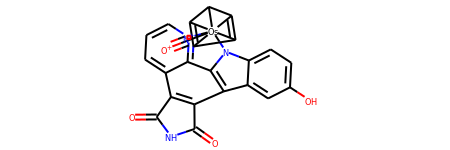

In [56]:
Chem.MolFromSmiles('c1cc2c3c(c4c5cc(ccc5n6c4c2[n+](c1)[Os]67891(C2C7=C8C9=C12)C#[O+])O)C(=O)NC3=O')




In [34]:
atom_types['Se']

{('05L', 'CCCCCCC[Se][C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)CO)O)O)O'),
 ('0JZ',
  'CC(C)[C@@H]1c2nc(c[se]2)C(=O)N[C@@H](c3nc(c[se]3)C(=O)N[C@@H](c4nc(c[se]4)C(=O)N1)C(C)C)C(C)C'),
 ('0U1', 'C[Se][C@H]1[C@H]([C@@H](O[C@@H]1N2C=CC(=O)NC2=O)COP(=O)(O)O)O'),
 ('182', 'c1ccc(cc1)[Se]C2=CN(C(=O)NC2=O)COCCO'),
 ('1TW', 'C[Se][C@H]1[C@@H]([C@H](O[C@H]1n2cnc3c2N=C(NC3=O)N)COP(=O)(O)O)O'),
 ('23S', 'c1c[se]c2c1c(c[nH]2)C[C@@H](C(=O)O)N'),
 ('2J8',
  'CC(C)[C@H]1c2nc(c[se]2)C(=O)N[C@H](c3nc(c[se]3)C(=O)N[C@H](c4nc(c[se]4)C(=O)N1)C(C)C)C(C)C'),
 ('2QW', 'Cc1ccc(cc1)NC(=O)[C@H](C2CCCCC2)NC(=O)[C@H](CC[Se]C)N'),
 ('2ST', 'CC1=CN(C(=O)NC1=O)[C@H]2[C@@H]([C@@H]([C@H](O2)COP(=O)(O)O)O)[Se]C'),
 ('30F', 'C(=C(/C(=O)O)\\N)\\[SeH]'),
 ('30V', 'c1ccc(c(c1)C(=O)N)[Se]SC[C@@H](C(=O)O)N'),
 ('32S', 'c1c[se]c2c1[nH]cc2C[C@@H](C(=O)O)N'),
 ('4WM', 'CC(C)(C)O[C@@H](N[C@H](CCC(O)O)C[Se][C@H]1CCCC=C1)O'),
 ('5SE', 'C[Se]C1=CN(C(=O)N=C1N)[C@H]2C[C@@H]([C@H](O2)COP(=O)(O)O)O'),
 ('6JA', 'CCC1(C(=O)NC(=O)NC1=O)CC[Se]C#N

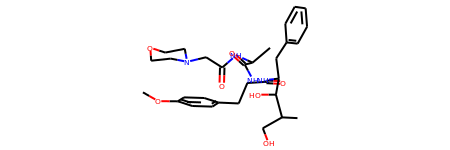

In [73]:
mol = LigandExpo.get_all_sdf_mol_flex('4qzw_04C_1_H_301__EA___', sanitize=True)
mol

In [8]:
#mol = AllChem.AddHs(mol, addCoords=True)
#mol = AllChem.RemoveHs(mol, updateExplicitCount=False)
for atom in mol.GetAtoms():
    print(atom, atom.GetNumExplicitHs(), atom.GetNumImplicitHs(), atom.GetTotalNumHs())

<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 0 0
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50> 0 0 0
<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 2 2
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50> 0 0 0
<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 0 0
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50> 0 2 2
<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 2 2
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50> 0 2 2
<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 2 2
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50> 0 1 1
<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 1 1
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50> 0 0 0
<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 0 0
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50> 0 3 3
<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 1 1
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50> 0 1 1
<rdkit.Chem.rdchem.Atom object at 0x7ffb58819d00> 0 2 2
<rdkit.Chem.rdchem.Atom object at 0x7ffb58817d50

In [37]:
AllChem.AssignAtomChiralTagsFromStructure(mol)

In [ ]:
np.ze

In [46]:
AllChem.AssignStereochemistryFrom3D(mol)

In [47]:
print(Chem.FindMolChiralCenters(mol, force=True, includeUnassigned=True))

[(10, 'S'), (15, 'S'), (28, 'S'), (29, 'S'), (31, 'R')]


In [48]:
for atom in mol.GetAtoms():
    print(atom, atom.GetChiralTag())

<rdkit.Chem.rdchem.Atom object at 0x7f30a90e9ee0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab8dedf0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30a90e9ee0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab8dedf0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30a90e9ee0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab8dedf0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30a90e9ee0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab8dedf0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30a90e9ee0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab8dedf0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30a90e9ee0> CHI_TETRAHEDRAL_CCW
<rdkit.Chem.rdchem.Atom object at 0x7f30ab8dedf0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30a90e9ee0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab8dedf0> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30a90e9ee0> CHI_UNSPECIFIED
<rdkit

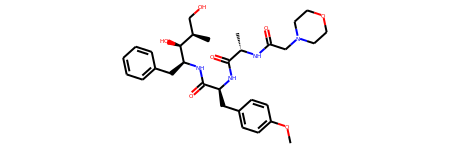

In [41]:
Chem.MolFromSmiles(Chem.MolToSmiles(mol))

In [21]:
mol = LigandExpo.get_all_sdf_mol_flex('3ua5_HEM_1_A_500__C___', sanitize=False, removeHs=True)
mol.UpdatePropertyCache(strict=False)
Chem.SanitizeMol(mol, Chem.SanitizeFlags.SANITIZE_FINDRADICALS|Chem.SanitizeFlags.SANITIZE_KEKULIZE|Chem.SanitizeFlags.SANITIZE_SETAROMATICITY|Chem.SanitizeFlags.SANITIZE_SETCONJUGATION|Chem.SanitizeFlags.SANITIZE_SETHYBRIDIZATION|Chem.SanitizeFlags.SANITIZE_SYMMRINGS, catchErrors=True)


rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [16]:
for atom in mol.GetAtoms():
    print(atom, atom.GetImplicitValence(), atom.GetExplicitValence(), atom.GetTotalValence())

<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 1 3 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0> 1 3 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 1 3 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0> 1 3 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 0 4 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0> 0 4 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 0 4 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0> 0 4 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 3 1 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0> 2 2 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 2 2 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0> 0 4 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 0 2 2
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0> 1 1 2
<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 0 4 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0> 0 4 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abc14df0> 0 4 4
<rdkit.Chem.rdchem.Atom object at 0x7f30abe5bee0

In [17]:
for atom in mol.GetAtoms():
    print(atom, atom.GetChiralTag())

<rdkit.Chem.rdchem.Atom object at 0x7f30abda5030> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab432350> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30abda5030> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab432350> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30abda5030> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab432350> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30abda5030> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab432350> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30abda5030> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab432350> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30abda5030> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab432350> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30abda5030> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30ab432350> CHI_UNSPECIFIED
<rdkit.Chem.rdchem.Atom object at 0x7f30abda5030> CHI_UNSPECIFIED
<rdkit.Che

In [19]:
print(Chem.FindMolChiralCenters(mol,force=True, includeUnassigned=True))

[(42, '?')]


In [75]:
Chem.rdchem.BondType.names

{'UNSPECIFIED': rdkit.Chem.rdchem.BondType.UNSPECIFIED,
 'SINGLE': rdkit.Chem.rdchem.BondType.SINGLE,
 'DOUBLE': rdkit.Chem.rdchem.BondType.DOUBLE,
 'TRIPLE': rdkit.Chem.rdchem.BondType.TRIPLE,
 'QUADRUPLE': rdkit.Chem.rdchem.BondType.QUADRUPLE,
 'QUINTUPLE': rdkit.Chem.rdchem.BondType.QUINTUPLE,
 'HEXTUPLE': rdkit.Chem.rdchem.BondType.HEXTUPLE,
 'ONEANDAHALF': rdkit.Chem.rdchem.BondType.ONEANDAHALF,
 'TWOANDAHALF': rdkit.Chem.rdchem.BondType.TWOANDAHALF,
 'THREEANDAHALF': rdkit.Chem.rdchem.BondType.THREEANDAHALF,
 'FOURANDAHALF': rdkit.Chem.rdchem.BondType.FOURANDAHALF,
 'FIVEANDAHALF': rdkit.Chem.rdchem.BondType.FIVEANDAHALF,
 'AROMATIC': rdkit.Chem.rdchem.BondType.AROMATIC,
 'IONIC': rdkit.Chem.rdchem.BondType.IONIC,
 'HYDROGEN': rdkit.Chem.rdchem.BondType.HYDROGEN,
 'THREECENTER': rdkit.Chem.rdchem.BondType.THREECENTER,
 'DATIVEONE': rdkit.Chem.rdchem.BondType.DATIVEONE,
 'DATIVE': rdkit.Chem.rdchem.BondType.DATIVE,
 'DATIVEL': rdkit.Chem.rdchem.BondType.DATIVEL,
 'DATIVER': rdkit.

In [9]:
ELEMENTS = {x[1]: x[0] for x in enumerate(['I', 'S', 'F', 'N', 'C', 'CL', 'BR', 'O', 'P'])}

HYBRIDIZATIONS = {
    'S': 0,
    'SP': 1,
    'SP2': 2,
    'SP3': 3,
    'SP3D': 4,
    'SP3D2': 5
}

VALENCE = {x: x - 1 for x in range(1, 7)}

MAX_HS = 5

MAX_DEGREE = 5

CHIRALITY = {
    'CHI_TETRAHEDRAL_CW': 0,
    'CHI_TETRAHEDRAL_CCW': 1
}


def atom_to_vector(atom):
    vec = [0] * len(ELEMENTS)
    vec[ELEMENTS[atom.GetSymbol().upper()]] = 1

    # chirality
    new_vec = [0] * (len(CHIRALITY) + 1)
    new_vec[CHIRALITY.get(str(atom.GetChiralTag()), len(CHIRALITY))] = 1
    vec += new_vec

    # formal charge
    fcharge = atom.GetFormalCharge()
    new_vec = [0] * 3
    if fcharge < 0:
        new_vec[0] = 1
    elif fcharge > 0:
        new_vec[1] = 1
    else:
        new_vec[2] = 1
    vec += new_vec

    # aromaticity
    new_vec = [0, 0]
    new_vec[int(atom.GetIsAromatic())] = 1
    vec += new_vec

    # degree
    new_vec = [0] * (MAX_DEGREE + 1)
    new_vec[int(min(atom.GetTotalDegree(), MAX_DEGREE))] = 1
    vec += new_vec

    # num Hs
    new_vec = [0] * (MAX_HS + 1)
    new_vec[int(min(atom.GetTotalNumHs(), MAX_HS))] = 1
    vec += new_vec

    # valence
    new_vec = [0] * (len(VALENCE) + 1)
    new_vec[VALENCE.get(atom.GetTotalValence(), len(VALENCE))] = 1
    vec += new_vec

    # in ring flag
    new_vec = [0, 0]
    new_vec[int(atom.IsInRing())] = 1
    vec += new_vec

    # is ion
    new_vec = [0, 0]
    new_vec[int(atom.GetTotalDegree() == 0)] = 1
    vec += new_vec

    return np.array(vec, dtype=float)


#def prepare_ligand(mol):
#    AllChem.AssignStereochemistryFrom3D(mol)

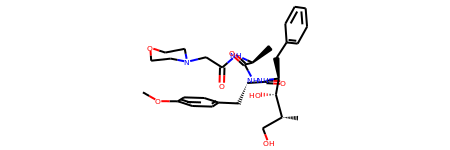

In [76]:
mol = LigandExpo.get_all_sdf_mol_flex('4qzw_04C_1_H_301__EA___', sanitize=True)
AllChem.AssignStereochemistryFrom3D(mol)
mol

In [77]:
for atom in mol.GetAtoms():
    print(atom.GetSymbol(), atom_to_vector(atom))

C [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
O [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
C [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
N [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]
O [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
C [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
C [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
C [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]


In [ ]:
BOND_TYPE = {'AROMATIC': 0, 'SINGLE': 1, 'DOUBLE': 2, 'TRIPLE': 3}

def bond_to_vector(bond):
    # bond type
    vec = [0] * len(BOND_TYPE)
    vec[BOND_TYPE[str(bond.GetBondType())]] = 1

    # in ring
    new_vec = [0] * 2
    new_vec[bond.IsInRing()] = 1
    vec += new_vec
    
    return np.array(vec, dtype=DTYPE_FLOAT)

In [81]:
bond = list(mol.GetBonds())[0]
str(bond.GetBondType())

'DOUBLE'